<a href="https://colab.research.google.com/github/tkdforever18/Carlos/blob/main/Proyecto_final_Analitica2_Eq2_Final%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Acerca del Set de Datos

Estos datos son de una empresa llamada Scholastic Travel Company (STC) la cual es una agencia de turismo educacional especializada en viajes estudiantiles y culturales.
Los viajes que realizan son de historia y ciencia para alumnos de secundaria y preparatoria, viajes de intercambio para
alumnos de universidad, viajes destino artísticos,etc.

Pretendemos establecer una estrategia de Marketing basada en un modelo de predicción que nos diga
si los clientes del año pasado volverán a contratar sus servicios.
Esto lo determina la variable "Retained.in.2012." la cual es nuestra variable predictoria.

## Importamos Datos

In [803]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [804]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [805]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/STC(A).csv")

In [806]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [807]:
pd.set_option("display.max_columns", None)
df.head()

ID Program.Code  From.Grade  To.Grade Group.State  Is.Non.Annual.  Days  \
0   1           HS         4.0       4.0          CA               0     1   
1   2           HC         8.0       8.0          AZ               0     7   
2   3           HD         8.0       8.0          FL               0     3   
3   4           HN         9.0      12.0          VA               1     3   
4   5           HD         6.0       8.0          FL               0     6   

  Travel.Type  Departure.Date  Return.Date  Deposit.Date Special.Pay  Tuition  \
0           A           40557        40557         40420         NaN      424   
1           A           40557        40564         40132          CP     2350   
2           A           40558        40560         40466         NaN     1181   
3           B           40558        40560         40550         NaN      376   
4           T           40559        40564         40451         NaN      865   

   FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL  Latest.RPL  \
0          25              3                 0.424    40266.0     40402.0   
1           9              9                 0.409    40106.0     40400.0   
2          17              6                 0.708    40297.0     40406.0   
3           0              0                 0.000        NaN         NaN   
4          40              8                 0.494    40266.0     40402.0   

   Cancelled.Pax  Total.Discount.Pax  Initial.System.Date Poverty.Code  \
0              3                   4              40263.0            B   
1             11                   3              40088.0            C   
2              6                   3              40206.0            C   
3              1                   0              40470.0          NaN   
4              9                   8              40260.0            D   

                Region  CRM.Segment School.Type  Parent.Meeting.Flag  \
0  Southern California          4.0      PUBLIC                    1   
1                Other         10.0      PUBLIC                    1   
2                Other         10.0      PUBLIC                    1   
3                Other          7.0         CHD                    0   
4                Other         10.0      PUBLIC                    1   

  MDR.Low.Grade  MDR.High.Grade  Total.School.Enrollment Income.Level  \
0             K             5.0                    927.0            Q   
1             7             8.0                    850.0            A   
2             6             8.0                    955.0            O   
3           NaN             NaN                      NaN          NaN   
4             6             8.0                    720.0            C   

   EZ.Pay.Take.Up.Rate  School.Sponsor SPR.Product.Type SPR.New.Existing  FPP  \
0                0.170               1       CA History         EXISTING   59   
1                0.091               0       East Coast         EXISTING   22   
2                0.042               0       East Coast         EXISTING   24   
3                0.000               0       East Coast         EXISTING   18   
4                0.383               0       East Coast         EXISTING   81   

   Total.Pax  SPR.Group.Revenue  NumberOfMeetingswithParents  FirstMeeting  \
0         63                424                            1       40402.0   
1         25               2350                            2       40134.0   
2         27               1181                            1       40434.0   
3         18                376                            0           NaN   
4         89                865                            1       40414.0   

   LastMeeting  DifferenceTraveltoFirstMeeting  DifferenceTraveltoLastMeeting  \
0      40402.0                           155.0                          155.0   
1      40417.0                           423.0                          140.0   
2      40434.0                           124.0                      

## Indexamos en base a ID al igual que el modelo de retención del ejemplo

In [808]:
#df.set_index('ID',inplace=True)

In [809]:
pd.set_option("display.max_columns", None)
df.head()

ID Program.Code  From.Grade  To.Grade Group.State  Is.Non.Annual.  Days  \
0   1           HS         4.0       4.0          CA               0     1   
1   2           HC         8.0       8.0          AZ               0     7   
2   3           HD         8.0       8.0          FL               0     3   
3   4           HN         9.0      12.0          VA               1     3   
4   5           HD         6.0       8.0          FL               0     6   

  Travel.Type  Departure.Date  Return.Date  Deposit.Date Special.Pay  Tuition  \
0           A           40557        40557         40420         NaN      424   
1           A           40557        40564         40132          CP     2350   
2           A           40558        40560         40466         NaN     1181   
3           B           40558        40560         40550         NaN      376   
4           T           40559        40564         40451         NaN      865   

   FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL  Latest.RPL  \
0          25              3                 0.424    40266.0     40402.0   
1           9              9                 0.409    40106.0     40400.0   
2          17              6                 0.708    40297.0     40406.0   
3           0              0                 0.000        NaN         NaN   
4          40              8                 0.494    40266.0     40402.0   

   Cancelled.Pax  Total.Discount.Pax  Initial.System.Date Poverty.Code  \
0              3                   4              40263.0            B   
1             11                   3              40088.0            C   
2              6                   3              40206.0            C   
3              1                   0              40470.0          NaN   
4              9                   8              40260.0            D   

                Region  CRM.Segment School.Type  Parent.Meeting.Flag  \
0  Southern California          4.0      PUBLIC                    1   
1                Other         10.0      PUBLIC                    1   
2                Other         10.0      PUBLIC                    1   
3                Other          7.0         CHD                    0   
4                Other         10.0      PUBLIC                    1   

  MDR.Low.Grade  MDR.High.Grade  Total.School.Enrollment Income.Level  \
0             K             5.0                    927.0            Q   
1             7             8.0                    850.0            A   
2             6             8.0                    955.0            O   
3           NaN             NaN                      NaN          NaN   
4             6             8.0                    720.0            C   

   EZ.Pay.Take.Up.Rate  School.Sponsor SPR.Product.Type SPR.New.Existing  FPP  \
0                0.170               1       CA History         EXISTING   59   
1                0.091               0       East Coast         EXISTING   22   
2                0.042               0       East Coast         EXISTING   24   
3                0.000               0       East Coast         EXISTING   18   
4                0.383               0       East Coast         EXISTING   81   

   Total.Pax  SPR.Group.Revenue  NumberOfMeetingswithParents  FirstMeeting  \
0         63                424                            1       40402.0   
1         25               2350                            2       40134.0   
2         27               1181                            1       40434.0   
3         18                376                            0           NaN   
4         89                865                            1       40414.0   

   LastMeeting  DifferenceTraveltoFirstMeeting  DifferenceTraveltoLastMeeting  \
0      40402.0                           155.0                          155.0   
1      40417.0                           423.0                          140.0   
2      40434.0                           124.0                      

In [810]:
df.info

<bound method DataFrame.info of         ID Program.Code  From.Grade  To.Grade Group.State  Is.Non.Annual.  \
0        1           HS         4.0       4.0          CA               0   
1        2           HC         8.0       8.0          AZ               0   
2        3           HD         8.0       8.0          FL               0   
3        4           HN         9.0      12.0          VA               1   
4        5           HD         6.0       8.0          FL               0   
...    ...          ...         ...       ...         ...             ...   
2384  2385           HC         7.0       8.0          CA               0   
2385  2386           HD         8.0       8.0          CA               0   
2386  2387           HD        10.0      12.0          CA               0   
2387  2388           HS         4.0       4.0          CA               0   
2388  2389           HD         8.0       8.0          WA               0   

      Days Travel.Type  Departure.Date  Ret

# Limpieza de datos

## Intentamos Borrar Renglones sin datos

In [811]:
#Notamos que no hay renglones que no tengan ningún dato por lo que la Data Frame se mantiene igual
df.dropna(how='all').count()['Retained.in.2012.']

2389

## Buscamos datos faltantes

In [812]:
df.isnull().sum().sort_values(ascending=False)

Special.Pay                       1919
Early.RPL                          673
Poverty.Code                       599
FirstMeeting                       337
LastMeeting                        337
DifferenceTraveltoFirstMeeting     337
DifferenceTraveltoLastMeeting      337
To.Grade                           150
From.Grade                         127
Total.School.Enrollment             91
SchoolSizeIndicator                 91
FPP.to.School.enrollment            91
MDR.High.Grade                      68
MDR.Low.Grade                       68
Income.Level                        62
Latest.RPL                          19
Initial.System.Date                  8
CRM.Segment                          4
GroupGradeType                       0
SPR.Group.Revenue                    0
NumberOfMeetingswithParents          0
Num.of.Non_FPP.PAX                   0
FPP.to.PAX                           0
SingleGradeTripFlag                  0
MajorProgramCode                     0
SchoolGradeTypeLow       

La variable que más datos perdidos presenta es Special.Pay, la cual indica si hubo un método especial de pago (El maestro recibiendo los pagos directamente, por ejemplo). En caso de que no hubiera un tipo de pago especial, se omite el dato. Esto quiere decir, que los 1919 datos faltantes representan la cantidad de veces que se pagó con el método estándar, el cual es, que la agencia reciba el pago directamente.

Con esto en mente, podemos sustituir esos valores faltantes por el valor "STC" para señalar las ocasiones en las que STC recibió el pago de manera directa.

In [813]:
df["Special.Pay"].unique() #Identificamos valores de Special.Pay

array([nan, 'CP', 'FR', 'SA'], dtype=object)

In [814]:
df["Special.Pay"].fillna("STC", inplace=True) #Sustituimos los valores faltantes por STC

In [815]:
df["Special.Pay"].unique()

array(['STC', 'CP', 'FR', 'SA'], dtype=object)

In [816]:
df.isnull().sum().sort_values(ascending=False)

Early.RPL                         673
Poverty.Code                      599
DifferenceTraveltoLastMeeting     337
FirstMeeting                      337
LastMeeting                       337
DifferenceTraveltoFirstMeeting    337
To.Grade                          150
From.Grade                        127
Total.School.Enrollment            91
FPP.to.School.enrollment           91
SchoolSizeIndicator                91
MDR.High.Grade                     68
MDR.Low.Grade                      68
Income.Level                       62
Latest.RPL                         19
Initial.System.Date                 8
CRM.Segment                         4
FPP.to.PAX                          0
Total.Pax                           0
SPR.Group.Revenue                   0
NumberOfMeetingswithParents         0
Num.of.Non_FPP.PAX                  0
MajorProgramCode                    0
GroupGradeType                      0
SingleGradeTripFlag                 0
SchoolGradeTypeLow                  0
SPR.New.Exis

La siguiente variable con mayor cantidad de valores faltantes es Early.RPL, la cual nos indica la fecha en la cual se envió la primer comunicación sobre el viaje (normalmente entre 12 y 18 meses antes del viaje). Inversamente, la variable Latest.RPL nos indica la fecha en la que se envió la última comunicación (normalmente 6 a 9 meses antes del viaje). Lo interesante es que Early.RPL tiene 673 datos faltantes cuando la variable Latest.RPL tiene solo 19.

Entonces teorizamos que la columna de Early.RPL no fue usada en los casos en los que solo hubo un envío de comunicación avisando al grupo del próximo viaje.

Algo que pudiera apoyar esta hipótesis es validar si hay casos en los que se haya registro en la variable Early.RPL y no lo haya en Latest.RPL

In [817]:
#Validamos si hay registros con datos en Early.RPL y Nulls en Latest.RPL
condicion = df['Early.RPL'].notnull() & df['Latest.RPL'].isnull()
registros_faltantes = df[condicion]

# Imprimir los registros que cumplen con la condición
print(registros_faltantes)

Empty DataFrame
Columns: [ID, Program.Code, From.Grade, To.Grade, Group.State, Is.Non.Annual., Days, Travel.Type, Departure.Date, Return.Date, Deposit.Date, Special.Pay, Tuition, FRP.Active, FRP.Cancelled, FRP.Take.up.percent., Early.RPL, Latest.RPL, Cancelled.Pax, Total.Discount.Pax, Initial.System.Date, Poverty.Code, Region, CRM.Segment, School.Type, Parent.Meeting.Flag, MDR.Low.Grade, MDR.High.Grade, Total.School.Enrollment, Income.Level, EZ.Pay.Take.Up.Rate, School.Sponsor, SPR.Product.Type, SPR.New.Existing, FPP, Total.Pax, SPR.Group.Revenue, NumberOfMeetingswithParents, FirstMeeting, LastMeeting, DifferenceTraveltoFirstMeeting, DifferenceTraveltoLastMeeting, SchoolGradeTypeLow, SchoolGradeTypeHigh, SchoolGradeType, DepartureMonth, GroupGradeTypeLow, GroupGradeTypeHigh, GroupGradeType, MajorProgramCode, SingleGradeTripFlag, FPP.to.School.enrollment, FPP.to.PAX, Num.of.Non_FPP.PAX, SchoolSizeIndicator, Retained.in.2012.]
Index: []


Dado a que no hay registros que cumplan con la condición (datos en Early.RPL y nulls en Latest.RPL) podemos suponer que nuestra teoría es cierta (En los casos en que solo hubo una comunicación avisando del viaje, solamente se usó la columna de Latest.RPL para registrarla).
Por este motivo podemos eliminar la mayor parte de los nulls en Early.RPL copiando los datos que haya en Latest.RPL (si hay solo un aviso, este aviso funge tanto como el primero y el último).

In [818]:
#sustituimos valores de Latest.RPL en Early.RPL para los casos en que Early.RPL son Nulls
df['Early.RPL'].fillna(df['Latest.RPL'], inplace=True)

In [819]:
df[['Early.RPL','Latest.RPL']]

Early.RPL  Latest.RPL
0       40266.0     40402.0
1       40106.0     40400.0
2       40297.0     40406.0
3           NaN         NaN
4       40266.0     40402.0
...         ...         ...
2384    40486.0     40486.0
2385    40294.0     40428.0
2386    40520.0     40520.0
2387    40428.0     40428.0
2388    40436.0     40436.0

[2389 rows x 2 columns]

In [820]:
df.isnull().sum().sort_values(ascending=False)

Poverty.Code                      599
FirstMeeting                      337
LastMeeting                       337
DifferenceTraveltoFirstMeeting    337
DifferenceTraveltoLastMeeting     337
To.Grade                          150
From.Grade                        127
Total.School.Enrollment            91
SchoolSizeIndicator                91
FPP.to.School.enrollment           91
MDR.High.Grade                     68
MDR.Low.Grade                      68
Income.Level                       62
Latest.RPL                         19
Early.RPL                          19
Initial.System.Date                 8
CRM.Segment                         4
SchoolGradeTypeHigh                 0
MajorProgramCode                    0
Total.Pax                           0
SPR.Group.Revenue                   0
Num.of.Non_FPP.PAX                  0
NumberOfMeetingswithParents         0
FPP.to.PAX                          0
SingleGradeTripFlag                 0
GroupGradeType                      0
SPR.New.Exis

La siguiente variable con mayor cantidad de nulls es Poverty.Code, la cual indica en qué porcentaje por debajo de la línea de pobreza se encuentra la zona en la cual está la escuela de origen (y se supone que, por ende, los padres que estarán pagando por el viaje).

Analizamos los posibles valores que contiene esta variable

In [821]:
df["Poverty.Code"].unique()

array(['B', 'C', nan, 'D', 'A', 'E', '0'], dtype=object)

In [822]:
df[["Poverty.Code"]]

Poverty.Code
0               B
1               C
2               C
3             NaN
4               D
...           ...
2384            C
2385            C
2386          NaN
2387          NaN
2388            B

[2389 rows x 1 columns]

Detectamos el valor "0" el cual no está dentro de los valores posibles (A a la E) por lo que procederemos a borrarlo

In [823]:
#Borramos los valores "0" de la columna "Poverty.Code"
df['Poverty.Code'].replace('0', np.nan, inplace=True)
df["Poverty.Code"].unique()

array(['B', 'C', nan, 'D', 'A', 'E'], dtype=object)

Transformamos datos no nulls para después poder imputar los nulls con KNN

In [824]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
mask = df['Poverty.Code'].notnull()
df.loc[mask, 'Poverty.Code'] = label_encoder.fit_transform(df.loc[mask, 'Poverty.Code'])

In [825]:
#Validamos las nuevas etiquetas
df["Poverty.Code"].unique()

array([1, 2, nan, 3, 0, 4], dtype=object)

In [826]:
from sklearn.impute import KNNImputer

# Construimos el modelo
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Ajustamos el modelo e imputamos los missing values
imputer.fit(df[["Poverty.Code"]])
df["Poverty.Code"] = imputer.transform(df[["Poverty.Code"]]).ravel()

print("Valores perdidos en Poverty.Code: " +
      str(df['Poverty.Code'].isnull().sum()))

Valores perdidos en Poverty.Code: 0


In [827]:
df[["Poverty.Code"]]

Poverty.Code
0         1.000000
1         2.000000
2         2.000000
3         1.204367
4         3.000000
...            ...
2384      2.000000
2385      2.000000
2386      1.204367
2387      1.204367
2388      1.000000

[2389 rows x 1 columns]

In [828]:
df["Poverty.Code"].unique()

array([1.       , 2.       , 1.2043673, 3.       , 0.       , 4.       ])

In [829]:
df[["Poverty.Code"]]

Poverty.Code
0         1.000000
1         2.000000
2         2.000000
3         1.204367
4         3.000000
...            ...
2384      2.000000
2385      2.000000
2386      1.204367
2387      1.204367
2388      1.000000

[2389 rows x 1 columns]

In [830]:
df.isnull().sum().sort_values(ascending=False)

FirstMeeting                      337
LastMeeting                       337
DifferenceTraveltoFirstMeeting    337
DifferenceTraveltoLastMeeting     337
To.Grade                          150
From.Grade                        127
Total.School.Enrollment            91
SchoolSizeIndicator                91
FPP.to.School.enrollment           91
MDR.High.Grade                     68
MDR.Low.Grade                      68
Income.Level                       62
Latest.RPL                         19
Early.RPL                          19
Initial.System.Date                 8
CRM.Segment                         4
MajorProgramCode                    0
Total.Pax                           0
Num.of.Non_FPP.PAX                  0
SPR.Group.Revenue                   0
FPP.to.PAX                          0
SingleGradeTripFlag                 0
NumberOfMeetingswithParents         0
SchoolGradeType                     0
SchoolGradeTypeHigh                 0
GroupGradeType                      0
GroupGradeTy

In [831]:
df[["FirstMeeting","LastMeeting","DifferenceTraveltoFirstMeeting","DifferenceTraveltoLastMeeting","NumberOfMeetingswithParents"]]

FirstMeeting  LastMeeting  DifferenceTraveltoFirstMeeting  \
0          40402.0      40402.0                           155.0   
1          40134.0      40417.0                           423.0   
2          40434.0      40434.0                           124.0   
3              NaN          NaN                             NaN   
4          40414.0      40414.0                           145.0   
...            ...          ...                             ...   
2384           NaN          NaN                             NaN   
2385       40304.0      40458.0                           419.0   
2386           NaN          NaN                             NaN   
2387       40437.0      40437.0                           287.0   
2388       40451.0      40451.0                           273.0   

      DifferenceTraveltoLastMeeting  NumberOfMeetingswithParents  
0                             155.0                            1  
1                             140.0                            2  
2                             124.0                            1  
3                               NaN                            0  
4                             145.0                            1  
...                             ...                          ...  
2384                            NaN                            0  
2385                          265.0                            2  
2386                            NaN                            0  
2387                          287.0                            1  
2388                          273.0                            1  

[2389 rows x 5 columns]

Las siguientes variables tienen la misma cantidad de valores faltantes debido a que son secuenciales,
es decir, si no ocurre la primer variable, el resto tampoco pueden ocurrir. En este caso se trata de fechas de juntas de seguimiento con los padres de los alumnos y cuántos días antes de la fecha del viaje ocurrieron estas juntas.
FirstMeeting, LastMeeting, DifferenceTraveltoFirstMeeting, DifferenceTraveltoLastMeeting

Esto es comprobable con la variable "NumberOfMeetingswithParents" la cual debe ser igual a 0 en estos casos.

Estos datos faltantes los imputaremos usando KNN

In [832]:
imputer.fit(df[["FirstMeeting"]])
df["FirstMeeting"] = imputer.transform(df[["FirstMeeting"]]).ravel()
imputer.fit(df[["LastMeeting"]])
df["LastMeeting"] = imputer.transform(df[["LastMeeting"]]).ravel()
imputer.fit(df[["DifferenceTraveltoFirstMeeting"]])
df["DifferenceTraveltoFirstMeeting"] = imputer.transform(df[["DifferenceTraveltoFirstMeeting"]]).ravel()
imputer.fit(df[["DifferenceTraveltoLastMeeting"]])
df["DifferenceTraveltoLastMeeting"] = imputer.transform(df[["DifferenceTraveltoLastMeeting"]]).ravel()


In [833]:
df[["FirstMeeting","LastMeeting","DifferenceTraveltoFirstMeeting","DifferenceTraveltoLastMeeting","NumberOfMeetingswithParents"]]

FirstMeeting   LastMeeting  DifferenceTraveltoFirstMeeting  \
0     40402.000000  40402.000000                      155.000000   
1     40134.000000  40417.000000                      423.000000   
2     40434.000000  40434.000000                      124.000000   
3     40408.495614  40441.601365                      262.083821   
4     40414.000000  40414.000000                      145.000000   
...            ...           ...                             ...   
2384  40408.495614  40441.601365                      262.083821   
2385  40304.000000  40458.000000                      419.000000   
2386  40408.495614  40441.601365                      262.083821   
2387  40437.000000  40437.000000                      287.000000   
2388  40451.000000  40451.000000                      273.000000   

      DifferenceTraveltoLastMeeting  NumberOfMeetingswithParents  
0                         155.00000                            1  
1                         140.00000                            2  
2                         124.00000                            1  
3                         228.97807                            0  
4                         145.00000                            1  
...                             ...                          ...  
2384                      228.97807                            0  
2385                      265.00000                            2  
2386                      228.97807                            0  
2387                      287.00000                            1  
2388                      273.00000                            1  

[2389 rows x 5 columns]

Convertimos las columnas a int para eliminar decimales pues posteriormente convertiremos aquellas columnas correspondientes a formato fecha

In [834]:
df[["FirstMeeting","LastMeeting","DifferenceTraveltoFirstMeeting","DifferenceTraveltoLastMeeting","NumberOfMeetingswithParents"]].astype(int)

FirstMeeting  LastMeeting  DifferenceTraveltoFirstMeeting  \
0            40402        40402                             155   
1            40134        40417                             423   
2            40434        40434                             124   
3            40408        40441                             262   
4            40414        40414                             145   
...            ...          ...                             ...   
2384         40408        40441                             262   
2385         40304        40458                             419   
2386         40408        40441                             262   
2387         40437        40437                             287   
2388         40451        40451                             273   

      DifferenceTraveltoLastMeeting  NumberOfMeetingswithParents  
0                               155                            1  
1                               140                            2  
2                               124                            1  
3                               228                            0  
4                               145                            1  
...                             ...                          ...  
2384                            228                            0  
2385                            265                            2  
2386                            228                            0  
2387                            287                            1  
2388                            273                            1  

[2389 rows x 5 columns]

In [835]:
df.isnull().sum().sort_values(ascending=False)

To.Grade                          150
From.Grade                        127
Total.School.Enrollment            91
SchoolSizeIndicator                91
FPP.to.School.enrollment           91
MDR.High.Grade                     68
MDR.Low.Grade                      68
Income.Level                       62
Latest.RPL                         19
Early.RPL                          19
Initial.System.Date                 8
CRM.Segment                         4
GroupGradeType                      0
LastMeeting                         0
Total.Pax                           0
Num.of.Non_FPP.PAX                  0
SPR.Group.Revenue                   0
FPP.to.PAX                          0
SingleGradeTripFlag                 0
NumberOfMeetingswithParents         0
FirstMeeting                        0
DifferenceTraveltoFirstMeeting      0
GroupGradeTypeHigh                  0
DifferenceTraveltoLastMeeting       0
SchoolGradeTypeLow                  0
MajorProgramCode                    0
SPR.New.Exis

Las variables To.Grade y From.Grade indican el mayor y menor grado escolar de los participantes de un programa (Tipo de viaje, ej, viaje de historia a Nueva York) específico (indicado por la variable Program.Code)

Estos datos faltantes también los imputaremos usando KNN

In [836]:
imputer.fit(df[["To.Grade"]])
df["To.Grade"] = imputer.transform(df[["To.Grade"]]).ravel()
imputer.fit(df[["From.Grade"]])
df["From.Grade"] = imputer.transform(df[["From.Grade"]]).ravel()

In [837]:
df[["From.Grade","To.Grade"]]

From.Grade  To.Grade
0            4.0       4.0
1            8.0       8.0
2            8.0       8.0
3            9.0      12.0
4            6.0       8.0
...          ...       ...
2384         7.0       8.0
2385         8.0       8.0
2386        10.0      12.0
2387         4.0       4.0
2388         8.0       8.0

[2389 rows x 2 columns]

In [838]:
df["From.Grade"].unique()

array([ 4.       ,  8.       ,  9.       ,  6.       , 10.       ,
       11.       ,  5.       ,  7.       ,  7.2683466, 12.       ,
        3.       ])

In [839]:
df["To.Grade"].unique()

array([ 4.        ,  8.        , 12.        ,  9.        ,  5.        ,
        7.        ,  7.91290755,  6.        , 10.        , 11.        ,
        3.        ])

In [840]:
# Redondear los valores en la columna "From.Grade" & "To.Grade" esto lo podemos realizar después para ver si aumenta nuestro % de accuracy al final
#df["From.Grade"] = df["From.Grade"].round()
#df["To.Grade"] = df["To.Grade"].round()

In [841]:
df["From.Grade"].unique()

array([ 4.       ,  8.       ,  9.       ,  6.       , 10.       ,
       11.       ,  5.       ,  7.       ,  7.2683466, 12.       ,
        3.       ])

In [842]:
df["To.Grade"].unique()

array([ 4.        ,  8.        , 12.        ,  9.        ,  5.        ,
        7.        ,  7.91290755,  6.        , 10.        , 11.        ,
        3.        ])

In [843]:
df.isnull().sum().sort_values(ascending=False)

Total.School.Enrollment           91
SchoolSizeIndicator               91
FPP.to.School.enrollment          91
MDR.Low.Grade                     68
MDR.High.Grade                    68
Income.Level                      62
Latest.RPL                        19
Early.RPL                         19
Initial.System.Date                8
CRM.Segment                        4
FPP                                0
SPR.Group.Revenue                  0
NumberOfMeetingswithParents        0
FirstMeeting                       0
LastMeeting                        0
DifferenceTraveltoFirstMeeting     0
Total.Pax                          0
DifferenceTraveltoLastMeeting      0
SPR.Product.Type                   0
SchoolGradeTypeLow                 0
SchoolGradeTypeHigh                0
SchoolGradeType                    0
DepartureMonth                     0
GroupGradeTypeLow                  0
GroupGradeTypeHigh                 0
GroupGradeType                     0
MajorProgramCode                   0
S

Total.School.Enrollment Indica la cantidad de alumnos inscritos en la escuela
SchoolSizeIndicator es una categoría de tamaño de la escuela (Pequeña, Mediana, Grande, Etc)
FPP.to.School.enrollment Indica la proporción de alumnos que pagan algún viaje de entre todos los alumnos inscritos en la escuela

Estos datos los imputaremos usando KNN

In [844]:
#Validamos tipos de datos
df["Total.School.Enrollment"].unique()

array([ 927.,  850.,  955.,   nan,  720.,  939.,  225.,  500.,  635.,
        746.,  650.,  670.,  750.,  753.,  626.,  467.,  360.,  345.,
        664., 1693.,  760.,  641.,  700., 1300.,  685.,  702.,  698.,
        604.,  597.,  320.,  794.,  966.,  321., 2393.,  783.,  430.,
        562.,  522.,  364.,  351., 1306., 1008.,  652.,  240.,  880.,
        565., 1325.,  412.,  824.,  230., 1023., 1688.,  200., 1555.,
        400.,  280., 1232.,  478.,  669.,  495.,  586.,  900.,  835.,
        996.,  497.,  310.,  550.,  610.,  864.,  365.,  511.,  372.,
        375.,  682., 2159., 1100.,  428.,  552.,  688.,  330.,  315.,
        468.,  957., 1102.,  780.,  570.,  350., 1140., 1165.,  452.,
       1590.,  184.,  165., 1450.,  995.,  923., 1249.,  547., 1266.,
        675.,  919.,  875.,  638., 1318.,  743.,  220.,  429.,  509.,
        717., 1514.,  239.,  947., 1077.,  625.,  449.,  740., 1305.,
       1032.,  767., 1360.,  487.,  475.,  772.,  789., 1792.,  895.,
        172.,  642.,

In [845]:
df["SchoolSizeIndicator"].unique()

array(['L', nan, 'M-L', 'S', 'S-M'], dtype=object)

In [846]:
df["FPP.to.School.enrollment"].unique()

array([0.06364617, 0.02588235, 0.02513089, ..., 0.00736842, 0.01898048,
       0.03478261])

In [847]:
#Aplicamos etiquetas a la única variable categorica SchoolSizeIndicator en valores no null
mask = df['SchoolSizeIndicator'].notnull()
df.loc[mask, 'SchoolSizeIndicator'] = label_encoder.fit_transform(df.loc[mask, 'SchoolSizeIndicator'])
df["SchoolSizeIndicator"].unique()

array([0, nan, 1, 2, 3], dtype=object)

Imputamos valores null con KNN

In [848]:
imputer.fit(df[["Total.School.Enrollment"]])
df["Total.School.Enrollment"] = imputer.transform(df[["Total.School.Enrollment"]]).ravel()
imputer.fit(df[["SchoolSizeIndicator"]])
df["SchoolSizeIndicator"] = imputer.transform(df[["SchoolSizeIndicator"]]).ravel()
imputer.fit(df[["FPP.to.School.enrollment"]])
df["FPP.to.School.enrollment"] = imputer.transform(df[["FPP.to.School.enrollment"]]).ravel()

In [849]:
df["Total.School.Enrollment"].unique()

array([ 927.        ,  850.        ,  955.        ,  648.35857267,
        720.        ,  939.        ,  225.        ,  500.        ,
        635.        ,  746.        ,  650.        ,  670.        ,
        750.        ,  753.        ,  626.        ,  467.        ,
        360.        ,  345.        ,  664.        , 1693.        ,
        760.        ,  641.        ,  700.        , 1300.        ,
        685.        ,  702.        ,  698.        ,  604.        ,
        597.        ,  320.        ,  794.        ,  966.        ,
        321.        , 2393.        ,  783.        ,  430.        ,
        562.        ,  522.        ,  364.        ,  351.        ,
       1306.        , 1008.        ,  652.        ,  240.        ,
        880.        ,  565.        , 1325.        ,  412.        ,
        824.        ,  230.        , 1023.        , 1688.        ,
        200.        , 1555.        ,  400.        ,  280.        ,
       1232.        ,  478.        ,  669.        ,  495.     

In [850]:
df["SchoolSizeIndicator"].unique()

array([0.        , 1.48302872, 1.        , 2.        , 3.        ])

In [851]:
df["FPP.to.School.enrollment"].unique()

array([0.06364617, 0.02588235, 0.02513089, ..., 0.00736842, 0.01898048,
       0.03478261])

In [852]:
df.isnull().sum().sort_values(ascending=False)

MDR.High.Grade                    68
MDR.Low.Grade                     68
Income.Level                      62
Early.RPL                         19
Latest.RPL                        19
Initial.System.Date                8
CRM.Segment                        4
ID                                 0
FPP                                0
Total.Pax                          0
SPR.Group.Revenue                  0
NumberOfMeetingswithParents        0
FirstMeeting                       0
LastMeeting                        0
DifferenceTraveltoFirstMeeting     0
DifferenceTraveltoLastMeeting      0
SPR.Product.Type                   0
SchoolGradeTypeLow                 0
SchoolGradeTypeHigh                0
SchoolGradeType                    0
DepartureMonth                     0
GroupGradeTypeLow                  0
GroupGradeTypeHigh                 0
GroupGradeType                     0
MajorProgramCode                   0
SingleGradeTripFlag                0
FPP.to.School.enrollment           0
F

Validamos cuántos registros perderíamos si borramos todos los Nulls

In [853]:
print('2389 registros originales vs ',df.dropna().count()['Retained.in.2012.'], 'registros si quitamos todos los Null' )

2389 registros originales vs  2301 registros si quitamos todos los Null


Despues de esta limpieza nos quedarían aún el 96.63% de los registros originales por lo que podemos trabajar con esta cantidad de datos para desarrollar el modelo de predicción

In [854]:
#Eliminamos filas que contienen valores nulos a lo largo de todas las variables
df.dropna(inplace=True)

In [855]:
df.isnull().sum().sort_values(ascending=False)

ID                                0
Program.Code                      0
EZ.Pay.Take.Up.Rate               0
School.Sponsor                    0
SPR.Product.Type                  0
SPR.New.Existing                  0
FPP                               0
Total.Pax                         0
SPR.Group.Revenue                 0
NumberOfMeetingswithParents       0
FirstMeeting                      0
LastMeeting                       0
DifferenceTraveltoFirstMeeting    0
DifferenceTraveltoLastMeeting     0
SchoolGradeTypeLow                0
SchoolGradeTypeHigh               0
SchoolGradeType                   0
DepartureMonth                    0
GroupGradeTypeLow                 0
GroupGradeTypeHigh                0
GroupGradeType                    0
MajorProgramCode                  0
SingleGradeTripFlag               0
FPP.to.School.enrollment          0
FPP.to.PAX                        0
Num.of.Non_FPP.PAX                0
SchoolSizeIndicator               0
Income.Level                

## Análisis Exploratorio de los Datos

In [856]:
df.head(10)

ID Program.Code  From.Grade  To.Grade Group.State  Is.Non.Annual.  Days  \
0    1           HS         4.0       4.0          CA               0     1   
1    2           HC         8.0       8.0          AZ               0     7   
2    3           HD         8.0       8.0          FL               0     3   
4    5           HD         6.0       8.0          FL               0     6   
5    6           HC        10.0      12.0          LA               0     4   
6    7           SG        11.0      12.0          MA               1     6   
8    9           CC         8.0       8.0          AZ               0     8   
9   10           HD         8.0       8.0          TX               0     4   
10  11           CD         8.0       8.0          FL               0     4   
11  12           HD         8.0       8.0          FL               0     4   

   Travel.Type  Departure.Date  Return.Date  Deposit.Date Special.Pay  \
0            A           40557        40557         40420         STC   
1            A           40557        40564         40132          CP   
2            A           40558        40560         40466         STC   
4            T           40559        40564         40451         STC   
5            A           40560        40563         40451         STC   
6            A           40561        40566         40466         STC   
8            A           40572        40579         40330          CP   
9            A           40581        40584         40476         STC   
10           A           40581        40584         40451         STC   
11           A           40581        40584         40466         STC   

    Tuition  FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL  \
0       424          25              3                 0.424    40266.0   
1      2350           9              9                 0.409    40106.0   
2      1181          17              6                 0.708    40297.0   
4       865          40              8                 0.494    40266.0   
5      2025           9              4                 0.900    40253.0   
6      1977          16              4                 0.640    40234.0   
8      2200          30              0                 0.577    40221.0   
9      1428          51              1                 0.773    40269.0   
10      999          47              1                 0.566    40423.0   
11     1388          32              0                 0.800    40220.0   

    Latest.RPL  Cancelled.Pax  Total.Discount.Pax  Initial.System.Date  \
0      40402.0              3                   4              40263.0   
1      40400.0             11                   3              40088.0   
2      40406.0              6                   3              40206.0   
4      40402.0              9                   8              40260.0   
5      40457.0              3                   1              40253.0   
6      40422.0              5                   2              40234.0   
8      40221.0              0                   4              40220.0   
9      40401.0              1                   6              40268.0   
10     40423.0              1                   4              40268.0   
11     40410.0              0                   5              40220.0   

    Poverty.Code               Region  CRM.Segment            School.Type  \
0       1.000000  Southern California          4.0                 PUBLIC   
1       2.000000                Other         10.0                 PUBLIC   
2       2.000000                Other         10.0                 PUBLIC   
4       3.000000                Other         10.0                 PUBLIC   
5       2.000000                Other          8.0                 PUBLIC   
6       1.204367                Other          8.0               Catholic   
8       1.204367                Other          5.0                    CHD   
9       1.204367              Houston          5.0  Private non-Christian

Aplicamos formato a las variables de fecha

In [857]:
df["Departure.Date"] = df["Departure.Date"].round()
df["Return.Date"] = df["Return.Date"].round()
df["Deposit.Date"] = df["Deposit.Date"].round()
df["Early.RPL"] = df["Early.RPL"].round()
df["Latest.RPL"] = df["Latest.RPL"].round()
df["Initial.System.Date"] = df["Initial.System.Date"].round()
df["FirstMeeting"] = df["FirstMeeting"].round()
df["LastMeeting"] = df["LastMeeting"].round()

In [858]:
import datetime

In [859]:
df['Departure.Date'] = pd.to_datetime(df['Departure.Date'], origin='1899-12-30', unit='D')
df['Return.Date'] = pd.to_datetime(df['Return.Date'], origin='1899-12-30', unit='D')
df['Deposit.Date'] = pd.to_datetime(df['Deposit.Date'], origin='1899-12-30', unit='D')
df['Early.RPL'] = pd.to_datetime(df['Early.RPL'], origin='1899-12-30', unit='D')
df['Latest.RPL'] = pd.to_datetime(df['Latest.RPL'], origin='1899-12-30', unit='D')
df['Initial.System.Date'] = pd.to_datetime(df['Initial.System.Date'], origin='1899-12-30', unit='D')
df['FirstMeeting'] = pd.to_datetime(df['FirstMeeting'], origin='1899-12-30', unit='D')
df['LastMeeting'] = pd.to_datetime(df['LastMeeting'], origin='1899-12-30', unit='D')

In [860]:
df.head(2)

ID Program.Code  From.Grade  To.Grade Group.State  Is.Non.Annual.  Days  \
0   1           HS         4.0       4.0          CA               0     1   
1   2           HC         8.0       8.0          AZ               0     7   

  Travel.Type Departure.Date Return.Date Deposit.Date Special.Pay  Tuition  \
0           A     2011-01-14  2011-01-14   2010-08-30         STC      424   
1           A     2011-01-14  2011-01-21   2009-11-15          CP     2350   

   FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL Latest.RPL  \
0          25              3                 0.424 2010-03-29 2010-08-12   
1           9              9                 0.409 2009-10-20 2010-08-10   

   Cancelled.Pax  Total.Discount.Pax Initial.System.Date  Poverty.Code  \
0              3                   4          2010-03-26           1.0   
1             11                   3          2009-10-02           2.0   

                Region  CRM.Segment School.Type  Parent.Meeting.Flag  \
0  Southern California          4.0      PUBLIC                    1   
1                Other         10.0      PUBLIC                    1   

  MDR.Low.Grade  MDR.High.Grade  Total.School.Enrollment Income.Level  \
0             K             5.0                    927.0            Q   
1             7             8.0                    850.0            A   

   EZ.Pay.Take.Up.Rate  School.Sponsor SPR.Product.Type SPR.New.Existing  FPP  \
0                0.170               1       CA History         EXISTING   59   
1                0.091               0       East Coast         EXISTING   22   

   Total.Pax  SPR.Group.Revenue  NumberOfMeetingswithParents FirstMeeting  \
0         63                424                            1   2010-08-12   
1         25               2350                            2   2009-11-17   

  LastMeeting  DifferenceTraveltoFirstMeeting  DifferenceTraveltoLastMeeting  \
0  2010-08-12                           155.0                          155.0   
1  2010-08-27                           423.0                          140.0   

  SchoolGradeTypeLow SchoolGradeTypeHigh         SchoolGradeType  \
0         Elementary          Elementary  Elementary->Elementary   
1             Middle              Middle          Middle->Middle   

  DepartureMonth GroupGradeTypeLow GroupGradeTypeHigh  GroupGradeType  \
0        January                 K         Elementary   K->Elementary   
1        January            Middle             Middle  Middle->Middle   

  MajorProgramCode  SingleGradeTripFlag  FPP.to.School.enrollment  FPP.to.PAX  \
0                H                    1                  0.063646    0.936508   
1                H                    1                  0.025882    0.880000   

   Num.of.Non_FPP.PAX  SchoolSizeIndicator  Retained.in.2012.  
0                   4                  0.0                  1  
1                   3                  0.0                  1

In [861]:
df["Retained.in.2012."].unique()

array([1, 0])

In [862]:
print(df.dtypes)

ID                                         int64
Program.Code                              object
From.Grade                               float64
To.Grade                                 float64
Group.State                               object
Is.Non.Annual.                             int64
Days                                       int64
Travel.Type                               object
Departure.Date                    datetime64[ns]
Return.Date                       datetime64[ns]
Deposit.Date                      datetime64[ns]
Special.Pay                               object
Tuition                                    int64
FRP.Active                                 int64
FRP.Cancelled                              int64
FRP.Take.up.percent.                     float64
Early.RPL                         datetime64[ns]
Latest.RPL                        datetime64[ns]
Cancelled.Pax                              int64
Total.Discount.Pax                         int64
Initial.System.Date 

In [863]:
#Seleccionamos datos categoricos
df_categoricos = df[["Program.Code","Group.State","Travel.Type","Special.Pay","Region","School.Type","MDR.Low.Grade","Income.Level","SPR.Product.Type",
                     "SPR.New.Existing","SchoolGradeTypeLow","SchoolGradeTypeHigh","SchoolGradeType","DepartureMonth","GroupGradeTypeLow",
                     "GroupGradeTypeHigh","GroupGradeType","MajorProgramCode","Retained.in.2012."]]
df_categoricos.head()

Program.Code Group.State Travel.Type Special.Pay               Region  \
0           HS          CA           A         STC  Southern California   
1           HC          AZ           A          CP                Other   
2           HD          FL           A         STC                Other   
4           HD          FL           T         STC                Other   
5           HC          LA           A         STC                Other   

  School.Type MDR.Low.Grade Income.Level SPR.Product.Type SPR.New.Existing  \
0      PUBLIC             K            Q       CA History         EXISTING   
1      PUBLIC             7            A       East Coast         EXISTING   
2      PUBLIC             6            O       East Coast         EXISTING   
4      PUBLIC             6            C       East Coast         EXISTING   
5      PUBLIC            10            I       East Coast              NEW   

  SchoolGradeTypeLow SchoolGradeTypeHigh         SchoolGradeType  \
0         Elementary          Elementary  Elementary->Elementary   
1             Middle              Middle          Middle->Middle   
2             Middle              Middle          Middle->Middle   
4             Middle              Middle          Middle->Middle   
5               High                High              High->High   

  DepartureMonth GroupGradeTypeLow GroupGradeTypeHigh  GroupGradeType  \
0        January                 K         Elementary   K->Elementary   
1        January            Middle             Middle  Middle->Middle   
2        January            Middle             Middle  Middle->Middle   
4        January            Middle             Middle  Middle->Middle   
5        January              High               High      High->High   

  MajorProgramCode  Retained.in.2012.  
0                H                  1  
1                H                  1  
2                H                  1  
4                H                  0  
5                H                  1

In [864]:
df_numericos = df[['From.Grade', 'To.Grade', 'Is.Non.Annual.', 'Days', 'Tuition', 'FRP.Active', 'FRP.Cancelled',
                   'FRP.Take.up.percent.', 'Cancelled.Pax', 'Total.Discount.Pax', 'Poverty.Code', 'CRM.Segment',
                   'Parent.Meeting.Flag', 'MDR.High.Grade', 'Total.School.Enrollment', 'EZ.Pay.Take.Up.Rate',
                   'School.Sponsor', 'FPP', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
                   'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting', 'FPP.to.School.enrollment',
                   'FPP.to.PAX', 'Num.of.Non_FPP.PAX', 'SchoolSizeIndicator', 'Retained.in.2012.',
                   'Departure.Date', 'Return.Date', 'Deposit.Date', 'Early.RPL', 'Latest.RPL', 'Initial.System.Date',
                   'FirstMeeting', 'LastMeeting']]
df_numericos.head()

From.Grade  To.Grade  Is.Non.Annual.  Days  Tuition  FRP.Active  \
0         4.0       4.0               0     1      424          25   
1         8.0       8.0               0     7     2350           9   
2         8.0       8.0               0     3     1181          17   
4         6.0       8.0               0     6      865          40   
5        10.0      12.0               0     4     2025           9   

   FRP.Cancelled  FRP.Take.up.percent.  Cancelled.Pax  Total.Discount.Pax  \
0              3                 0.424              3                   4   
1              9                 0.409             11                   3   
2              6                 0.708              6                   3   
4              8                 0.494              9                   8   
5              4                 0.900              3                   1   

   Poverty.Code  CRM.Segment  Parent.Meeting.Flag  MDR.High.Grade  \
0           1.0          4.0                    1             5.0   
1           2.0         10.0                    1             8.0   
2           2.0         10.0                    1             8.0   
4           3.0         10.0                    1             8.0   
5           2.0          8.0                    1            12.0   

   Total.School.Enrollment  EZ.Pay.Take.Up.Rate  School.Sponsor  FPP  \
0                    927.0                0.170               1   59   
1                    850.0                0.091               0   22   
2                    955.0                0.042               0   24   
4                    720.0                0.383               0   81   
5                    939.0                0.100               0   10   

   Total.Pax  SPR.Group.Revenue  NumberOfMeetingswithParents  \
0         63                424                            1   
1         25               2350                            2   
2         27               1181                            1   
4         89                865                            1   
5         11               2025                            1   

   DifferenceTraveltoFirstMeeting  DifferenceTraveltoLastMeeting  \
0                           155.0                          155.0   
1                           423.0                          140.0   
2                           124.0                          124.0   
4                           145.0                          145.0   
5                            91.0                           91.0   

   FPP.to.School.enrollment  FPP.to.PAX  Num.of.Non_FPP.PAX  \
0                  0.063646    0.936508                   4   
1                  0.025882    0.880000                   3   
2                  0.025131    0.888889                   3   
4                  0.112500    0.910112                   8   
5                  0.010650    0.909091                   1   

   SchoolSizeIndicator  Retained.in.2012. Departure.Date Return.Date  \
0                  0.0                  1     2011-01-14  2011-01-14   
1                  0.0                  1     2011-01-14  2011-01-21   
2                  0.0                  1     2011-01-15  2011-01-17   
4                  1.0                  0     2011-01-16  2011-01-21   
5                  0.0                  1     2011-01-17  2011-01-20   

  Deposit.Date  Early.RPL Latest.RPL Initial.System.Date FirstMeeting  \
0   2010-08-30 2010-03-29 2010-08-12          2010-03-26   2010-08-12   
1   2009-11-15 2009-10-20 2010-08-10          2009-10-02   2009-11-17   
2   2010-10-15 2010-04-29 2010-08-16          2010-01-28   2010-09-13   
4   2010-09-30 2010-03-29 2010-08-12          2010-03-23   2010-08-24   
5   2010-09-30 2010-03-16 2010-10-06          2010-03-16   2010-10-18   

  LastMeeting  
0  2010-08-12  
1  2010-08-27  
2  2010-09-13  
4  2010-08-24  
5  2010-10-18

In [865]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [866]:
# Establecer estilo de seaborn
sns.set(style="ticks")

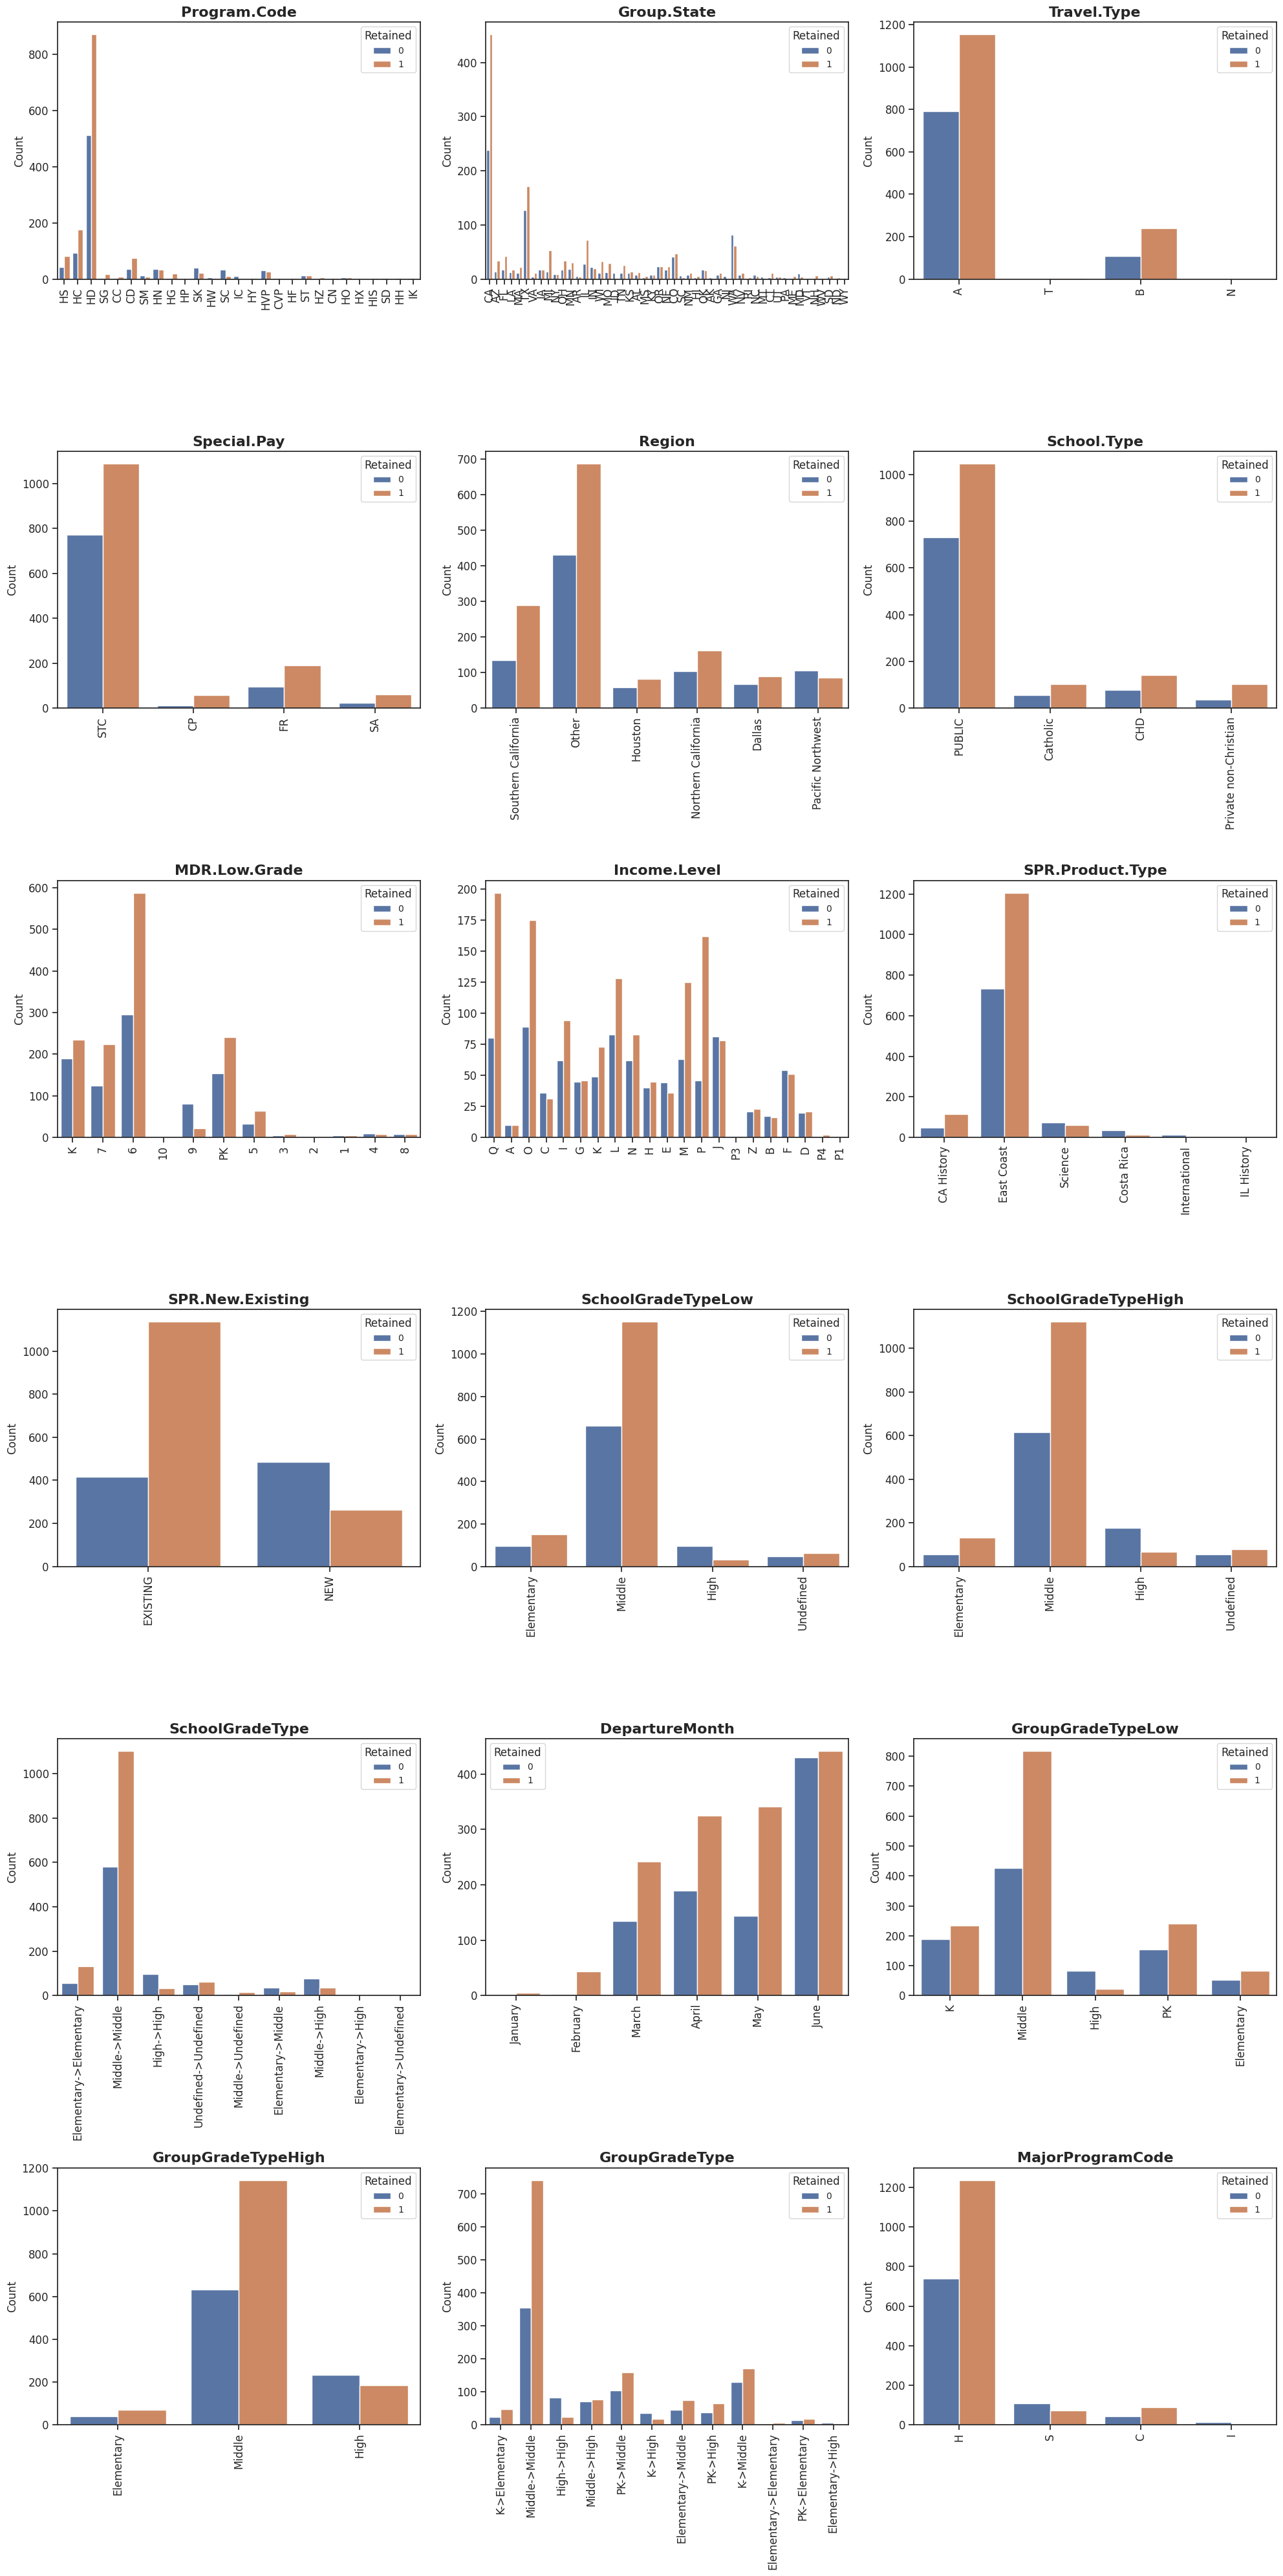

In [867]:
cat_vars = ["Program.Code", "Group.State", "Travel.Type", "Special.Pay", "Region", "School.Type", "MDR.Low.Grade",
            "Income.Level", "SPR.Product.Type", "SPR.New.Existing", "SchoolGradeTypeLow", "SchoolGradeTypeHigh",
            "SchoolGradeType", "DepartureMonth", "GroupGradeTypeLow", "GroupGradeTypeHigh", "GroupGradeType",
            "MajorProgramCode"]

# Crear figuras con subplots
fig, axs = plt.subplots(nrows=6, ncols=3, figsize = (20, 40))
axs = axs.flatten()

# Crear un countplot para cada variable categórica
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue="Retained.in.2012.", data=df_categoricos, ax=axs[i])
    axs[i].set_title(var, fontdict={'fontsize': 16, 'fontweight': 'bold'})
    axs[i].tick_params(axis='both', labelsize=12)
    axs[i].legend(title="Retained", title_fontsize=12, fontsize=10)
    axs[i].set_ylabel("Count", fontsize=12)
    axs[i].set_xlabel("")  # Eliminar el nombre del eje x
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)

# Ajustar espacio entre subplots
fig.tight_layout()

# Mostrar el plot
plt.show()

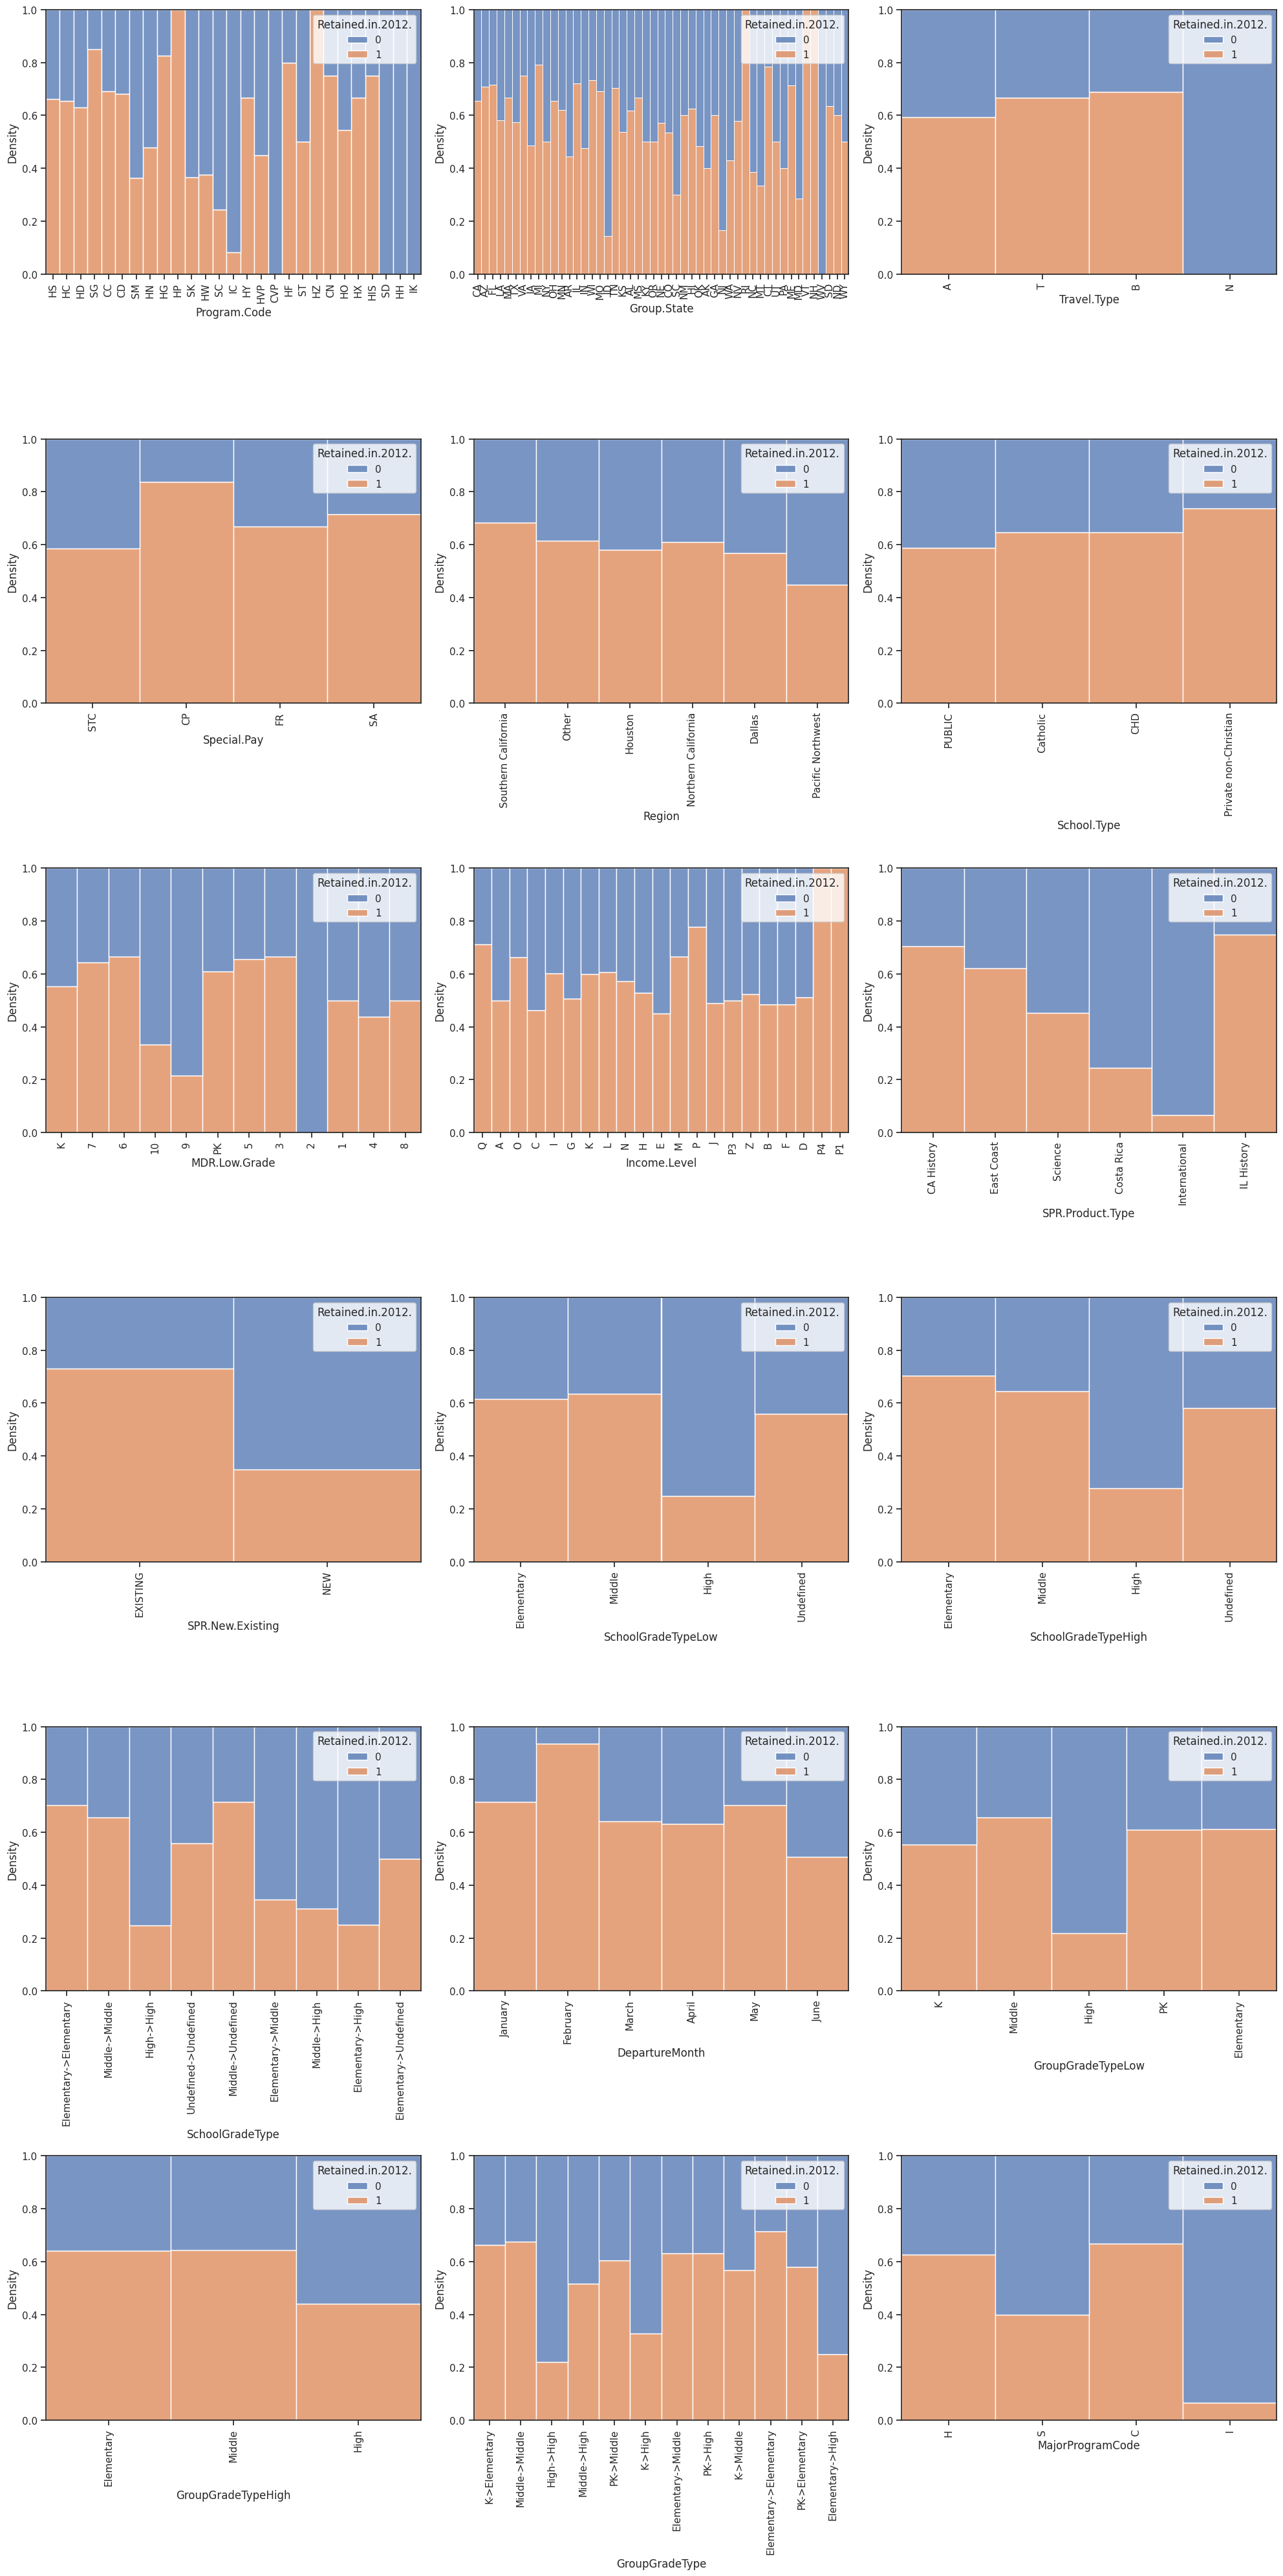

In [868]:
#Lista  de variables categoricas
cat_vars = ["Program.Code", "Group.State", "Travel.Type", "Special.Pay", "Region", "School.Type", "MDR.Low.Grade",
            "Income.Level", "SPR.Product.Type", "SPR.New.Existing", "SchoolGradeTypeLow", "SchoolGradeTypeHigh",
            "SchoolGradeType", "DepartureMonth", "GroupGradeTypeLow", "GroupGradeTypeHigh", "GroupGradeType",
            "MajorProgramCode"]

#Crear figuras con subplots
fig, axs = plt.subplots(nrows=6, ncols=3, figsize = (20, 40))
axs = axs.flatten()

#Crear histogramas para cada variable categorica
for i, var in enumerate (cat_vars):
    sns.histplot(x=var, hue="Retained.in.2012.", data = df_categoricos, ax=axs[i], multiple = "fill", kde = False, element = "bars", fill= True, stat = "density")
    axs[i].set_xticklabels(df_categoricos[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

#Ajustar el especio entre subplots
fig.tight_layout()

#Mostrar el plot
plt.show()

Gráficas para entender variables numéricas


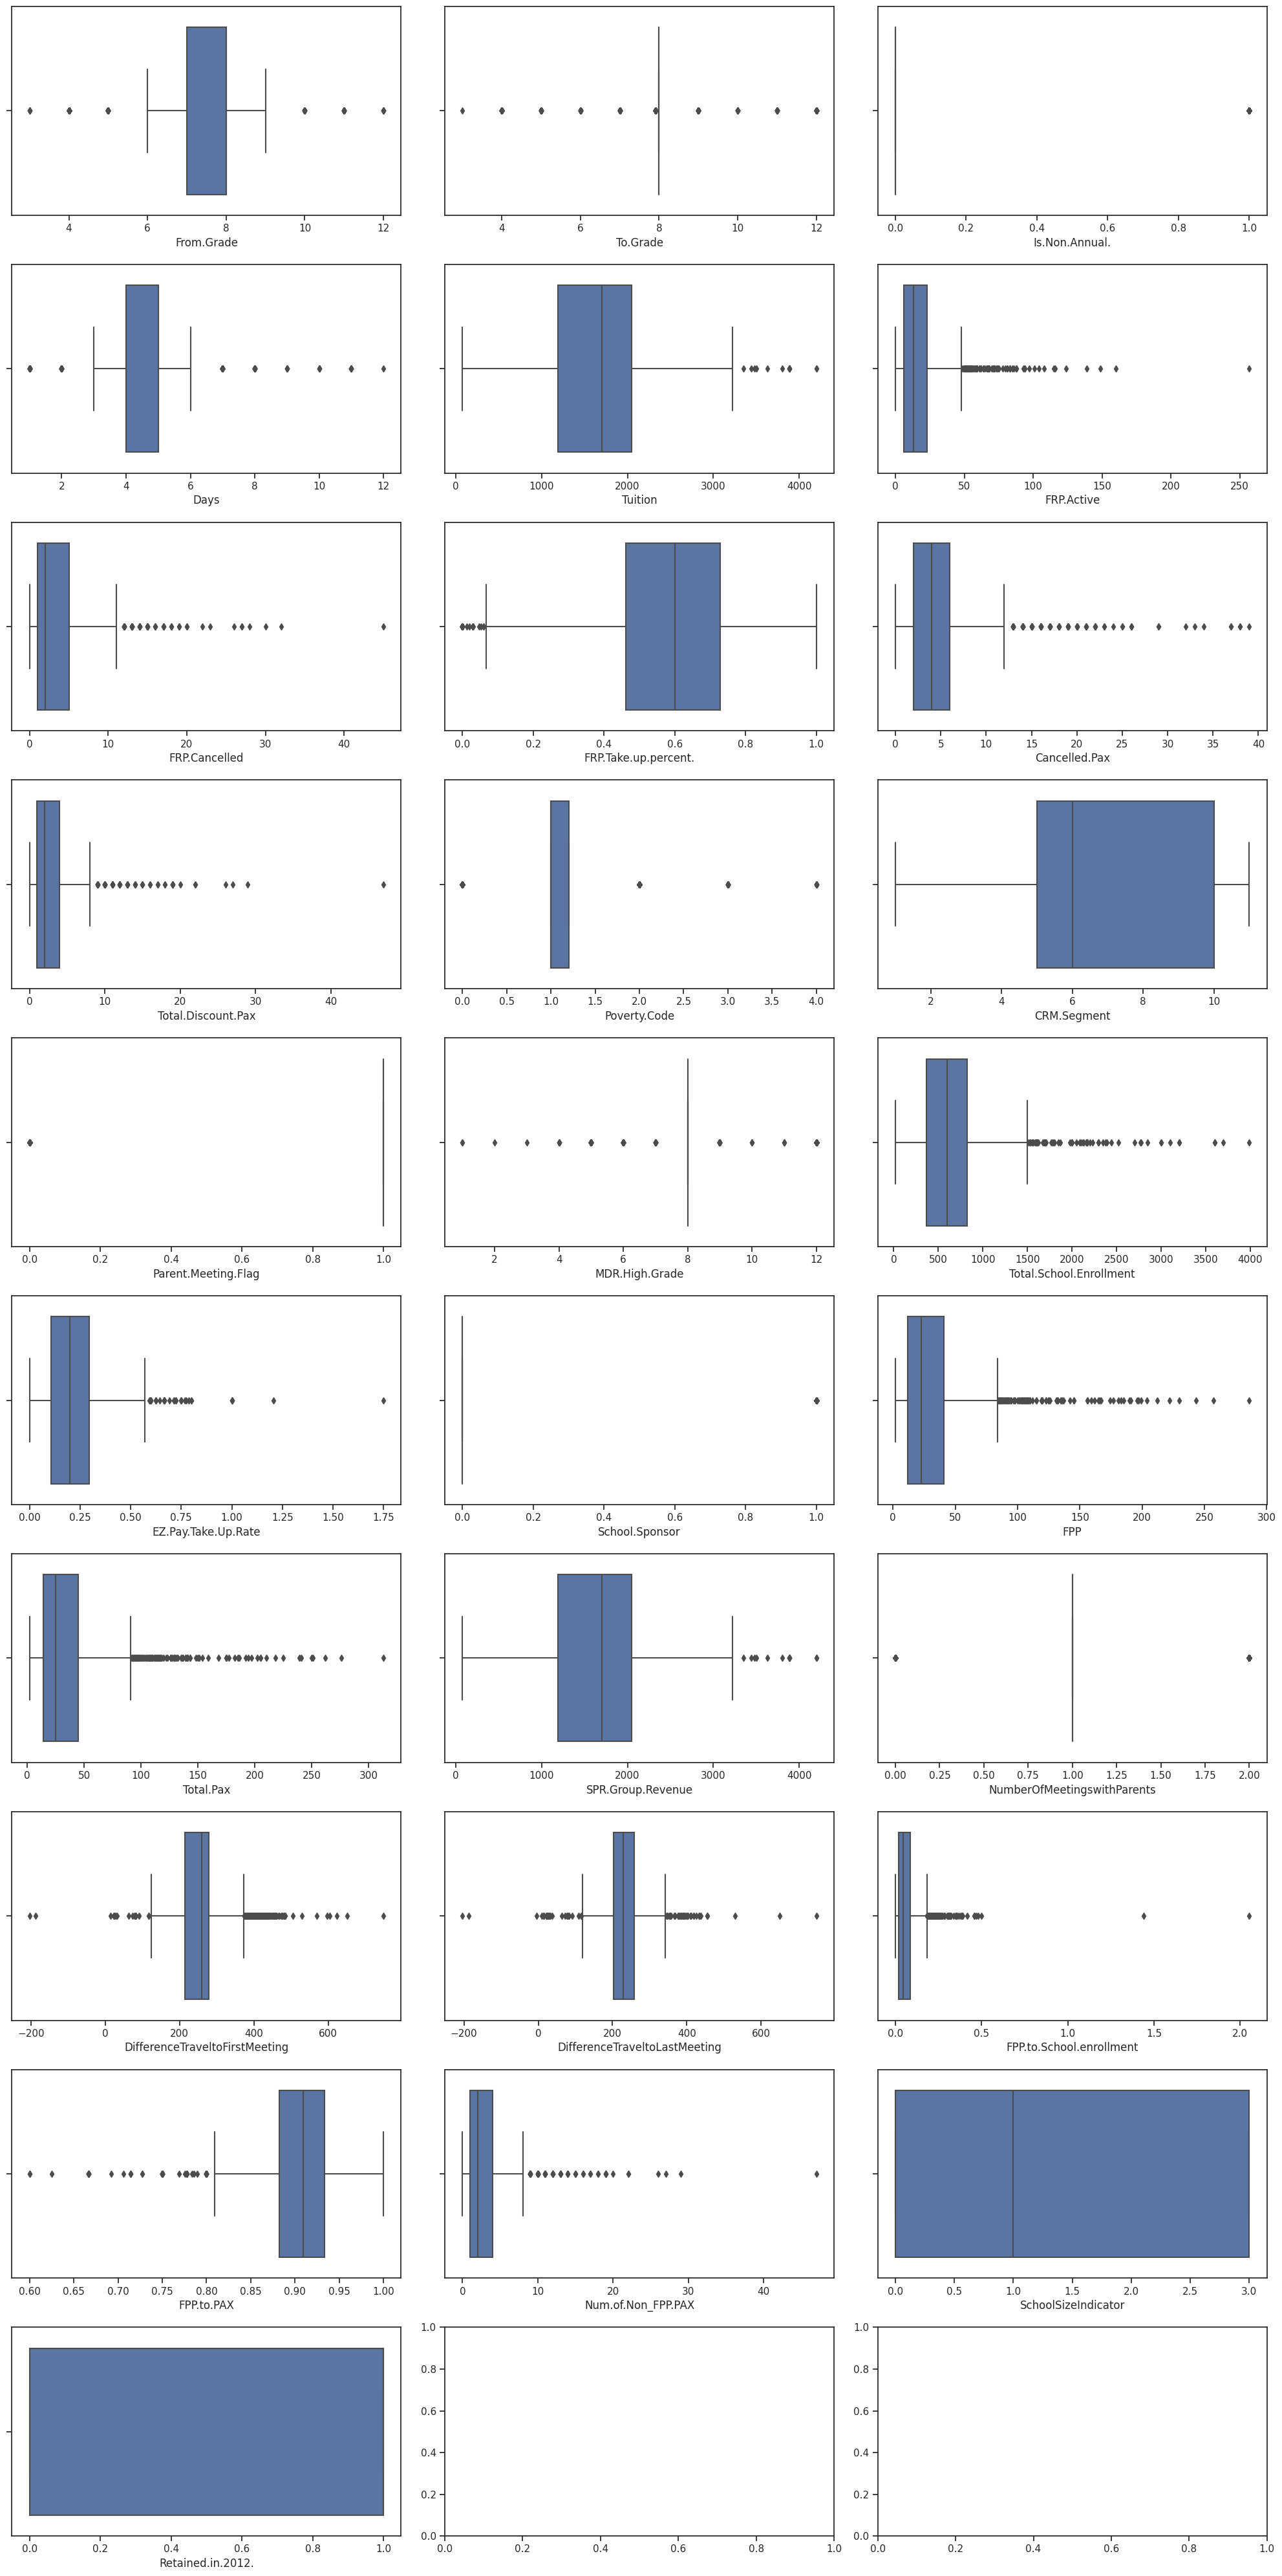

In [869]:
# Documentar sns.boxplot: https://seaborn.pydata.org/generated/seaborn.boxplot.html

num_vars = ['From.Grade', 'To.Grade', 'Is.Non.Annual.', 'Days', 'Tuition', 'FRP.Active', 'FRP.Cancelled',
                   'FRP.Take.up.percent.', 'Cancelled.Pax', 'Total.Discount.Pax', 'Poverty.Code', 'CRM.Segment',
                   'Parent.Meeting.Flag', 'MDR.High.Grade', 'Total.School.Enrollment', 'EZ.Pay.Take.Up.Rate',
                   'School.Sponsor', 'FPP', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
                   'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting', 'FPP.to.School.enrollment',
                   'FPP.to.PAX', 'Num.of.Non_FPP.PAX', 'SchoolSizeIndicator', 'Retained.in.2012.',]

fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

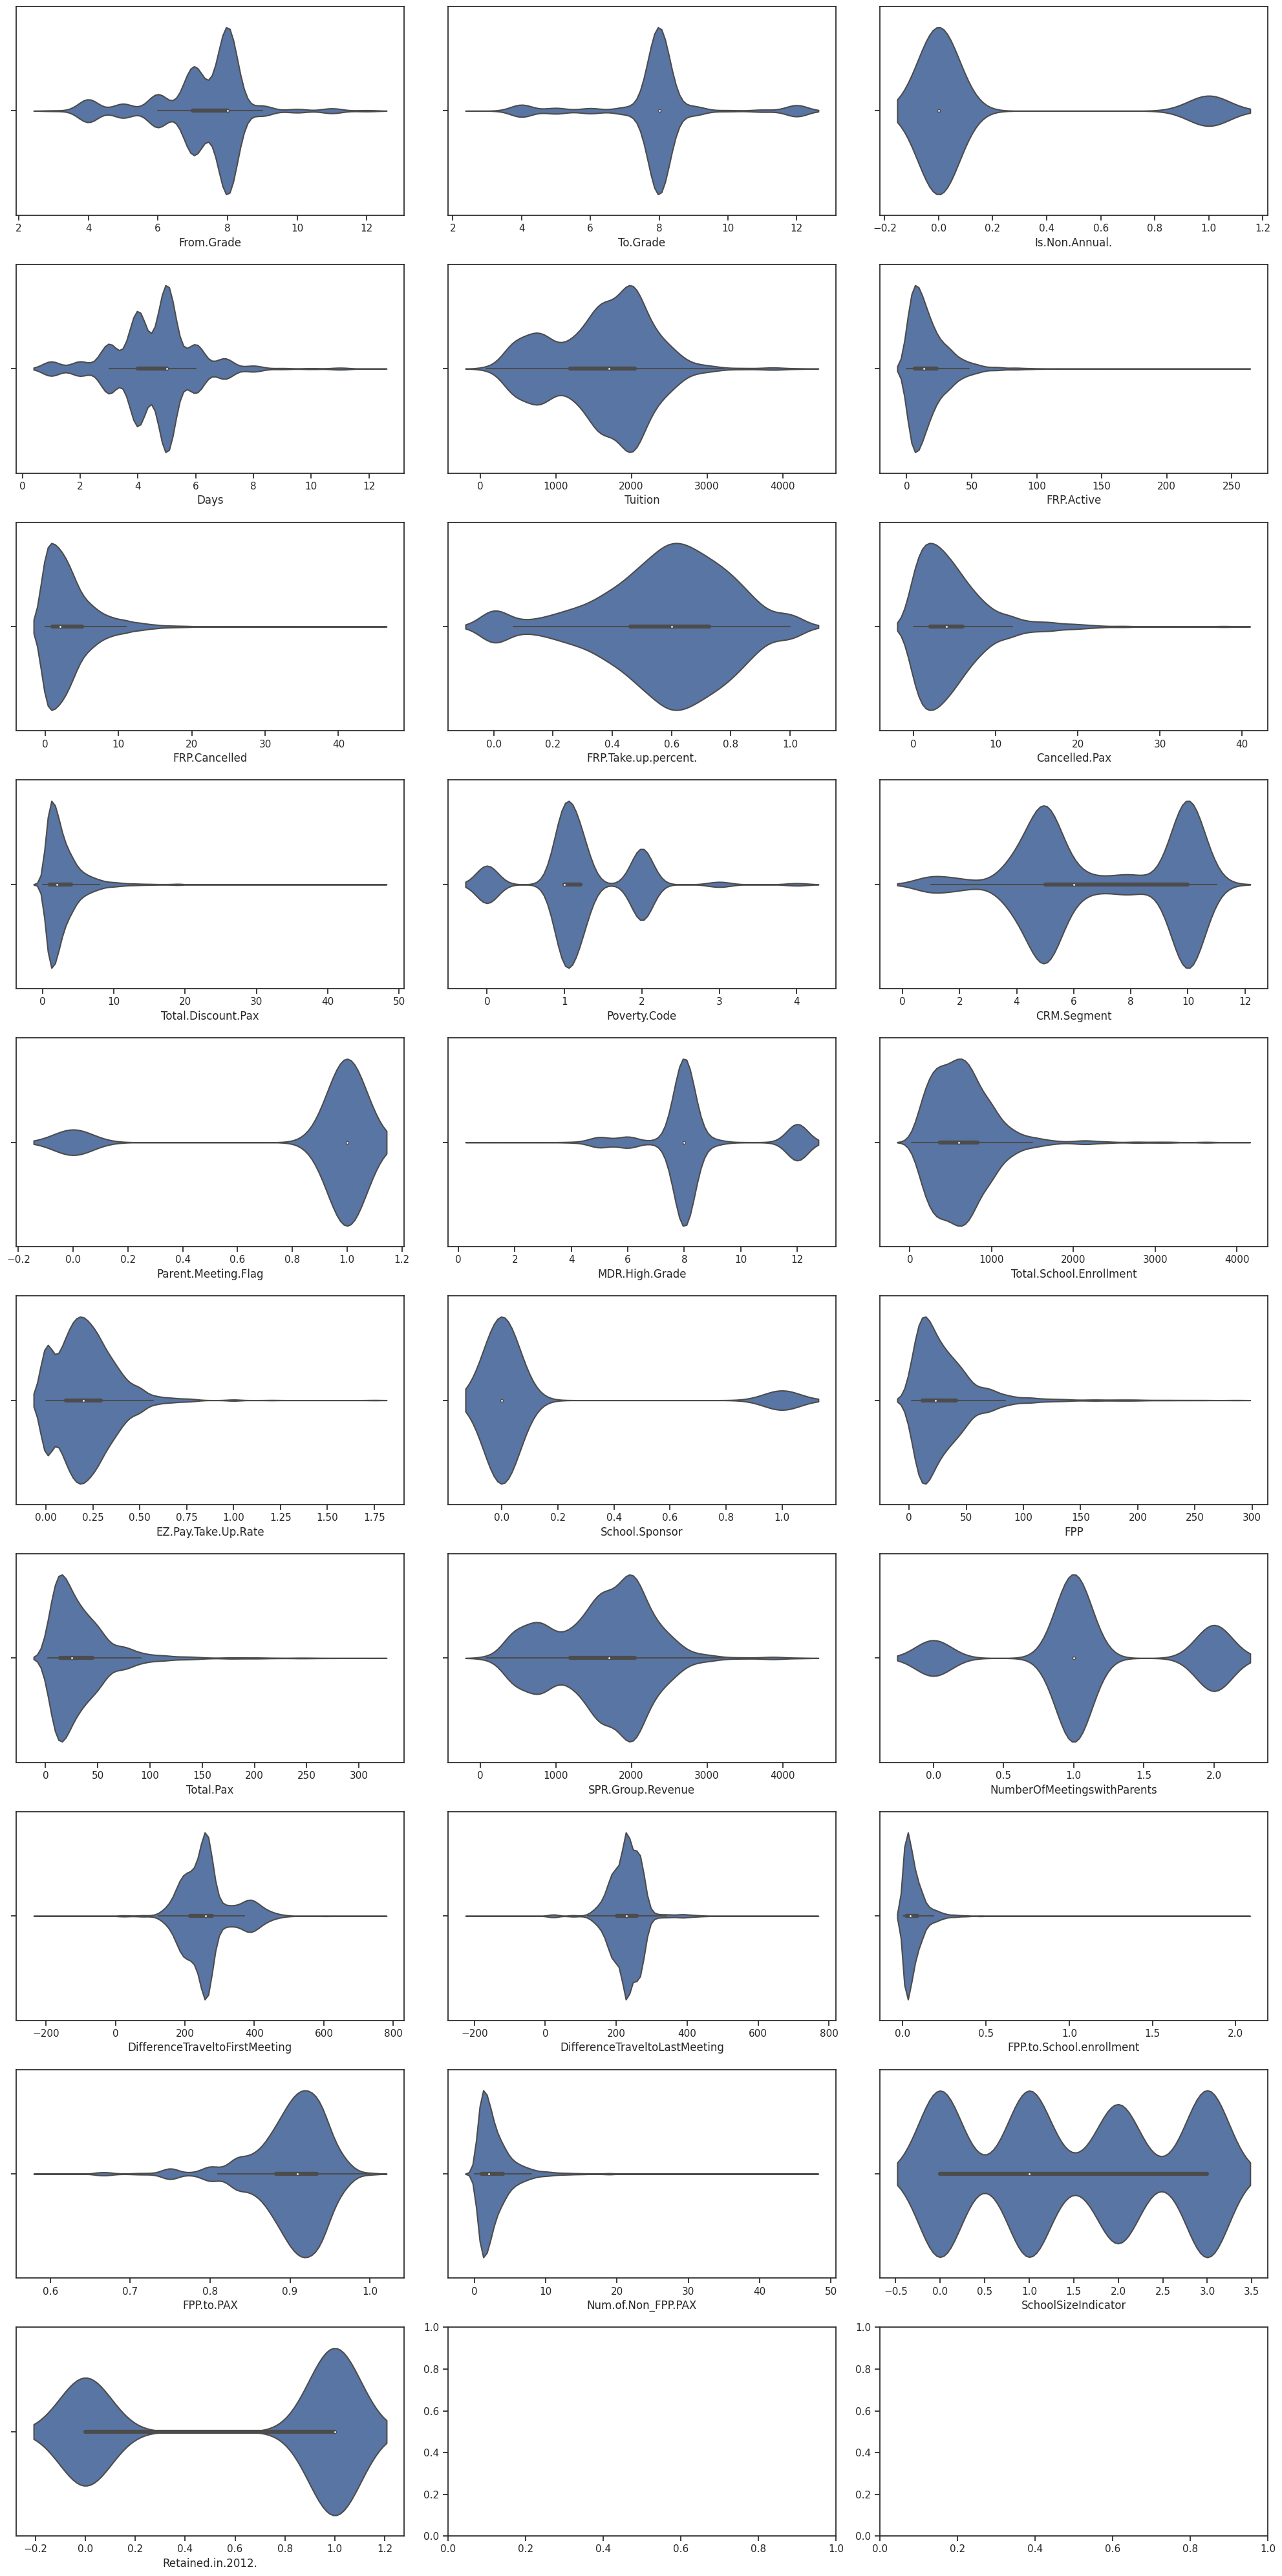

In [870]:
num_vars = ['From.Grade', 'To.Grade', 'Is.Non.Annual.', 'Days', 'Tuition', 'FRP.Active', 'FRP.Cancelled',
                   'FRP.Take.up.percent.', 'Cancelled.Pax', 'Total.Discount.Pax', 'Poverty.Code', 'CRM.Segment',
                   'Parent.Meeting.Flag', 'MDR.High.Grade', 'Total.School.Enrollment', 'EZ.Pay.Take.Up.Rate',
                   'School.Sponsor', 'FPP', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
                   'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting', 'FPP.to.School.enrollment',
                   'FPP.to.PAX', 'Num.of.Non_FPP.PAX', 'SchoolSizeIndicator', 'Retained.in.2012.',]

fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

#Analizamos variables numéricas

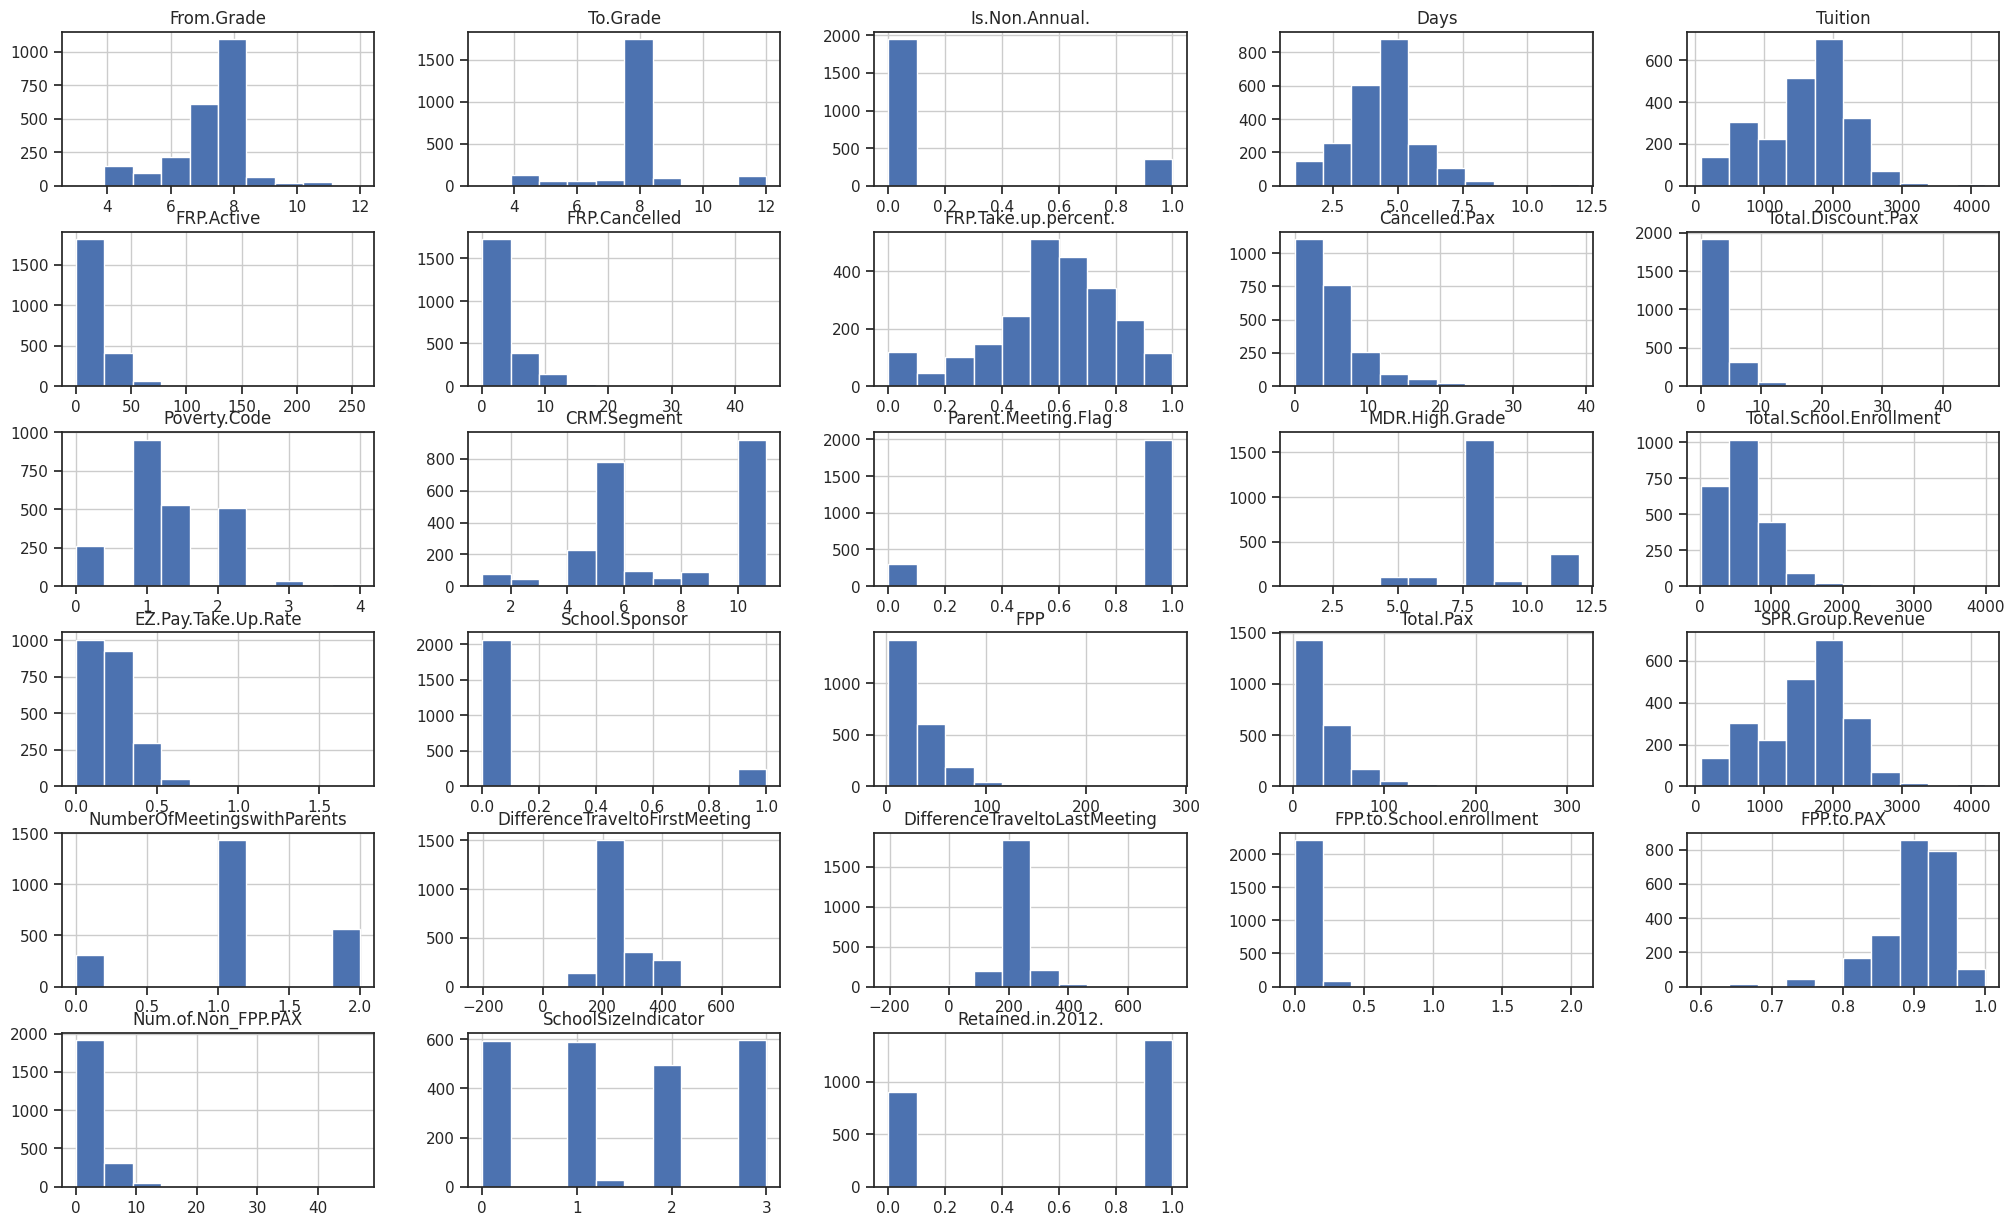

In [871]:
num_vars = ['From.Grade', 'To.Grade', 'Is.Non.Annual.', 'Days', 'Tuition', 'FRP.Active', 'FRP.Cancelled',
                   'FRP.Take.up.percent.', 'Cancelled.Pax', 'Total.Discount.Pax', 'Poverty.Code', 'CRM.Segment',
                   'Parent.Meeting.Flag', 'MDR.High.Grade', 'Total.School.Enrollment', 'EZ.Pay.Take.Up.Rate',
                   'School.Sponsor', 'FPP', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
                   'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting', 'FPP.to.School.enrollment',
                   'FPP.to.PAX', 'Num.of.Non_FPP.PAX', 'SchoolSizeIndicator', 'Retained.in.2012.']
#fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))
#axs = axs.flatten()

#for i, var in enumerate(num_vars):
#    sns.histplot(x=var, data=df, ax=axs[i])

#fig.tight_layout()

#plt.show()

df[num_vars].hist(figsize=(25,15))
plt.show()

Podemos concluir las siguientes aseveraciones a partir de estas gráficas: *La mayoría de los viajes duran entre 4 y 5 días. *La mayoría de los viajes cuestan entre 1,500 y 2,000 USD. *La gran mayoría de los participantes que pagaron el viaje al 100% (FPP) no compraron seguro de cancelación. *La gran mayoría de las escuelas participantes tienen menos de 1000 estudiantes. *Los grupos son, en la gran mayoría de los casos, de 30 participantes. *El pago total por los viajes está normalmente distribuido

#Evaluamos la actividad de los viajes por mes
Primero graficamos en base a la cantidad de personas que han pagado un viaje (FPP) por mes

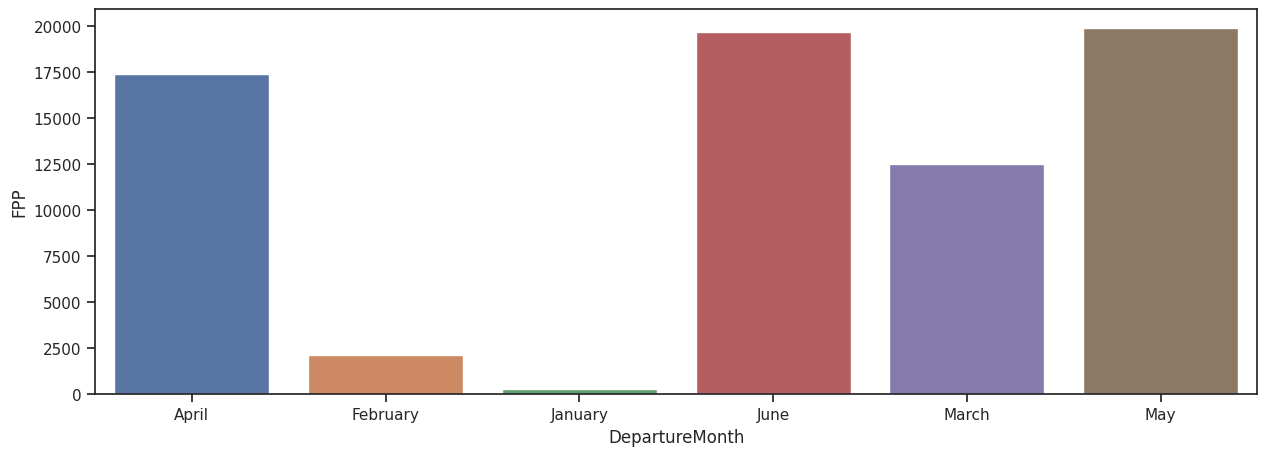

In [872]:
viajes_por_mes = df.groupby(by="DepartureMonth").sum().reset_index()
plt.figure(figsize=(15,5))



sns.barplot(data=viajes_por_mes, x="DepartureMonth",
            y="FPP");

[05:12 p. m.] Ney (Guest)

Notamos que los meses con mayor atendencia de personas son Junio y Mayo con alrededor de 20,000 asistentes cada uno y los que tuvieron menos asistentes son Febrero y Enero con menos de 2500. Marzo tuvo una asistencia promedio de aproximadamente 12,500 asistentes

[05:12 p. m.] Ney (Guest)

Ahora graficamos en base a la cantidad de viajes realizados por mes

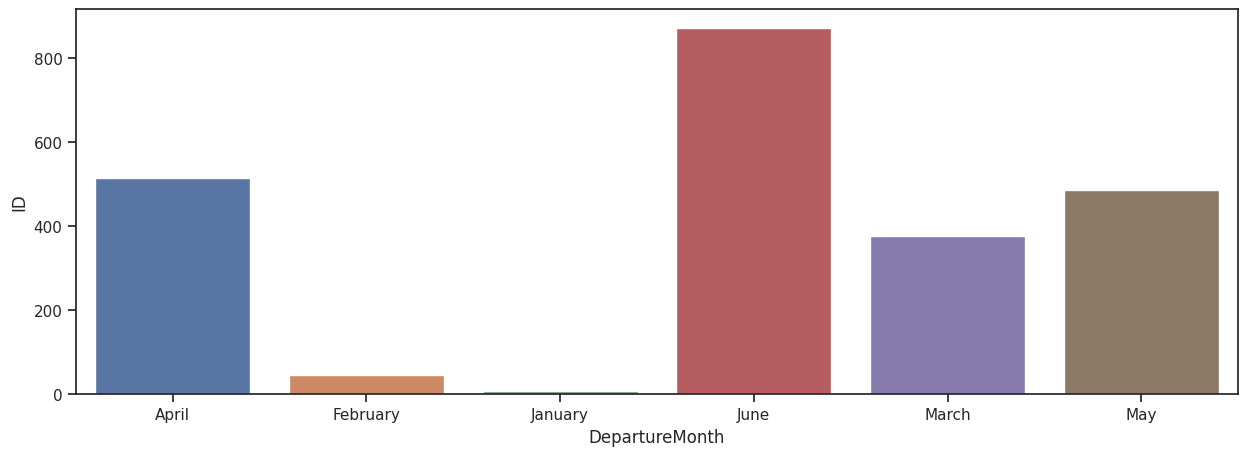

In [873]:
viajes_por_mes = df.groupby(by="DepartureMonth").count().reset_index()
plt.figure(figsize=(15,5))



sns.barplot(data=viajes_por_mes, x="DepartureMonth", y="ID");

Notamos que cuando contamos en base a cantidad de viajes, el mes de junio es el que muestra mayor actividad con más de 800 viajes seguido de abril y mayo con cerca de 500 viajes cada uno

Por último graficamos en base a la cantidad de gente retenida en el ejercicio anterior por mes.

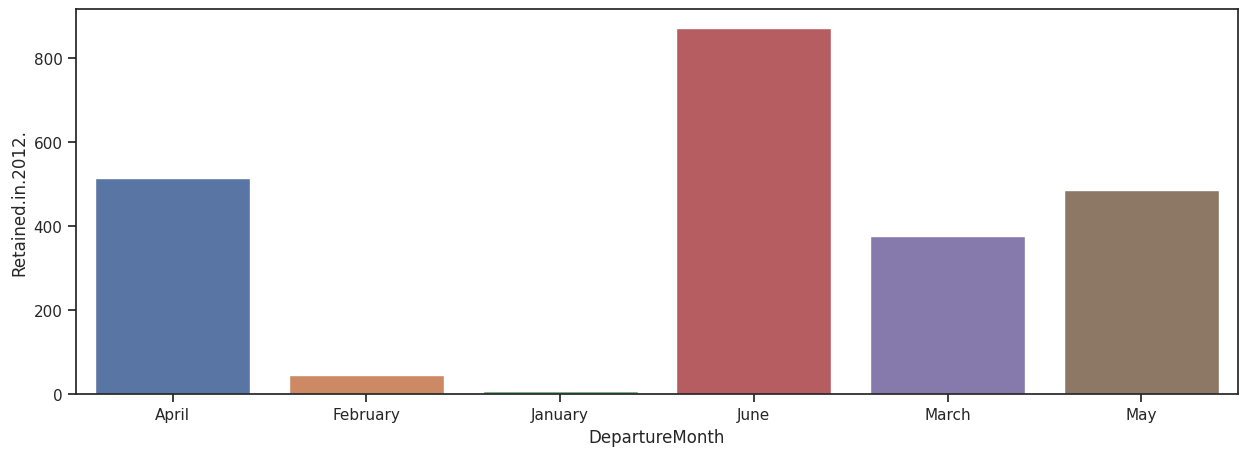

In [874]:
viajes_por_mes = df.groupby(by="DepartureMonth").count().reset_index()
plt.figure(figsize=(15,5))



sns.barplot(viajes_por_mes, x="DepartureMonth",
            y="Retained.in.2012.");

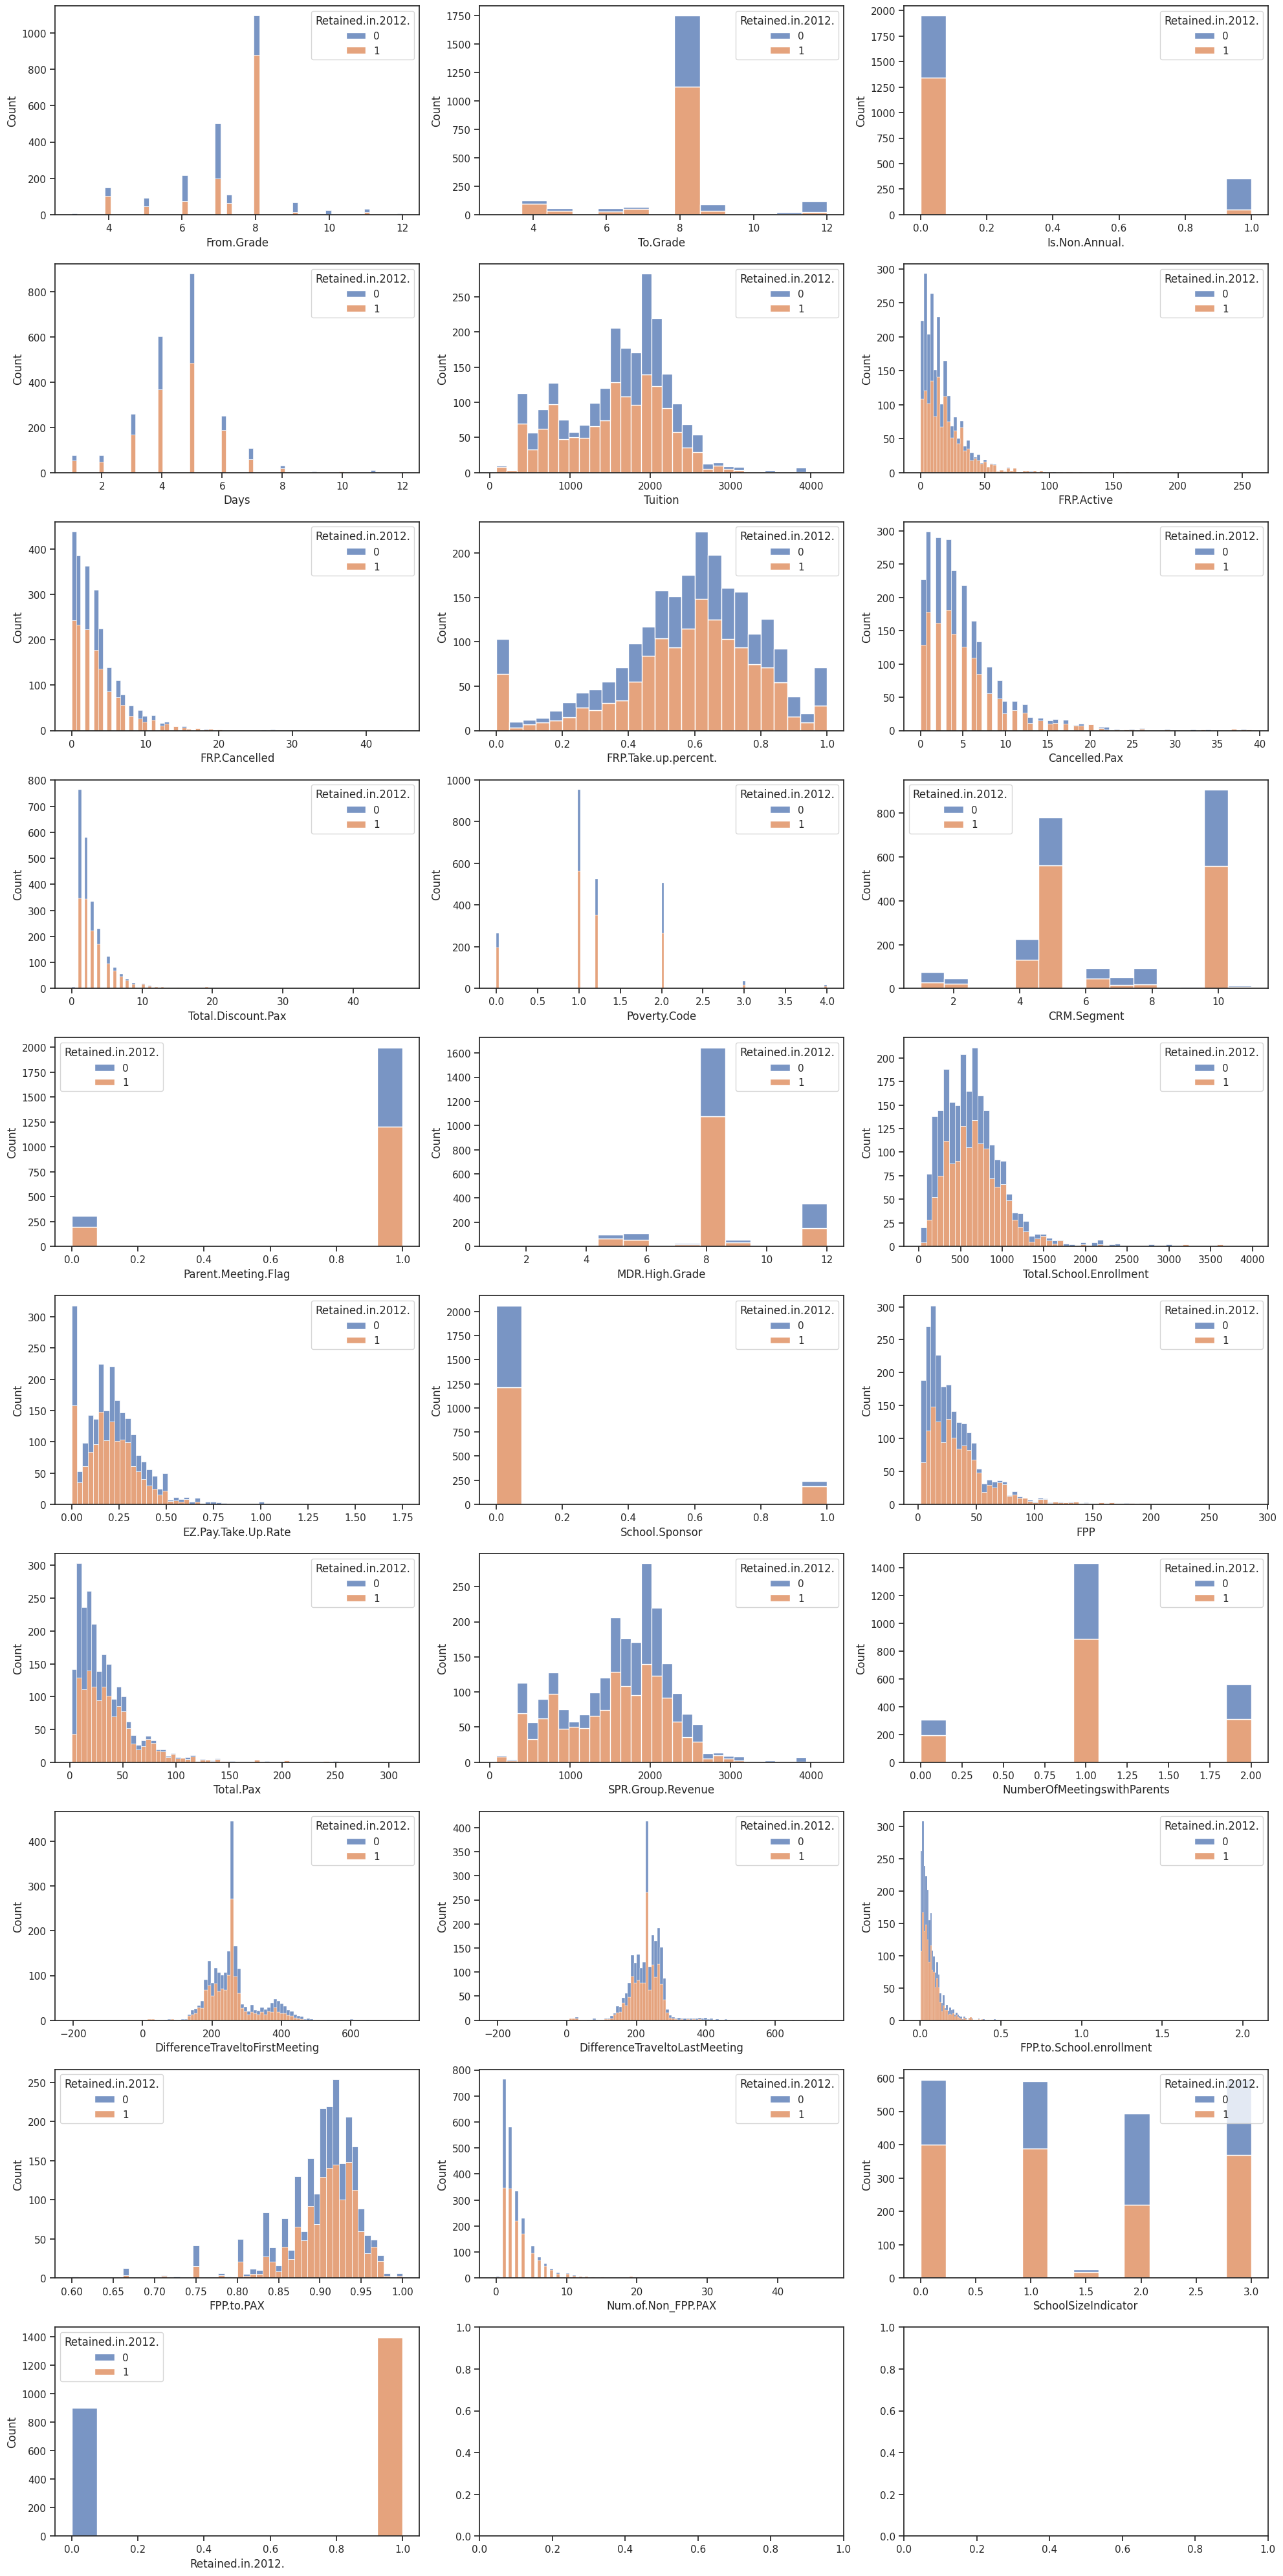

In [875]:
num_vars = ['From.Grade', 'To.Grade', 'Is.Non.Annual.', 'Days', 'Tuition', 'FRP.Active', 'FRP.Cancelled',
                   'FRP.Take.up.percent.', 'Cancelled.Pax', 'Total.Discount.Pax', 'Poverty.Code', 'CRM.Segment',
                   'Parent.Meeting.Flag', 'MDR.High.Grade', 'Total.School.Enrollment', 'EZ.Pay.Take.Up.Rate',
                   'School.Sponsor', 'FPP', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
                   'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting', 'FPP.to.School.enrollment',
                   'FPP.to.PAX', 'Num.of.Non_FPP.PAX', 'SchoolSizeIndicator', 'Retained.in.2012.']

fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, hue="Retained.in.2012.", data=df, ax=axs[i], multiple="stack")

fig.tight_layout()

plt.show()

# **REGRESIÓN LOGÍSTICA**

# **PROCESAMIENTO DE DATOS**

**Utilizar pandas.Series.unique**
Devuelve valores únicos de una serie de objetos.

Los valor únicos se devuelven en orden de aparición. Los valores Únicos se basan en tablas hash, por lo tanto, NO se ordenan.

https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html

Las variables categorícas las vamos a convertir a numero: "Program.Code", "Group.State", "Travel.Type", "Special.Pay", "Region", "School.Type", "MDR.Low.Grade", "Income.Level", "SPR.Product.Type", "SPR.New.Existing", "SchoolGradeTypeLow", "SchoolGradeTypeHigh","SchoolGradeType", "DepartureMonth", "GroupGradeTypeLow", "GroupGradeTypeHigh", "GroupGradeType","MajorProgramCode"

In [876]:
df['Program.Code'].unique()

array(['HS', 'HC', 'HD', 'SG', 'CC', 'CD', 'SM', 'HN', 'HG', 'HP', 'SK',
       'HW', 'SC', 'IC', 'HY', 'HVP', 'CVP', 'HF', 'ST', 'HZ', 'CN', 'HO',
       'HX', 'HIS', 'SD', 'HH', 'IK'], dtype=object)

In [877]:
df['Group.State'].unique()

array(['CA', 'AZ', 'FL', 'LA', 'MA', 'TX', 'VA', 'IA', 'MI', 'NY', 'OH',
       'MN', 'AR', 'IL', 'IN', 'WI', 'MO', 'ID', 'TN', 'KS', 'AL', 'MS',
       'KY', 'OR', 'NE', 'CO', 'SC', 'NM', 'HI', 'OK', 'AK', 'GA', 'NJ',
       'WA', 'NV', 'RI', 'NC', 'MT', 'CT', 'UT', 'PA', 'ME', 'MD', 'VT',
       'NH', 'WV', 'SD', 'ND', 'WY'], dtype=object)

In [878]:
df['Travel.Type'].unique()

array(['A', 'T', 'B', 'N'], dtype=object)

In [879]:
df['Special.Pay'].unique()

array(['STC', 'CP', 'FR', 'SA'], dtype=object)

In [880]:
df['Region'].unique()

array(['Southern California', 'Other', 'Houston', 'Northern California',
       'Dallas', 'Pacific Northwest'], dtype=object)

In [881]:
df['School.Type'].unique()

array(['PUBLIC', 'Catholic', 'CHD', 'Private non-Christian'], dtype=object)

In [882]:
df['MDR.Low.Grade'].unique()

array(['K', '7', '6', '10', '9', 'PK', '5', '3', '2', '1', '4', '8'],
      dtype=object)

In [883]:
df['Income.Level'].unique()

array(['Q', 'A', 'O', 'C', 'I', 'G', 'K', 'L', 'N', 'H', 'E', 'M', 'P',
       'J', 'P3', 'Z', 'B', 'F', 'D', 'P4', 'P1'], dtype=object)

In [884]:
df['SPR.Product.Type'].unique()

array(['CA History', 'East Coast', 'Science', 'Costa Rica',
       'International', 'IL History'], dtype=object)

In [885]:
df['SPR.New.Existing'].unique()

array(['EXISTING', 'NEW'], dtype=object)

In [886]:
df['SchoolGradeTypeLow'].unique()

array(['Elementary', 'Middle', 'High', 'Undefined'], dtype=object)

In [887]:
df['SchoolGradeTypeHigh'].unique()

array(['Elementary', 'Middle', 'High', 'Undefined'], dtype=object)

In [888]:
df['SchoolGradeType'].unique()

array(['Elementary->Elementary', 'Middle->Middle', 'High->High',
       'Undefined->Undefined', 'Middle->Undefined', 'Elementary->Middle',
       'Middle->High', 'Elementary->High', 'Elementary->Undefined'],
      dtype=object)

In [889]:
df['DepartureMonth'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [890]:
df['GroupGradeTypeLow'].unique()

array(['K', 'Middle', 'High', 'PK', 'Elementary'], dtype=object)

In [891]:
df['GroupGradeTypeHigh'].unique()

array(['Elementary', 'Middle', 'High'], dtype=object)

In [892]:
df['GroupGradeType'].unique()

array(['K->Elementary', 'Middle->Middle', 'High->High', 'Middle->High',
       'PK->Middle', 'K->High', 'Elementary->Middle', 'PK->High',
       'K->Middle', 'Elementary->Elementary', 'PK->Elementary',
       'Elementary->High'], dtype=object)

In [893]:
df['MajorProgramCode'].unique()

array(['H', 'S', 'C', 'I'], dtype=object)

# **Transformar datos**
**El paquete sklearn.preprocessing proporciona varias funciones comunes que son de utilidad en la transformación de clases**
para cambiar los vectores de características en una representación que sea más adecuada para los estimadores posteriores.

**En general, los algoritmos de aprendizaje se benefician de la estandarización del conjunto de datos.**
https://scikit-learn.org/stable/modules/preprocessing.html

In [894]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Program.Code']= label_encoder.fit_transform(df['Program.Code'])
df['Program.Code'].unique()

array([13,  4,  5, 23,  0,  1, 25, 10,  7, 12, 24, 15, 21, 19, 17, 14,  3,
        6, 26, 18,  2, 11, 16,  9, 22,  8, 20])

In [895]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Group.State']= label_encoder.fit_transform(df['Group.State'])
df['Group.State'].unique()

array([ 4,  3,  7, 16, 17, 41, 43, 10, 20, 32, 33, 21,  2, 12, 13, 46, 22,
       11, 40, 14,  1, 23, 15, 35, 27,  5, 38, 30,  9, 34,  0,  8, 29, 45,
       31, 37, 25, 24,  6, 42, 36, 19, 18, 44, 28, 47, 39, 26, 48])

In [896]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Travel.Type']= label_encoder.fit_transform(df['Travel.Type'])
df['Travel.Type'].unique()

array([0, 3, 1, 2])

In [897]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Special.Pay']= label_encoder.fit_transform(df['Special.Pay'])
df['Special.Pay'].unique()

array([3, 0, 1, 2])

In [898]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Region']= label_encoder.fit_transform(df['Region'])
df['Region'].unique()

array([5, 3, 1, 2, 0, 4])

In [899]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['School.Type']= label_encoder.fit_transform(df['School.Type'])
df['School.Type'].unique()

array([2, 1, 0, 3])

In [900]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['MDR.Low.Grade']= label_encoder.fit_transform(df['MDR.Low.Grade'])
df['MDR.Low.Grade'].unique()

array([10,  7,  6,  1,  9, 11,  5,  3,  2,  0,  4,  8])

In [901]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Income.Level']= label_encoder.fit_transform(df['Income.Level'])
df['Income.Level'].unique()

array([19,  0, 14,  2,  8,  6, 10, 11, 13,  7,  4, 12, 15,  9, 17, 20,  1,
        5,  3, 18, 16])

In [902]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['SPR.Product.Type']= label_encoder.fit_transform(df['SPR.Product.Type'])
df['SPR.Product.Type'].unique()

array([0, 2, 5, 1, 4, 3])

In [903]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['SPR.New.Existing']= label_encoder.fit_transform(df['SPR.New.Existing'])
df['SPR.New.Existing'].unique()

array([0, 1])

In [904]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['SchoolGradeTypeLow']= label_encoder.fit_transform(df['SchoolGradeTypeLow'])
df['SchoolGradeTypeLow'].unique()

array([0, 2, 1, 3])

In [905]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['SchoolGradeTypeHigh']= label_encoder.fit_transform(df['SchoolGradeTypeHigh'])
df['SchoolGradeTypeHigh'].unique()

array([0, 2, 1, 3])

In [906]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['SchoolGradeType']= label_encoder.fit_transform(df['SchoolGradeType'])
df['SchoolGradeType'].unique()

array([0, 6, 4, 8, 7, 2, 5, 1, 3])

In [907]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['DepartureMonth']= label_encoder.fit_transform(df['DepartureMonth'])
df['DepartureMonth'].unique()

array([2, 1, 4, 0, 5, 3])

In [908]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['GroupGradeTypeLow']= label_encoder.fit_transform(df['GroupGradeTypeLow'])
df['GroupGradeTypeLow'].unique()

array([2, 3, 1, 4, 0])

In [909]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['GroupGradeTypeHigh']= label_encoder.fit_transform(df['GroupGradeTypeHigh'])
df['GroupGradeTypeHigh'].unique()

array([0, 2, 1])

In [910]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['GroupGradeType']= label_encoder.fit_transform(df['GroupGradeType'])
df['GroupGradeType'].unique()

array([ 4,  8,  3,  7, 11,  5,  2, 10,  6,  0,  9,  1])

In [911]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['MajorProgramCode']= label_encoder.fit_transform(df['MajorProgramCode'])
df['MajorProgramCode'].unique()

array([1, 3, 0, 2])

In [912]:
df.head()

ID  Program.Code  From.Grade  To.Grade  Group.State  Is.Non.Annual.  Days  \
0   1            13         4.0       4.0            4               0     1   
1   2             4         8.0       8.0            3               0     7   
2   3             5         8.0       8.0            7               0     3   
4   5             5         6.0       8.0            7               0     6   
5   6             4        10.0      12.0           16               0     4   

   Travel.Type Departure.Date Return.Date Deposit.Date  Special.Pay  Tuition  \
0            0     2011-01-14  2011-01-14   2010-08-30            3      424   
1            0     2011-01-14  2011-01-21   2009-11-15            0     2350   
2            0     2011-01-15  2011-01-17   2010-10-15            3     1181   
4            3     2011-01-16  2011-01-21   2010-09-30            3      865   
5            0     2011-01-17  2011-01-20   2010-09-30            3     2025   

   FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL Latest.RPL  \
0          25              3                 0.424 2010-03-29 2010-08-12   
1           9              9                 0.409 2009-10-20 2010-08-10   
2          17              6                 0.708 2010-04-29 2010-08-16   
4          40              8                 0.494 2010-03-29 2010-08-12   
5           9              4                 0.900 2010-03-16 2010-10-06   

   Cancelled.Pax  Total.Discount.Pax Initial.System.Date  Poverty.Code  \
0              3                   4          2010-03-26           1.0   
1             11                   3          2009-10-02           2.0   
2              6                   3          2010-01-28           2.0   
4              9                   8          2010-03-23           3.0   
5              3                   1          2010-03-16           2.0   

   Region  CRM.Segment  School.Type  Parent.Meeting.Flag  MDR.Low.Grade  \
0       5          4.0            2                    1             10   
1       3         10.0            2                    1              7   
2       3         10.0            2                    1              6   
4       3         10.0            2                    1              6   
5       3          8.0            2                    1              1   

   MDR.High.Grade  Total.School.Enrollment  Income.Level  EZ.Pay.Take.Up.Rate  \
0             5.0                    927.0            19                0.170   
1             8.0                    850.0             0                0.091   
2             8.0                    955.0            14                0.042   
4             8.0                    720.0             2                0.383   
5            12.0                    939.0             8                0.100   

   School.Sponsor  SPR.Product.Type  SPR.New.Existing  FPP  Total.Pax  \
0               1                 0                 0   59         63   
1               0                 2                 0   22         25   
2               0                 2                 0   24         27   
4               0                 2                 0   81         89   
5               0                 2                 1   10         11   

   SPR.Group.Revenue  NumberOfMeetingswithParents FirstMeeting LastMeeting  \
0                424                            1   2010-08-12  2010-08-12   
1               2350                            2   2009-11-17  2010-08-27   
2               1181                            1   2010-09-13  2010-09-13   
4                865                            1   2010-08-24  2010-08-24   
5               2025                            1   2010-10-18  2010-10-18   

   DifferenceTraveltoFirstMeeting  DifferenceTraveltoLastMeeting  \
0                           155.0                          155.0   
1                           423.0                          140.0   
2                           124.0                          124.0   
4                    

In [913]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Departure.Date']= label_encoder.fit_transform(df['Departure.Date'])
df['Departure.Date'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141])

In [914]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Return.Date']= label_encoder.fit_transform(df['Return.Date'])
df['Return.Date'].unique()

array([  0,   3,   1,   2,   4,   5,   6,   7,   8,   9,  11,  10,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  23,  25,  22,  24,
        26,  27,  28,  31,  29,  30,  32,  33,  34,  39,  36,  37,  35,
        38,  40,  41,  42,  43,  44,  45,  46,  47,  49,  48,  53,  50,
        51,  52,  54,  55,  56,  57,  58,  59,  61,  60,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  76,  75,  77,
        78,  79,  80,  81,  83,  82,  84,  87,  85,  88,  86,  89,  90,
        93,  91,  94,  92,  95,  96, 100,  97, 101,  98,  99, 102, 103,
       104, 107, 105, 108, 106, 109, 110, 111, 112, 113, 115, 114, 116,
       117, 121, 118, 120, 119, 124, 122, 123, 129, 125, 126, 127, 128,
       130, 131, 132, 136, 134, 133, 135, 137, 138, 139])

In [915]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Deposit.Date']= label_encoder.fit_transform(df['Deposit.Date'])
df['Deposit.Date'].unique()

array([ 13,   1,  40,  26,   9,  50,  34,  22,  27,  54,  57,  30,  48,
        45,  65,  47,  33,  69,  67,  53, 108,  62,  63,  37,  20,  76,
        55,  61,  59,  29,  56,  43,  44,  14,  36,  73,  51,  64,  24,
        87,  82, 100,  38,  72,  16,  81,  52,  99, 104,  84,  15,  25,
        35,  39, 112,  58,  17,  96,  93,  23,  28,  10,  31,  98,  78,
        90,  95,  60,  91,  42,  71,  46,  79,  97,  11,   0,  32, 102,
       114,  19,   4, 101,   6,  12,  21,  41,  18,  77,  70,  66, 107,
        92, 105, 115, 111,   8, 121,   2,  83,   7, 110, 103, 120, 124,
       123, 116, 113,  80,  86,  85, 122, 109,   5,  49, 118, 119, 117,
        88,   3,  94,  74,  75,  89,  68, 106])

In [916]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Early.RPL']= label_encoder.fit_transform(df['Early.RPL'])
df['Early.RPL'].unique()

array([ 72,  14,  95,  63,  50,  41,  75, 163,  40,  49,  52,  85,  36,
        73,  21,  54,  55,  27,  77,  88,  62,  80,  42,  53,  37, 101,
        31,  71, 175, 113, 109, 177,  45,  65, 178,  84, 156,  92,  70,
        82,  68,  58, 102,  89,  28,  60,  78, 146, 162,  33,  69,  98,
        64,  90,  47,  91,  43, 100, 106, 144,  99, 132,  81, 192,  86,
       159,  39, 160,  94,  59,  35,  96, 166, 133,  97, 152,  18,  38,
        51, 191, 149, 168, 198,  56,  46,  76,  74, 176, 143,  61, 103,
        34,  83,  79, 190, 201, 111, 188,  57,  44,  93, 139, 189,  87,
       165, 173, 184, 157, 112, 179, 181,  66,   3, 107, 172, 182, 150,
       123, 148, 194, 108, 205, 136, 110, 155,  30, 104, 115, 142,  25,
       138, 161, 167, 220,  29, 171, 147,  67, 174, 164,  22, 105, 180,
        15, 169, 126, 114, 212, 117, 210, 120, 196,  32,  13,   7, 206,
       183, 153, 217,   2,   9, 158,  19,   6, 121, 145, 200, 187, 170,
         4, 141, 124, 219, 140, 226, 215, 118, 122,  11, 127, 19

In [917]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Latest.RPL']= label_encoder.fit_transform(df['Latest.RPL'])
df['Latest.RPL'].unique()

array([113, 111, 115, 153, 128,  22, 112, 129, 119, 125, 121, 127, 152,
       126, 135, 137, 124, 116, 131, 122, 118, 141,  82, 130, 107, 143,
       144,  12,  73,  78,  45, 140, 123, 108, 134, 133,  21, 109,  28,
       148, 110, 120, 106, 142, 105,  63, 132, 139,  96, 159,  97,   9,
        20, 114, 158, 165, 117, 155,  36,  55,  60,  31,  46, 157, 168,
       147, 103, 138, 156,  59, 151,  69, 146,  68,  43, 145,   2, 161,
       172, 100, 136, 179,  30, 102,  80, 187,  29,  37,  25,  72,  91,
        38,  75, 191,  85, 177,  67,  92,  66,  16, 162,  64,  19, 163,
        61,  65,  57,  27,   7,   4, 171, 173, 149, 184,  42,   6,  48,
        10,  49,  53,   3, 167,  83, 154,  52,   0,  17, 186,  94,  88,
       195,  40, 206, 182, 178,  47,  86,  99,  34,  14, 164,  24,  81,
       101,  70,  90,  76, 192,  18,  15, 203,   8, 197, 189,  62, 166,
       160,  95,  79, 208, 207,  89,  71,   5, 174, 169,  77, 150,  51,
        35, 183, 185, 196, 204, 170,  98, 209, 194, 193, 104, 19

In [918]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Initial.System.Date']= label_encoder.fit_transform(df['Initial.System.Date'])
df['Initial.System.Date'].unique()

array([100,  17,  51,  98,  92,  75,  63, 104,  74,  76, 115,  58, 103,
        62,  27,  79,  81,  47,  69,  97,  89,  50,  67, 106,  44,  53,
       134,  80, 223, 132, 137,  86,  96, 226,  93,  43, 225,  42, 145,
         6, 126,  70,  73, 110,  95, 135, 111, 108, 172, 173,  55,  99,
        49, 125, 128, 181,  31, 116, 122,  84,  30, 136,  87, 118,  68,
       139,  57,  88, 192,  71, 176, 121, 208,  56, 123,  83, 129, 211,
       177, 130, 200,  61,  25,  52, 230, 198, 214,  45, 245, 133, 102,
       191,  90,  54, 105, 114, 101, 213, 215, 237, 236, 217, 127,  72,
        65, 144,  66, 212, 232, 205, 124, 147,  64, 227,  46, 224,  39,
        94,   3, 140, 185, 158, 109, 231, 199, 221, 243, 113, 218, 219,
       254, 179, 119, 203, 117, 149, 210,  35,  59,  33, 143, 182,  40,
       146, 186, 270, 207, 163, 195, 209,  82, 168,  38,  48,  91, 197,
        60,  20, 131, 206, 216, 171, 164, 138, 261, 184, 238, 151, 142,
       160, 112, 259, 155,   7, 239, 247, 156,  22,  10, 150, 24

In [919]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['FirstMeeting']= label_encoder.fit_transform(df['FirstMeeting'])
df['FirstMeeting'].unique()

array([102,   6, 126, 110, 156, 177, 122, 127, 123, 128, 117,  57,  54,
        60, 118,  52, 135, 129, 124, 134, 139, 148,  68, 106, 105, 116,
        66,  25, 143,  71, 142,  46, 205, 140, 153, 112, 109, 132,  10,
       119, 107, 195, 131,  73,  80, 158, 115, 133, 121, 111,  16, 160,
       145,  17, 157,  59,  45,  72,  78,  74,  56, 141,  76, 151,  83,
       144,  51,  63,  95, 101, 164,  53, 159,  82,  11, 169, 154,  77,
        26,  67,  65, 196, 173,  70, 152,  23, 147,  62, 146,  58,  30,
        41,  40,  48, 166,  49,  50,  21,  75,  19, 184,  86,  55, 190,
       206, 136,  22, 165, 172, 163,  85,  13, 100, 179,  37, 167,  61,
         9, 178, 120,  29,  43,  32, 113, 130,  14, 183,  93, 108,  44,
       138,  42, 155, 180,  47,  90,  79, 150,  89,  28,  12,  94, 171,
        24, 125,  34,  38, 103,  33,  36, 104,  99, 188,  98,  81, 189,
        88,   4, 170,  15, 182,  35,  92, 194,   2,  18, 175, 201,  84,
       197,  91, 181, 114,   0,  39, 161, 186, 174, 162, 192, 19

In [920]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['LastMeeting']= label_encoder.fit_transform(df['LastMeeting'])
df['LastMeeting'].unique()

array([ 51,  62,  76,  59, 106, 129,  72,  77,  73,  78,  66,  74,  64,
        67,  80,  92,  79,  84,  89,  85,  98,  83,  55,  54,  65,  93,
       146,  13, 168,  90, 103,  61,  58,  82,   3,  68, 118, 151,  71,
        81, 108, 114,  60, 110,  86,  95, 107,  35,  56,  27,  91, 101,
        30,  94,  96,  46, 109,  37, 120, 104,  21,  97,  28,  18,  32,
       102, 153, 125, 122, 134,  20, 117, 113,  15, 136,  16, 143, 169,
        42, 115, 130,  69,  33,  49, 131,  24,  70,  29,   7,   9,  17,
       135, 100,  88, 105, 132,   6,  14, 159,  25,  38,  26,  12,  44,
       123,  75, 124,  52,  50,  53,  19, 141, 158, 142,  41, 121,   5,
       145, 137, 150,   4, 127, 160, 154, 133,  63, 161,  31,   0, 111,
       138, 112,  39, 126, 116, 152, 155,  47, 147, 148,  45, 149, 119,
        10, 140,  87,  57, 165, 128,  36,  43, 164,  22,  48,  40, 163,
        34, 156, 139,   1,  23, 162, 157,  11,   2,  99, 166,   8, 144,
       167])

In [921]:
df.head()

ID  Program.Code  From.Grade  To.Grade  Group.State  Is.Non.Annual.  Days  \
0   1            13         4.0       4.0            4               0     1   
1   2             4         8.0       8.0            3               0     7   
2   3             5         8.0       8.0            7               0     3   
4   5             5         6.0       8.0            7               0     6   
5   6             4        10.0      12.0           16               0     4   

   Travel.Type  Departure.Date  Return.Date  Deposit.Date  Special.Pay  \
0            0               0            0            13            3   
1            0               0            3             1            0   
2            0               1            1            40            3   
4            3               2            3            26            3   
5            0               3            2            26            3   

   Tuition  FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL  \
0      424          25              3                 0.424         72   
1     2350           9              9                 0.409         14   
2     1181          17              6                 0.708         95   
4      865          40              8                 0.494         72   
5     2025           9              4                 0.900         63   

   Latest.RPL  Cancelled.Pax  Total.Discount.Pax  Initial.System.Date  \
0         113              3                   4                  100   
1         111             11                   3                   17   
2         115              6                   3                   51   
4         113              9                   8                   98   
5         153              3                   1                   92   

   Poverty.Code  Region  CRM.Segment  School.Type  Parent.Meeting.Flag  \
0           1.0       5          4.0            2                    1   
1           2.0       3         10.0            2                    1   
2           2.0       3         10.0            2                    1   
4           3.0       3         10.0            2                    1   
5           2.0       3          8.0            2                    1   

   MDR.Low.Grade  MDR.High.Grade  Total.School.Enrollment  Income.Level  \
0             10             5.0                    927.0            19   
1              7             8.0                    850.0             0   
2              6             8.0                    955.0            14   
4              6             8.0                    720.0             2   
5              1            12.0                    939.0             8   

   EZ.Pay.Take.Up.Rate  School.Sponsor  SPR.Product.Type  SPR.New.Existing  \
0                0.170               1                 0                 0   
1                0.091               0                 2                 0   
2                0.042               0                 2                 0   
4                0.383               0                 2                 0   
5                0.100               0                 2                 1   

   FPP  Total.Pax  SPR.Group.Revenue  NumberOfMeetingswithParents  \
0   59         63                424                            1   
1   22         25               2350                            2   
2   24         27               1181                            1   
4   81         89                865                            1   
5   10         11               2025                            1   

   FirstMeeting  LastMeeting  DifferenceTraveltoFirstMeeting  \
0           102           51                           155.0   
1             6           62                           423.0   
2           126           76                           124.0   
4           110           59                           145.0   
5           156          106                            91.0   

   DifferenceTraveltoLastMee

# **Balancear las etiquetas:**

"Retained.in.2012." Label

# **Insertar un gráfico de barras para mostrar los conteos de observaciones en cada categeria usando barras.**

In [922]:
import seaborn as sns
import matplotlib.pyplot as plt

In [923]:
df.head(2)

ID  Program.Code  From.Grade  To.Grade  Group.State  Is.Non.Annual.  Days  \
0   1            13         4.0       4.0            4               0     1   
1   2             4         8.0       8.0            3               0     7   

   Travel.Type  Departure.Date  Return.Date  Deposit.Date  Special.Pay  \
0            0               0            0            13            3   
1            0               0            3             1            0   

   Tuition  FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL  \
0      424          25              3                 0.424         72   
1     2350           9              9                 0.409         14   

   Latest.RPL  Cancelled.Pax  Total.Discount.Pax  Initial.System.Date  \
0         113              3                   4                  100   
1         111             11                   3                   17   

   Poverty.Code  Region  CRM.Segment  School.Type  Parent.Meeting.Flag  \
0           1.0       5          4.0            2                    1   
1           2.0       3         10.0            2                    1   

   MDR.Low.Grade  MDR.High.Grade  Total.School.Enrollment  Income.Level  \
0             10             5.0                    927.0            19   
1              7             8.0                    850.0             0   

   EZ.Pay.Take.Up.Rate  School.Sponsor  SPR.Product.Type  SPR.New.Existing  \
0                0.170               1                 0                 0   
1                0.091               0                 2                 0   

   FPP  Total.Pax  SPR.Group.Revenue  NumberOfMeetingswithParents  \
0   59         63                424                            1   
1   22         25               2350                            2   

   FirstMeeting  LastMeeting  DifferenceTraveltoFirstMeeting  \
0           102           51                           155.0   
1             6           62                           423.0   

   DifferenceTraveltoLastMeeting  SchoolGradeTypeLow  SchoolGradeTypeHigh  \
0                          155.0                   0                    0   
1                          140.0                   2                    2   

   SchoolGradeType  DepartureMonth  GroupGradeTypeLow  GroupGradeTypeHigh  \
0                0               2                  2                   0   
1                6               2                  3                   2   

   GroupGradeType  MajorProgramCode  SingleGradeTripFlag  \
0               4                 1                    1   
1               8                 1                    1   

   FPP.to.School.enrollment  FPP.to.PAX  Num.of.Non_FPP.PAX  \
0                  0.063646    0.936508                   4   
1                  0.025882    0.880000                   3   

   SchoolSizeIndicator  Retained.in.2012.  
0                  0.0                  1  
1                  0.0                  1

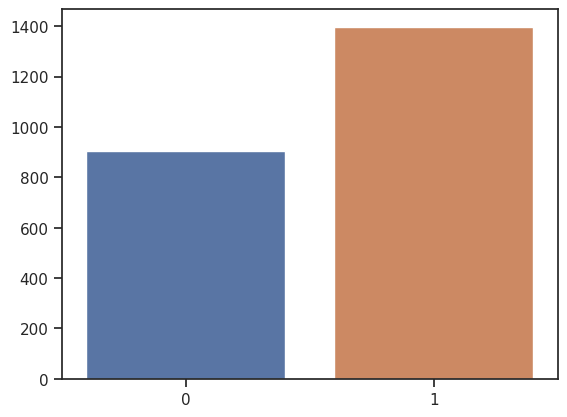

In [924]:
sns.barplot(x=df['Retained.in.2012.'].value_counts().index, y=df['Retained.in.2012.'].value_counts().values)
plt.show()

In [925]:
df['Retained.in.2012.'].value_counts()

1    1398
0     903
Name: Retained.in.2012., dtype: int64

# **Usar función resample https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html**

In [926]:
from sklearn.utils import resample
#Crear dos diferentes dataframe de una clase mayoritaria y minoritaria
df_majority = df[(df['Retained.in.2012.']==1)]
df_minority = df[(df['Retained.in.2012.']==0)]

# muestreo ascendente de la clase minoritaria
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # muesta con reemplazo
                                 n_samples= 1398, # para que coincida con la clase mayoritaria
                                 random_state=0)   # resultados reproducible

# Combinar la clase mayoritaria con la muestra ascendente de la clase minoritaria
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

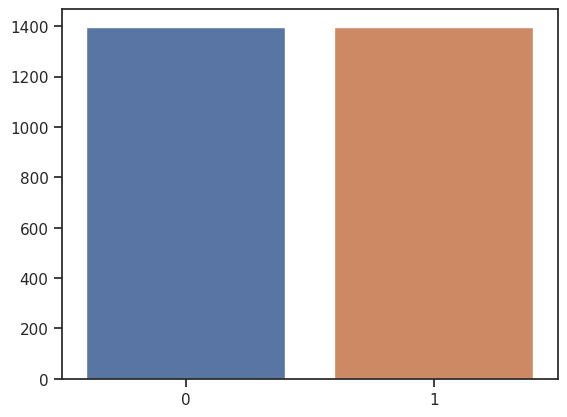

In [927]:
sns.barplot(x=df_upsampled['Retained.in.2012.'].value_counts().index, y=df_upsampled['Retained.in.2012.'].value_counts().values)
plt.show()

In [928]:
df_upsampled.shape

(2796, 56)

# **Eliminar outliers usando IQR**
Detectar outlier es tedioso, especialmente cuando se tienen multiples tipos de datos.

Por lo tanto, tenemos diferentes formas de detectar valores atípicos para diferentes tipos de datos.

En cuanto a los datos distribuidos normalmente, podemos obtener el método Z-Score;

Para skewed data, se usa IQR.

# **IQR es la diferencia entre el cuartil 75th and 25th.**

In [929]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Señale las columnas para remover los outliers
columns_to_check = ['Days', 'Tuition', 'FRP.Active', 'FRP.Cancelled', 'Cancelled.Pax', 'Total.Discount.Pax',
                    'Total.School.Enrollment', 'EZ.Pay.Take.Up.Rate', 'FPP', 'Total.Pax', 'SPR.Group.Revenue',
                    'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting', 'FPP.to.School.enrollment',
                    'FPP.to.PAX', 'Num.of.Non_FPP.PAX']

# Solicitar la función que remueve los outliers usando IQR
df_clean = remove_outliers_iqr(df_upsampled, columns_to_check)

# Mostrar el resultado en el dataframe
df_clean.head()

ID  Program.Code  From.Grade  To.Grade  Group.State  Is.Non.Annual.  \
1828  1829             5         8.0       9.0           42               0   
582    583            14         6.0       8.0            6               0   
1990  1991             5         7.0       8.0            4               0   
1109  1110             5         6.0       6.0           38               0   
81      82             1         7.0       8.0           40               1   

      Days  Travel.Type  Departure.Date  Return.Date  Deposit.Date  \
1828     5            0             118          116            67   
582      3            1              58           55            96   
1990     5            0             123          121            73   
1109     4            1              90           87            57   
81       4            0              26           24            26   

      Special.Pay  Tuition  FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  \
1828            3     2031           3              0                 0.375   
582             2      516           0              0                 0.000   
1990            3     2060           0              3                 0.000   
1109            3      792          27              3                 0.643   
81              1     1324          41              1                 0.774   

      Early.RPL  Latest.RPL  Cancelled.Pax  Total.Discount.Pax  \
1828        112         139              0                   1   
582         182         148              4                   2   
1990        170         136              8                   2   
1109         77         125              4                   2   
81          102         108              3                   5   

      Initial.System.Date  Poverty.Code  Region  CRM.Segment  School.Type  \
1828                  147      1.000000       3         10.0            2   
582                   231      2.000000       3          2.0            2   
1990                  216      1.000000       2          5.0            2   
1109                  106      1.204367       3          4.0            0   
81                     93      1.204367       3         10.0            0   

      Parent.Meeting.Flag  MDR.Low.Grade  MDR.High.Grade  \
1828                    1              7             9.0   
582                     1             11             8.0   
1990                    1             10             8.0   
1109                    1             11             6.0   
81                      1             11             8.0   

      Total.School.Enrollment  Income.Level  EZ.Pay.Take.Up.Rate  \
1828                    558.0            13                0.250   
582                     429.0             3                0.000   
1990                    810.0            19                0.154   
1109                    409.0             8                0.095   
81                      365.0            12                0.245   

      School.Sponsor  SPR.Product.Type  SPR.New.Existing  FPP  Total.Pax  \
1828               0                 2                 0    8          9   
582                0                 2                 1   31         33   
1990               0                 2                 1   13         15   
1109               0                 2                 0   42         44   
81                 0                 2                 0   53         58   

      SPR.Group.Revenue  NumberOfMeetingswithParents  FirstMeeting  \
1828               2031                            1           162   
582                 516                            1           167   
1990               2060                            1           141   
1109                792                            1           134   
81                 1324                            1           105   

      LastMeeting  DifferenceTraveltoFirstMeeting  \
1828          112                           225.0   
582           118      

In [930]:
df_clean.shape

(1411, 56)

# **Correlación mostrando un heatmap**
Seaborn es una biblioteca de python que permite hacer mejores gráficos fácilmente gracias a su función heatmap(). Un mapa de calor es una representación gráfica de datos donde cada valor de una matriz se representa como un color.

https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: >

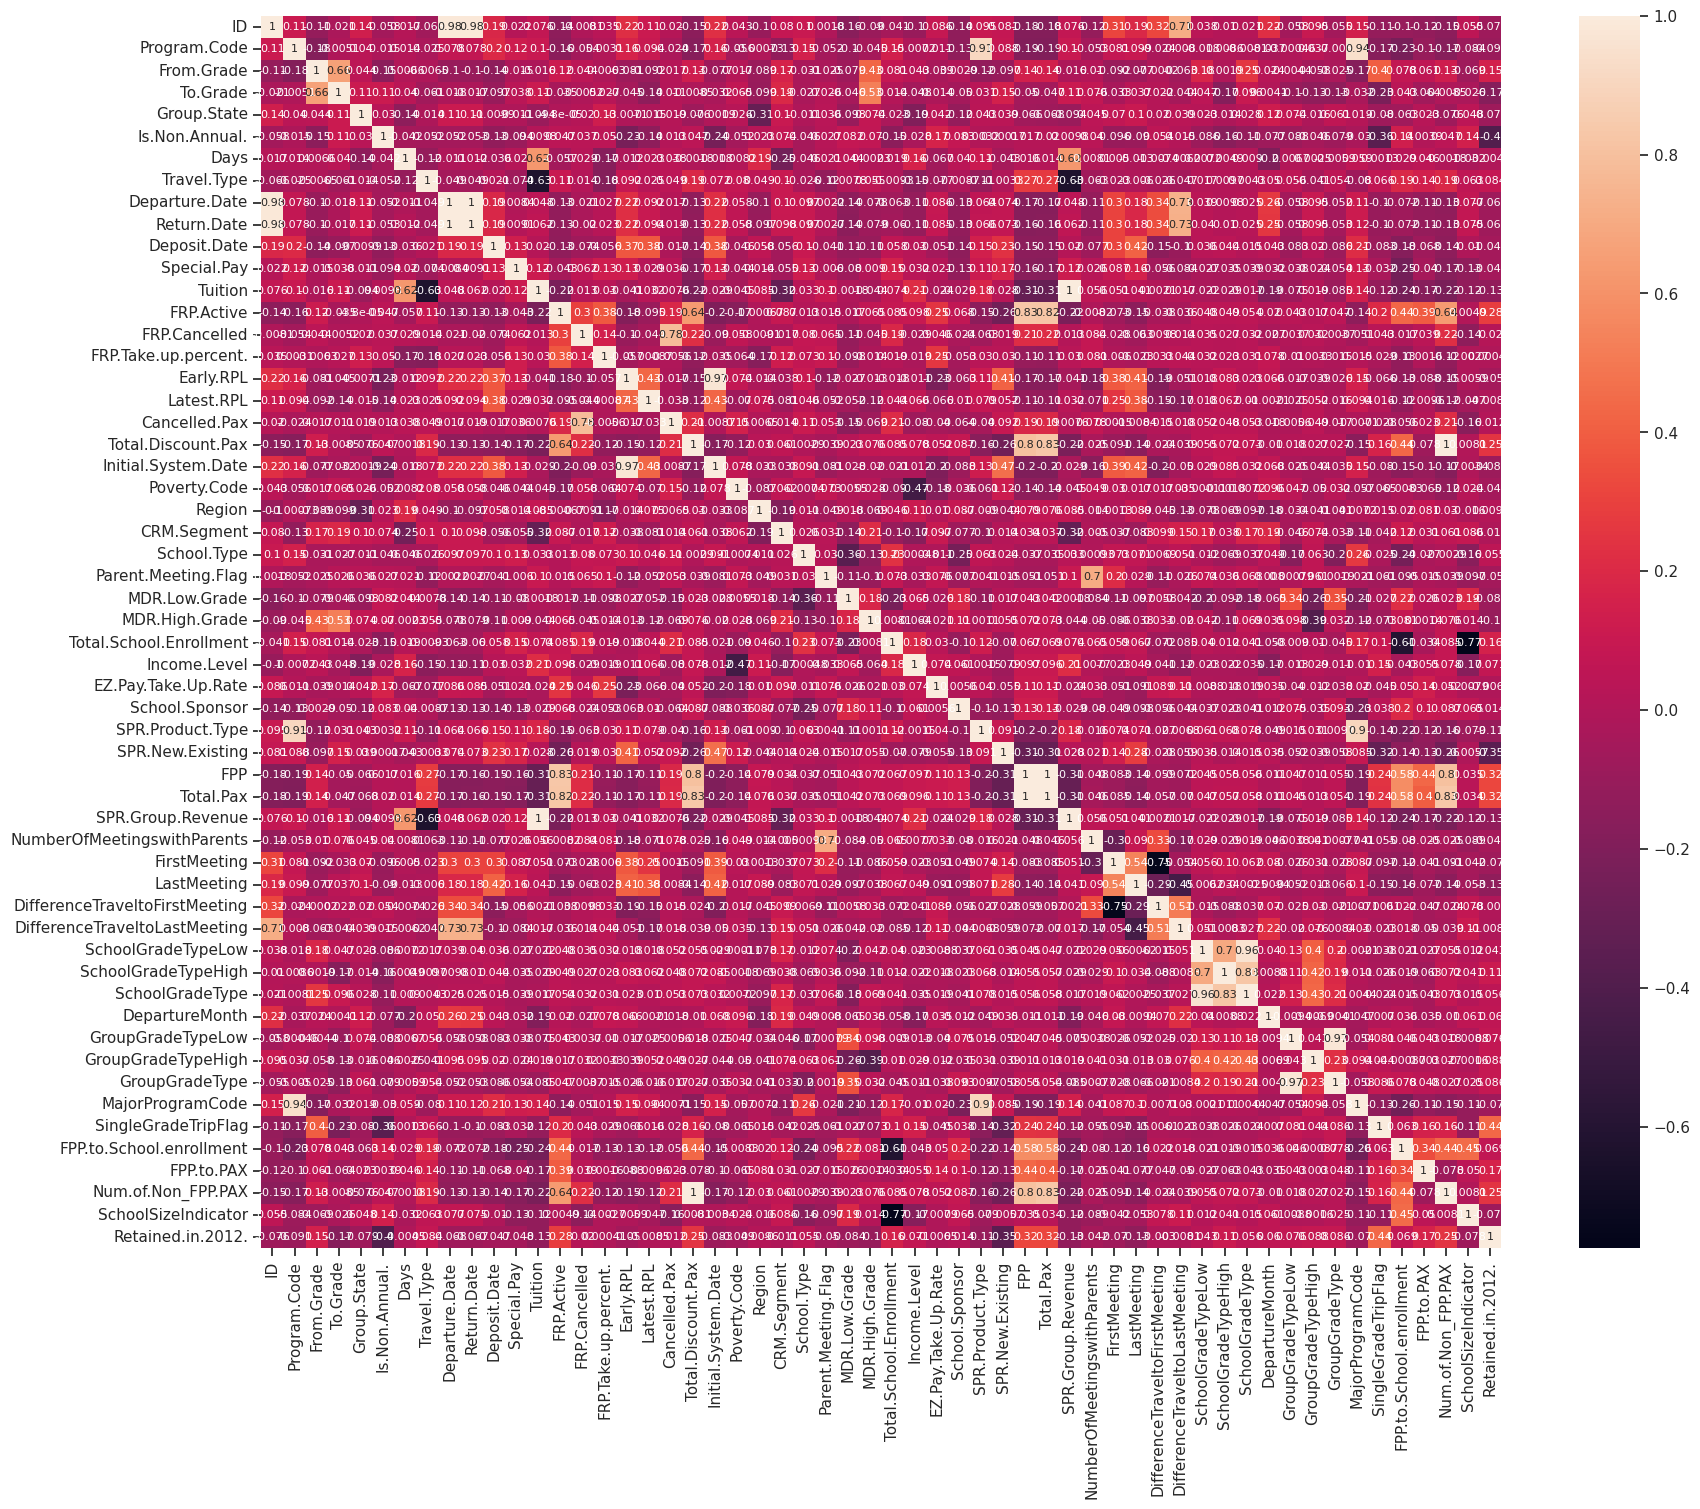

In [931]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_clean.corr(), fmt='.2g', annot=True, annot_kws={"fontsize": 8})

# **Definiendo vector de características (X) y variable target (y)**

Aquí decidimos no eliminar outliers ya que nos disminuía a 75& de accuracy, y con todos los datos llegamos a 79, por eso no usamos la clean, sino la df_unsampled.

In [932]:
X = df_upsampled.drop('Retained.in.2012.', axis=1)
y = df_upsampled['Retained.in.2012.']

# **Dividir arrais o matrices en subconjuntos aleatorios de entrenamiento y prueba.**
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Para ser precisos, el método split() genera los índices de entrenamiento y prueba, no los datos en si mismos.

Tener múltiples divisiones puede ser útil si desea estimar mejor el rendimiento de su modelo.

In [933]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

# **Instanciar el modelo (Decision tree)**
Instanciamos el modelo con criterio gini index

In [934]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [935]:
#Hacemos predicción con CLF Gini
y_pred_gini = clf_gini.predict(X_test)

In [936]:
#Estimamos precisión
print('Precisión en el set de Entrenamiento: {:.4f}'
     .format(clf_gini.score(X_train, y_train)))
print('Precisión en el set de Test: {:.4f}'
     .format(clf_gini.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.7895
Precisión en el set de Test: 0.7723


# **Metricas de desempeño**
Accurracy score con criterio Gini Index

In [937]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred_gini, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_gini, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_gini, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred_gini, average='micro')))

F-1 Score :  0.7723480333730631
Precision Score :  0.7723480333730631
Recall Score :  0.7723480333730631
Jaccard Score :  0.629126213592233


In [938]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76       444
           1       0.71      0.87      0.78       395

    accuracy                           0.77       839
   macro avg       0.78      0.78      0.77       839
weighted avg       0.79      0.77      0.77       839



<Figure size 900x900 with 0 Axes>

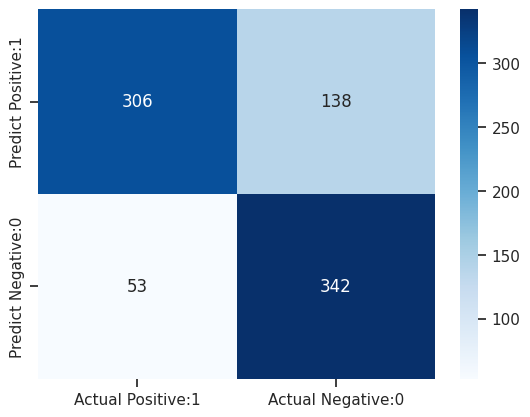

<Figure size 900x900 with 0 Axes>

In [939]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gini)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

# **Visualización del árbol**

[Text(0.5, 0.875, 'x[50] <= 0.5\ngini = 0.5\nsamples = 1957\nvalue = [954, 1003]'),
 Text(0.25, 0.625, 'x[5] <= 0.5\ngini = 0.399\nsamples = 948\nvalue = [687, 261]'),
 Text(0.125, 0.375, 'x[33] <= 0.5\ngini = 0.467\nsamples = 634\nvalue = [399, 235]'),
 Text(0.0625, 0.125, 'gini = 0.455\nsamples = 240\nvalue = [84, 156]'),
 Text(0.1875, 0.125, 'gini = 0.321\nsamples = 394\nvalue = [315, 79]'),
 Text(0.375, 0.375, 'x[20] <= 234.5\ngini = 0.152\nsamples = 314\nvalue = [288, 26]'),
 Text(0.3125, 0.125, 'gini = 0.137\nsamples = 311\nvalue = [288, 23]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.625, 'x[35] <= 25.5\ngini = 0.389\nsamples = 1009\nvalue = [267, 742]'),
 Text(0.625, 0.375, 'x[42] <= 1.5\ngini = 0.489\nsamples = 410\nvalue = [175, 235]'),
 Text(0.5625, 0.125, 'gini = 0.422\nsamples = 66\nvalue = [46, 20]'),
 Text(0.6875, 0.125, 'gini = 0.469\nsamples = 344\nvalue = [129, 215]'),
 Text(0.875, 0.375, 'x[5] <= 0.5\ngini = 0.26\nsamples = 599\n

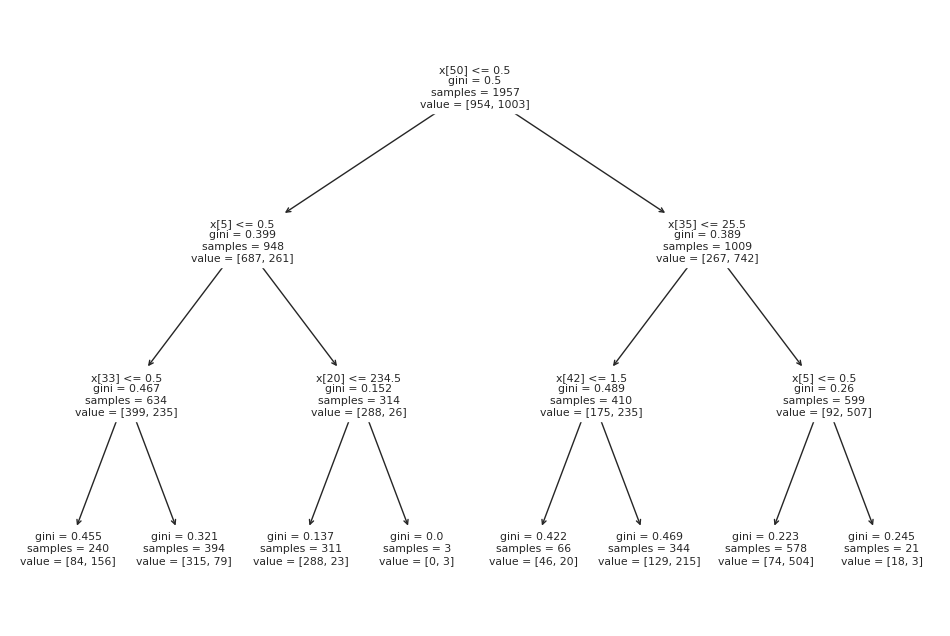

In [940]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Visualizar el árbol con graphviz**

In [941]:
#Instalar Graphviz en Python pip install graphviz
import graphviz
import pydotplus
%matplotlib inline

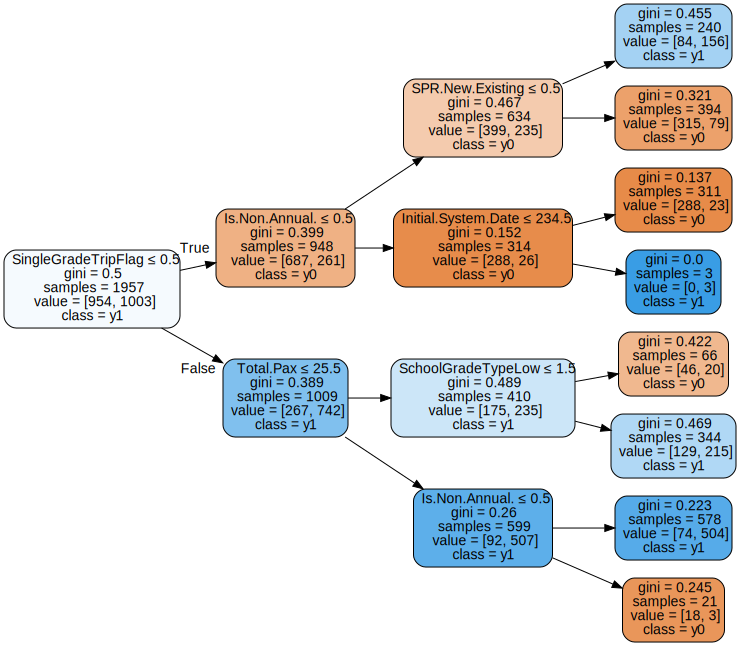

In [942]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, max_depth=None,
                                feature_names=X_train.columns,
                                class_names=True,
                                filled=True, rotate=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

# **Instanciamos el modelo con criterio gini entropy**

In [943]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# **Predecir con test set para el criterio entropy**

In [944]:
y_pred_en = clf_en.predict(X_test)

In [945]:
print('Precisión en el set de Entrenamiento: {:.4f}'
     .format(clf_en.score(X_train, y_train)))
print('Precisión en el set de Test: {:.4f}'
     .format(clf_en.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.7879
Precisión en el set de Test: 0.7723


#**Metricas de desempeño**
Accuracy score con criterio Entropy

In [946]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred_en, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_en, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_en, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred_en, average='micro')))

F-1 Score :  0.7723480333730631
Precision Score :  0.7723480333730631
Recall Score :  0.7723480333730631
Jaccard Score :  0.629126213592233


In [947]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76       444
           1       0.71      0.87      0.78       395

    accuracy                           0.77       839
   macro avg       0.78      0.78      0.77       839
weighted avg       0.79      0.77      0.77       839



<Figure size 900x900 with 0 Axes>

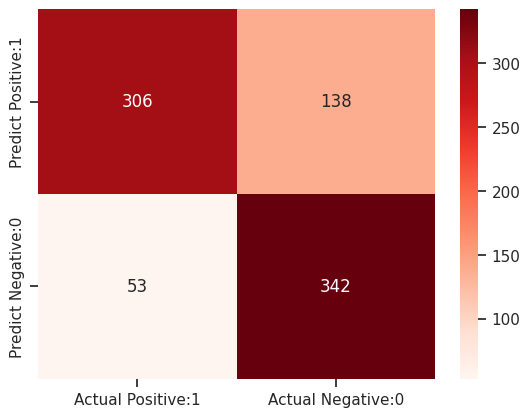

<Figure size 900x900 with 0 Axes>

In [948]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

[Text(0.5, 0.875, 'x[50] <= 0.5\nentropy = 1.0\nsamples = 1957\nvalue = [954, 1003]'),
 Text(0.25, 0.625, 'x[5] <= 0.5\nentropy = 0.849\nsamples = 948\nvalue = [687, 261]'),
 Text(0.125, 0.375, 'x[33] <= 0.5\nentropy = 0.951\nsamples = 634\nvalue = [399, 235]'),
 Text(0.0625, 0.125, 'entropy = 0.934\nsamples = 240\nvalue = [84, 156]'),
 Text(0.1875, 0.125, 'entropy = 0.723\nsamples = 394\nvalue = [315, 79]'),
 Text(0.375, 0.375, 'x[15] <= 0.481\nentropy = 0.412\nsamples = 314\nvalue = [288, 26]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 83\nvalue = [83, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.508\nsamples = 231\nvalue = [205, 26]'),
 Text(0.75, 0.625, 'x[35] <= 25.5\nentropy = 0.834\nsamples = 1009\nvalue = [267, 742]'),
 Text(0.625, 0.375, 'x[42] <= 1.5\nentropy = 0.984\nsamples = 410\nvalue = [175, 235]'),
 Text(0.5625, 0.125, 'entropy = 0.885\nsamples = 66\nvalue = [46, 20]'),
 Text(0.6875, 0.125, 'entropy = 0.954\nsamples = 344\nvalue = [129, 215]'),
 Text(0.875, 0.375, 'x[5

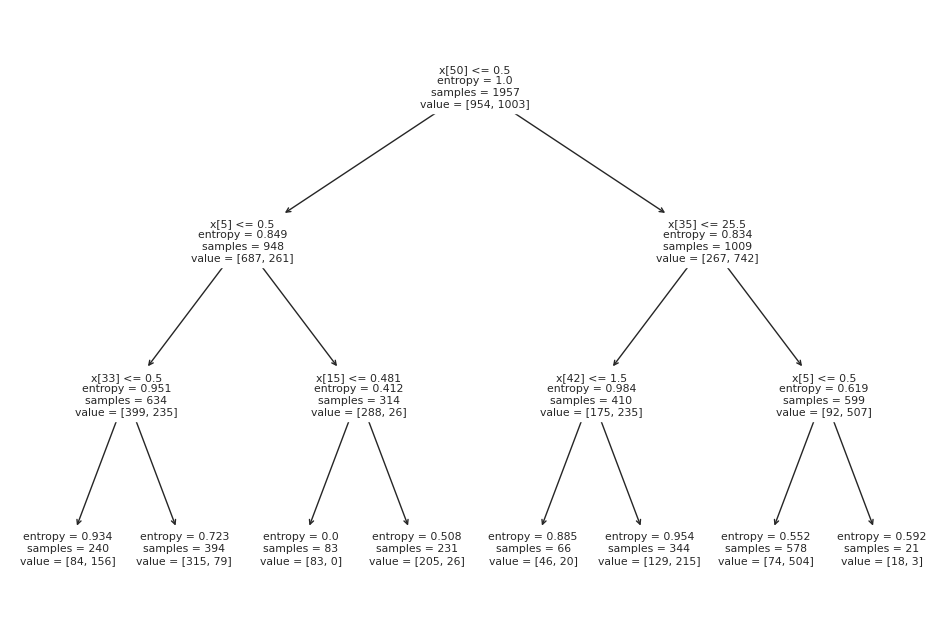

In [949]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

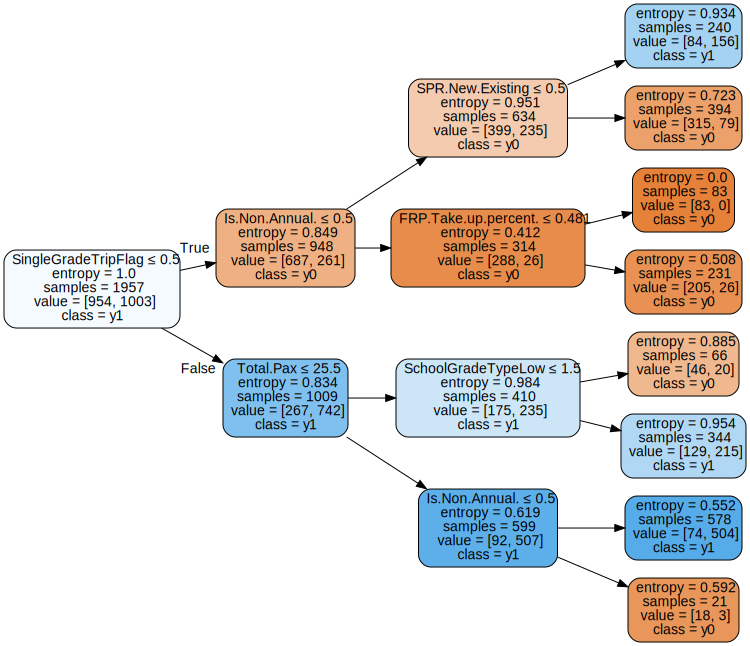

In [950]:
dot_data = tree.export_graphviz(clf_en, out_file=None, max_depth=None,
                                feature_names=X_train.columns,
                                class_names=True,
                                filled=True, rotate=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

# **El modelo funciona bien tanto con el criterio Gini como Entropy, pero predice mejor con Gini.**

# **Detectar importancia de las variables**:

---



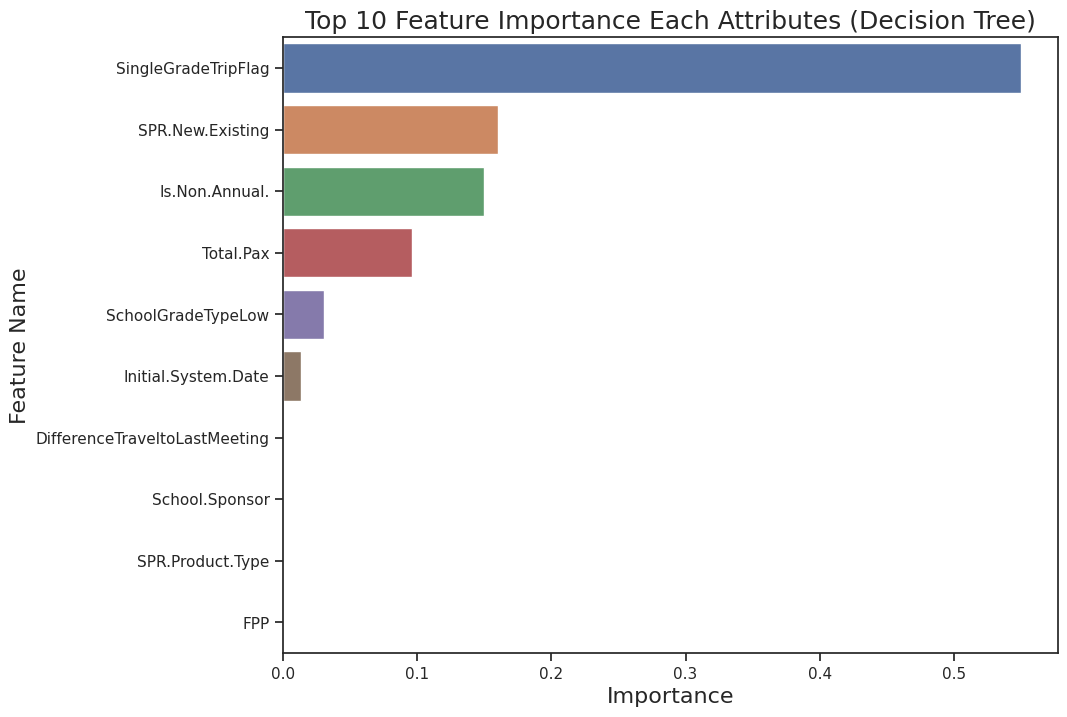

In [951]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": clf_gini.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [952]:
!pip install shap

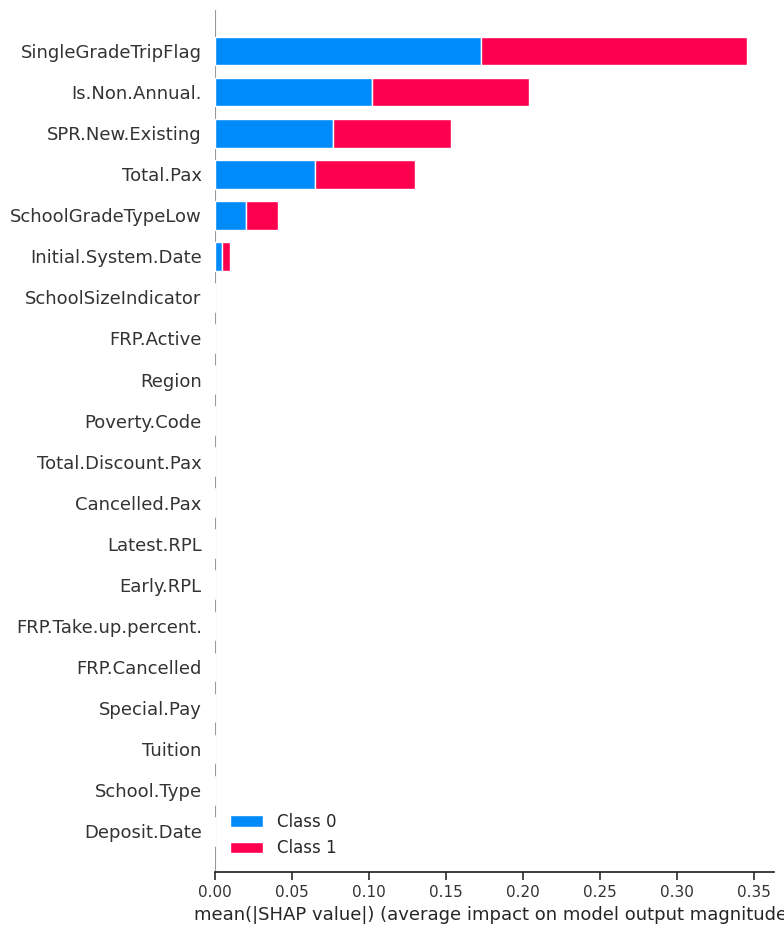

In [953]:
import shap
explainer = shap.TreeExplainer(clf_gini)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [954]:
#Checamos con el siguiente código que estas sean las mejores características:
from sklearn.feature_selection import SelectKBest
best=SelectKBest(k=6)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Is.Non.Annual.', 'FRP.Active', 'SPR.New.Existing', 'FPP', 'Total.Pax',
       'SingleGradeTripFlag'],
      dtype='object')


Observamos que este código casí nos trae las mismas variables que el decision tree

# **Creamos un nueva base de datos para testear con las variables principales que nos arrojó Random Forest**

In [955]:
selected_columnsDT = ['SingleGradeTripFlag', 'Is.Non.Annual.', 'SPR.New.Existing', 'Total.Pax', 'SchoolGradeTypeLow', 'Initial.System.Date','Retained.in.2012.']
df_selected_DecitionTree = df_upsampled[selected_columnsDT]
df_selected_DecitionTree.head()

SingleGradeTripFlag  Is.Non.Annual.  SPR.New.Existing  Total.Pax  \
1937                    1               0                 0         31   
1685                    1               0                 0         33   
1828                    0               0                 0          9   
582                     0               0                 1         33   
2271                    0               0                 1          4   

      SchoolGradeTypeLow  Initial.System.Date  Retained.in.2012.  
1937                   0                  156                  0  
1685                   2                  135                  0  
1828                   2                  147                  0  
582                    2                  231                  0  
2271                   0                  116                  0

In [956]:
df_selected_DecitionTree['Retained.in.2012.'].value_counts()

0    1398
1    1398
Name: Retained.in.2012., dtype: int64

In [957]:
Xdt = df_selected_DecitionTree.drop('Retained.in.2012.', axis=1)
ydt = df_selected_DecitionTree['Retained.in.2012.']

In [958]:
Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(Xdt,ydt, test_size=0.3,random_state=0)



---



# **RANDOM FOREST**
# **Instanciar el modelo**

In [959]:
from sklearn.ensemble import RandomForestClassifier

In [960]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

# **Función predicción Test set**

In [961]:
y_pred = rfc.predict(X_test)

In [962]:
#Verificamos precisión del modelo
print('Precisión en el set de Entrenamiento: {:.4f}'
     .format(rfc.score(X_train, y_train)))
print('Precisión en el set de Test: {:.4f}'
     .format(rfc.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 1.0000
Precisión en el set de Test: 0.8641


In [963]:
print('F-1 Score : ',(f1_score(y_test, y_pred_100, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_100, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_100, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred_100, average='micro')))

F-1 Score :  0.8641239570917759
Precision Score :  0.8641239570917759
Recall Score :  0.8641239570917759
Jaccard Score :  0.7607555089192025


# **Modelo Random Forest con n_estimators = 100**

In [964]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# Se fija el modelo al training set

rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [965]:
#Prediccoón con test set
y_pred_100 = rfc_100.predict(X_test)

In [966]:
#Verificamos precisión del modelo
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8641


In [967]:
#Verificamos precisión del modelo
print('Precisión en el set de Entrenamiento: {:.4f}'
     .format(rfc_100.score(X_train, y_train)))
print('Precisión en el set de Test: {:.4f}'
     .format(rfc_100.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 1.0000
Precisión en el set de Test: 0.8641


In [968]:
print('F-1 Score : ',(f1_score(y_test, y_pred_100, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_100, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_100, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred_100, average='micro')))

F-1 Score :  0.8641239570917759
Precision Score :  0.8641239570917759
Recall Score :  0.8641239570917759
Jaccard Score :  0.7607555089192025


# **Encontrar las características importantes para el modelo Random Forest**

In [969]:
# Se crea un clasificador con n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)


# Se ajusta el modelo al training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [970]:
#Score más importantes de las características del modelo
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Is.Non.Annual.                    0.077028
SingleGradeTripFlag               0.063624
SPR.New.Existing                  0.055073
From.Grade                        0.037531
Total.Pax                         0.034761
FRP.Active                        0.033980
FPP                               0.033435
Total.School.Enrollment           0.033210
Initial.System.Date               0.031038
FPP.to.School.enrollment          0.029553
Early.RPL                         0.026731
ID                                0.026243
Tuition                           0.023221
FRP.Take.up.percent.              0.022550
FirstMeeting                      0.022300
Latest.RPL                        0.022085
FPP.to.PAX                        0.021923
SPR.Group.Revenue                 0.021811
LastMeeting                       0.021387
DifferenceTraveltoFirstMeeting    0.020801
Return.Date                       0.020166
Departure.Date                    0.019688
DifferenceTraveltoLastMeeting     0.019386
EZ.Pay.Take

**La característica más importante es Is.Non.Annual., y las de menor importancia con diferencia son MajorProgramCode, Travel.Type, Parent.Meeting.flag**


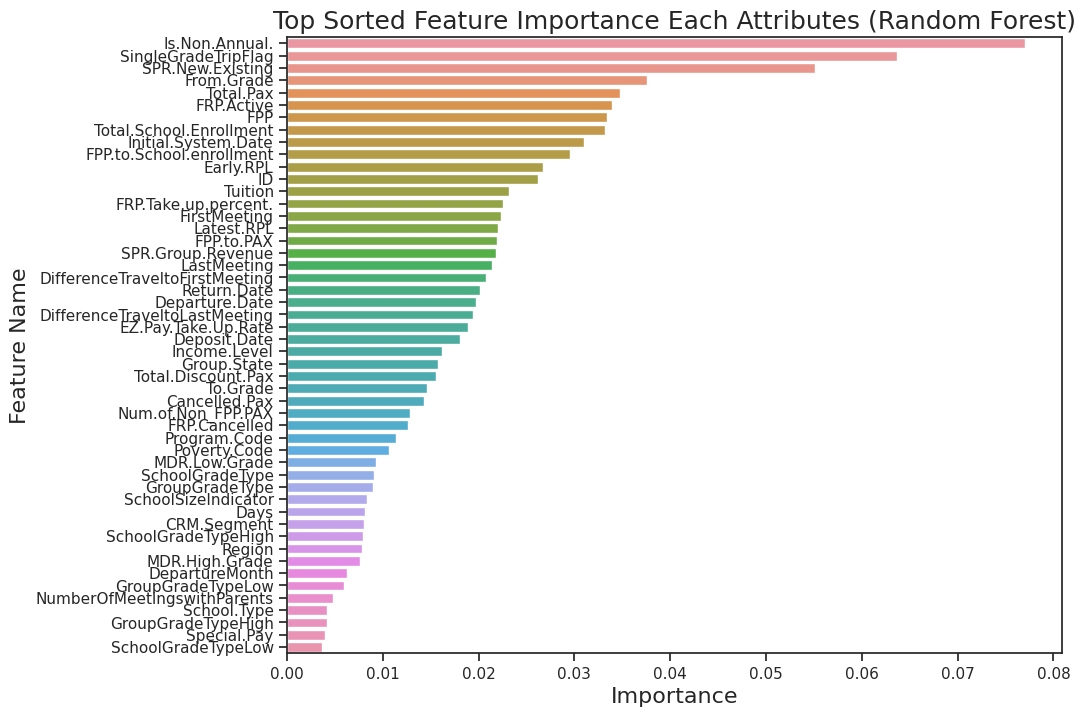

In [971]:
imp_df2 = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": clf.feature_importances_
})
fi3 = imp_df2.sort_values(by="Importance", ascending=False)

fi4 = fi3.head(50)
plt.figure(figsize=(10,8))
sns.barplot(data=fi4, x='Importance', y='Feature Name')
plt.title('Top Sorted Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

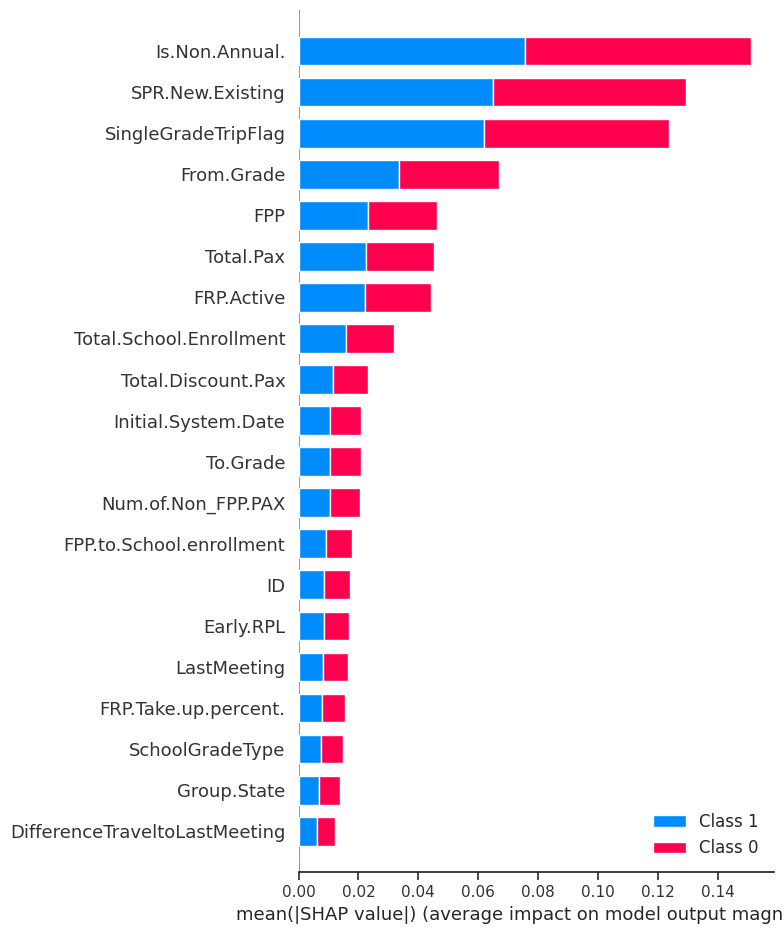

In [972]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# **Creamos un nueva base de datos para testear con las variables principales que nos arrojó Random Forest**

In [973]:
selected_columnsRF = ['Is.Non.Annual.', 'SingleGradeTripFlag', 'SPR.New.Existing', 'Total.Pax', 'From.Grade', 'FRP.Active', 'FPP', 'Total.School.Enrollment', 'Initial.System.Date', 'Num.of.Non_FPP.PAX','Retained.in.2012.']
df_selected_RandomForest = df_upsampled[selected_columnsRF]
df_selected_RandomForest.head()

Is.Non.Annual.  SingleGradeTripFlag  SPR.New.Existing  Total.Pax  \
1937               0                    1                 0         31   
1685               0                    1                 0         33   
1828               0                    0                 0          9   
582                0                    0                 1         33   
2271               0                    0                 1          4   

      From.Grade  FRP.Active  FPP  Total.School.Enrollment  \
1937         4.0           3   30                    446.0   
1685         8.0          21   31                    668.0   
1828         8.0           3    8                    558.0   
582          6.0           0   31                    429.0   
2271         4.0           1    3                    270.0   

      Initial.System.Date  Num.of.Non_FPP.PAX  Retained.in.2012.  
1937                  156                   1                  0  
1685                  135                   2                  0  
1828                  147                   1                  0  
582                   231                   2                  0  
2271                  116                   1                  0

In [974]:
df_selected_RandomForest['Retained.in.2012.'].value_counts()

0    1398
1    1398
Name: Retained.in.2012., dtype: int64

In [975]:
Xrf = df_selected_RandomForest.drop('Retained.in.2012.', axis=1)
yrf = df_selected_RandomForest['Retained.in.2012.']

In [976]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xrf,yrf, test_size=0.3,random_state=0)



---



# **Algoritmo de ensamble (Boosting) XGBoost**
Boosting es un enfoque de Machine Learning basado en la idea de crear una regla de predicción altamente precisa combinando muchas reglas relativamente débiles e imprecisas.
El Boosting asume la disponibilidad de un algoritmo de aprendizaje base o débil que, dado ejemplos de entrenamiento etiquetados, produce un clasificador base o débil.
La idea fundamental detrás de Boosting es elegir conjuntos de entrenamiento para el algoritmo de aprendizaje base de tal manera que lo obligue a inferir algo nuevo sobre los datos cada vez que se lo ejecute.

In [977]:
!pip install xgboost

In [978]:
from xgboost import XGBClassifier

In [979]:
#n_estimators=100 specifies how many times to go through the modeling cycle described above.
# You can experiment with your dataset to find the ideal. Typical values range from 100-1000,
# though this depends a lot on the learning rate discussed below.
#learning_rate parameter can be set to control the weighting of new trees added to the model.

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.001)

In [980]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [981]:
y_pred = xgb.predict(X_test)

In [982]:
print('Precisión en el set de Entrenamiento: {:.3f}'
     .format(xgb.score(X_train, y_train)))
print('Precisión en el set de Test: {:.3f}'
     .format(xgb.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.887
Precisión en el set de Test: 0.819


In [983]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.8188319427890346
Precision Score :  0.8188319427890346
Recall Score :  0.8188319427890346
Jaccard Score :  0.693239152371342


In [984]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       444
           1       0.79      0.84      0.81       395

    accuracy                           0.82       839
   macro avg       0.82      0.82      0.82       839
weighted avg       0.82      0.82      0.82       839



<Figure size 900x900 with 0 Axes>

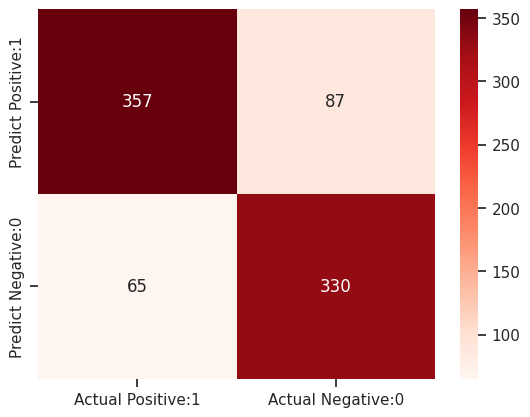

<Figure size 900x900 with 0 Axes>

In [985]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

In [986]:
#Score más importantes de las características del modelo
feature_scores = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

SingleGradeTripFlag               0.365263
SPR.New.Existing                  0.066928
Total.Pax                         0.054771
Is.Non.Annual.                    0.047469
Total.Discount.Pax                0.030419
FPP                               0.026993
SchoolGradeTypeLow                0.021283
FPP.to.School.enrollment          0.014156
SchoolGradeTypeHigh               0.014118
Deposit.Date                      0.013678
Group.State                       0.013621
FRP.Active                        0.013406
LastMeeting                       0.012790
MDR.High.Grade                    0.012625
EZ.Pay.Take.Up.Rate               0.012238
To.Grade                          0.012130
Initial.System.Date               0.012063
Return.Date                       0.011586
ID                                0.011398
FRP.Take.up.percent.              0.011273
GroupGradeTypeHigh                0.010834
DifferenceTraveltoFirstMeeting    0.010693
FirstMeeting                      0.010261
GroupGradeT

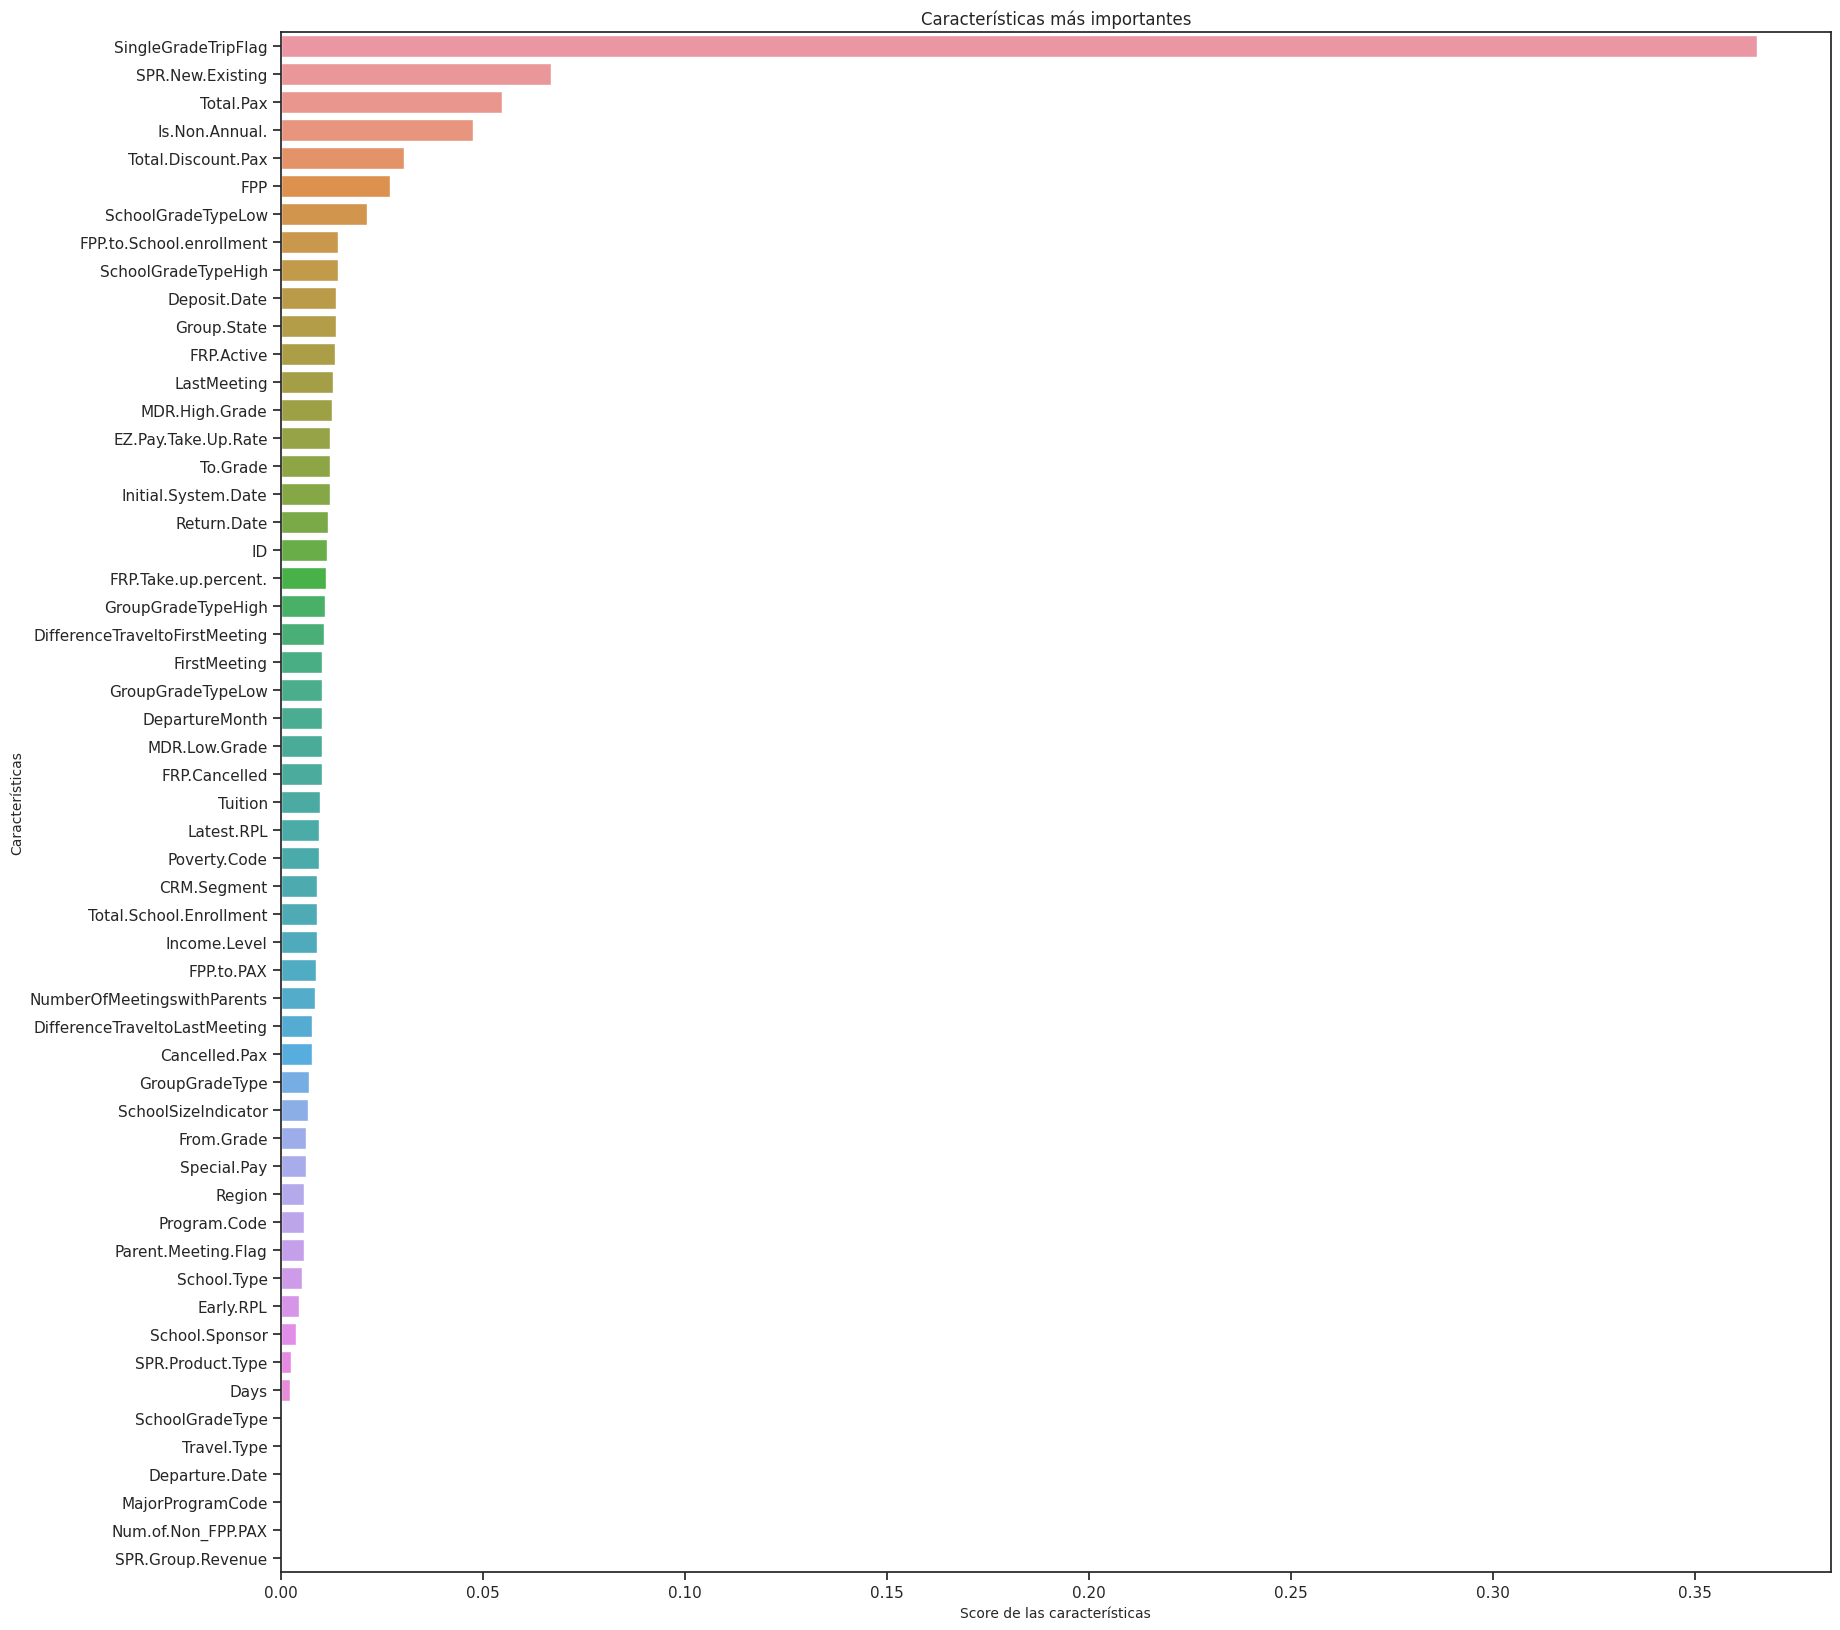

In [987]:
plt.figure(figsize=(20, 20))  # Ajusta el tamaño de la gráfica
sns.barplot(x=feature_scores, y=feature_scores.index)

# Agregamos etiquetas al gráfico

plt.xlabel('Score de las características', fontsize=10)

plt.ylabel('Características', fontsize=10)

# Agregamos título al gráfico

plt.title("Características más importantes", fontsize=12)

plt.show()



---



# **SUPPORT VECTOR CLASSIFIER (SVC)**
**Instanciar el Modelo**

In [988]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [989]:
svc = SVC(C=1000, gamma=0.0001, probability=True)
svc.fit(X_train, y_train)

SVC(C=1000, gamma=0.0001, probability=True)

In [990]:
ysvc_pred = svc.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(svc.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(svc.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 1.00
Precisión en el set de Test: 0.80


In [991]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, ysvc_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, ysvc_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, ysvc_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, ysvc_pred, average='micro')))

F-1 Score :  0.7973778307508939
Precision Score :  0.797377830750894
Recall Score :  0.797377830750894
Jaccard Score :  0.6630327056491576


In [992]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, ysvc_pred))

              precision    recall  f1-score   support

           0       0.89      0.70      0.79       444
           1       0.73      0.90      0.81       395

    accuracy                           0.80       839
   macro avg       0.81      0.80      0.80       839
weighted avg       0.81      0.80      0.80       839



Para evitar hacer el C grid search, lo haremos al azar rápidamente...
'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},


gamma = 1
&
C = 0.1
Precisión en el set de Entrenamiento: 0.51
Precisión en el set de Test: 0.47
C=10,100,1000
Precisión en el set de Entrenamiento: 1.00
Precisión en el set de Test: 0.81


gamma = 0.1
C = 0.1
Precisión en el set de Entrenamiento: 0.51
Precisión en el set de Test: 0.47
C=10,100,1000
Precisión en el set de Entrenamiento: 1.00
Precisión en el set de Test: 0.81

gamma = 0.01
C = 0.1
Precisión en el set de Entrenamiento: 0.51
Precisión en el set de Test: 0.47
C=10,100,1000
Precisión en el set de Entrenamiento: 1.00
Precisión en el set de Test: 0.81

gamma = 0.001
C = 0.1
Precisión en el set de Entrenamiento: 0.51
Precisión en el set de Test: 0.47
C=10,100,1000
Precisión en el set de Entrenamiento: 1.00
Precisión en el set de Test: 0.81

gamma = 0.0001
C = 0.1
Precisión en el set de Entrenamiento: 0.52
Precisión en el set de Test: 0.47
C=10
Precisión en el set de Entrenamiento: 1.00
Precisión en el set de Test: 0.75
C=100,1000
Precisión en el set de Entrenamiento: 1.00
Precisión en el set de Test: 0.75


In [993]:
#Hacemos nuevamente SVM utilizando Base de datos con variables de Random Forest
svc2 = SVC(C=1, gamma=1, probability=True)
svc2.fit(Xrf_train, yrf_train)


SVC(C=1, gamma=1, probability=True)

In [994]:
ysvc_pred2 = svc2.predict(Xrf_test)

print('Precisión en el set de Entrenamiento: {:.4f}'
     .format(svc2.score(Xrf_train, yrf_train)))
print('Precisión en el set de Test: {:.4f}'
     .format(svc2.score(Xrf_test, yrf_test)))

Precisión en el set de Entrenamiento: 1.0000
Precisión en el set de Test: 0.8105


In [995]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, ysvc_pred2, average='micro')))
print('Precision Score : ',(precision_score(y_test, ysvc_pred2, average='micro')))
print('Recall Score : ',(recall_score(y_test, ysvc_pred2, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, ysvc_pred2, average='micro')))

F-1 Score :  0.8104886769964244
Precision Score :  0.8104886769964244
Recall Score :  0.8104886769964244
Jaccard Score :  0.6813627254509018


In [996]:
#Hacemos nuevamente SVM utilizando Base de datos con variables de Random Forest
svc3 = SVC(C=1, gamma=1, probability=True)
svc3.fit(Xdt_train, ydt_train)

SVC(C=1, gamma=1, probability=True)

In [997]:
ysvc_pred3 = svc3.predict(Xdt_test)

print('Precisión en el set de Entrenamiento: {:.3f}'
     .format(svc3.score(Xdt_train, ydt_train)))
print('Precisión en el set de Test: {:.3f}'
     .format(svc3.score(Xdt_test, ydt_test)))

Precisión en el set de Entrenamiento: 0.998
Precisión en el set de Test: 0.801


# **Se rechaza el modelo SVC,** ya que alcanzar una precisión del 100% en el conjunto de entrenamiento también puede indicar un posible sobreajuste (overfitting). El sobreajuste ocurre cuando el modelo se adapta demasiado a los datos de entrenamiento y no puede generalizar bien a nuevos datos.

# **Se utilizó la base de datos completa, así como la base de datos con las variables principales que indica Decition Tree y también con la base de datos que nos indicó Random Forest y en todas quedó con overfitting.**



---




# **KNeighborsClassifier**

**USANDO BASE DE DATOS COMPLETA**

In [998]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=2,algorithm='auto',metric='euclidean',weights='uniform')

#Recuerden: Si quiseramos seleccionar una métrica particular para calcular las distancias incluiriamos todo lo que se observa  más alla de señalar el número de K. En caso contrario dejamos el scrit hasta el tamaño de K.

knn2.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [999]:
y_predknn2 = knn2.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(knn2.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(knn2.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.85
Precisión en el set de Test: 0.71


In [1000]:
knn3 = KNeighborsClassifier(n_neighbors=3,algorithm='auto',metric='euclidean',weights='uniform')

#Recuerden: Si quiseramos seleccionar una métrica particular para calcular las distancias incluiriamos todo lo que se observa  más alla de señalar el número de K. En caso contrario dejamos el scrit hasta el tamaño de K.

knn3.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [1001]:
y_predknn3 = knn3.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(knn3.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(knn3.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.85
Precisión en el set de Test: 0.68


In [1002]:
knn4 = KNeighborsClassifier(n_neighbors=4,algorithm='auto',metric='euclidean',weights='uniform')

#Recuerden: Si quiseramos seleccionar una métrica particular para calcular las distancias incluiriamos todo lo que se observa  más alla de señalar el número de K. En caso contrario dejamos el scrit hasta el tamaño de K.

knn4.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [1003]:
y_predknn4 = knn4.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(knn4.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(knn4.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.78
Precisión en el set de Test: 0.65


CON LA BASE DE DATOS COMPLETA, LO MEJOR QUE CONSEGUIMOS FUE DE 69% DE ACCURACY

**AHORA USAMOS LA BASE DE DATOS CON LAS VARIABLES DE RANDOM FOREST**

In [1004]:
knn2rf = KNeighborsClassifier(n_neighbors=2,algorithm='auto',metric='euclidean',weights='uniform')

#Recuerden: Si quiseramos seleccionar una métrica particular para calcular las distancias incluiriamos todo lo que se observa  más alla de señalar el número de K. En caso contrario dejamos el scrit hasta el tamaño de K.

knn2rf.fit(Xrf_train, yrf_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [1005]:
y_predknn2rf = knn2rf.predict(Xrf_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(knn2rf.score(Xrf_train, yrf_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(knn2rf.score(Xrf_test, yrf_test)))

Precisión en el set de Entrenamiento: 0.84
Precisión en el set de Test: 0.71


In [1006]:
knn3rf = KNeighborsClassifier(n_neighbors=3,algorithm='auto',metric='euclidean',weights='uniform')

#Recuerden: Si quiseramos seleccionar una métrica particular para calcular las distancias incluiriamos todo lo que se observa  más alla de señalar el número de K. En caso contrario dejamos el scrit hasta el tamaño de K.

knn3rf.fit(Xrf_train, yrf_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [1007]:
y_predknn3rf = knn3rf.predict(Xrf_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(knn3rf.score(Xrf_train, yrf_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(knn3rf.score(Xrf_test, yrf_test)))

Precisión en el set de Entrenamiento: 0.84
Precisión en el set de Test: 0.70


In [1008]:
knn4rf = KNeighborsClassifier(n_neighbors=4,algorithm='auto',metric='euclidean',weights='uniform')

#Recuerden: Si quiseramos seleccionar una métrica particular para calcular las distancias incluiriamos todo lo que se observa  más alla de señalar el número de K. En caso contrario dejamos el scrit hasta el tamaño de K.

knn4rf.fit(Xrf_train, yrf_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [1009]:
y_predknn4rf = knn4rf.predict(Xrf_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(knn4rf.score(Xrf_train, yrf_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(knn4rf.score(Xrf_test, yrf_test)))

Precisión en el set de Entrenamiento: 0.78
Precisión en el set de Test: 0.69


CON LA BASE DE DATOS RANDOM FOREST, LO MEJOR QUE CONSEGUIMOS FUE DE 71% DE ACCURACY

**AHORA USAMOS LA BASE DE DATOS CON LAS VARIABLES DE DECISION TREE**

In [1010]:
knn2dt = KNeighborsClassifier(n_neighbors=2,algorithm='auto',metric='euclidean',weights='uniform')

#Recuerden: Si quiseramos seleccionar una métrica particular para calcular las distancias incluiriamos todo lo que se observa  más alla de señalar el número de K. En caso contrario dejamos el scrit hasta el tamaño de K.

knn2dt.fit(Xdt_train, ydt_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [1011]:
y_predknn2dt = knn2dt.predict(Xdt_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(knn2dt.score(Xdt_train, ydt_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(knn2dt.score(Xdt_test, ydt_test)))

Precisión en el set de Entrenamiento: 0.86
Precisión en el set de Test: 0.72


In [1012]:
knn3dt = KNeighborsClassifier(n_neighbors=3,algorithm='auto',metric='euclidean',weights='uniform')

#Recuerden: Si quiseramos seleccionar una métrica particular para calcular las distancias incluiriamos todo lo que se observa  más alla de señalar el número de K. En caso contrario dejamos el scrit hasta el tamaño de K.

knn3dt.fit(Xdt_train, ydt_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [1013]:
y_predknn3dt = knn3dt.predict(Xdt_test)

print('Precisión en el set de Entrenamiento: {:.4f}'
     .format(knn3dt.score(Xdt_train, ydt_train)))
print('Precisión en el set de Test: {:.4f}'
     .format(knn3dt.score(Xdt_test, ydt_test)))

Precisión en el set de Entrenamiento: 0.8559
Precisión en el set de Test: 0.7175


In [1014]:
knn4dt = KNeighborsClassifier(n_neighbors=4,algorithm='auto',metric='euclidean',weights='uniform')

#Recuerden: Si quiseramos seleccionar una métrica particular para calcular las distancias incluiriamos todo lo que se observa  más alla de señalar el número de K. En caso contrario dejamos el scrit hasta el tamaño de K.

knn4dt.fit(Xdt_train, ydt_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [1015]:
y_predknn4dt = knn4dt.predict(Xdt_test)

print('Precisión en el set de Entrenamiento: {:.4f}'
     .format(knn4dt.score(Xdt_train, ydt_train)))
print('Precisión en el set de Test: {:.4f}'
     .format(knn4dt.score(Xdt_test, ydt_test)))

Precisión en el set de Entrenamiento: 0.7997
Precisión en el set de Test: 0.6841


CON LA BASE DE DATOS DECITION TREE, LO MEJOR QUE CONSEGUIMOS FUE DE 72% DE ACCURACY

In [1016]:
print('F-1 Score : ',(f1_score(y_test, y_predknn3dt, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_predknn3dt, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_predknn3dt, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_predknn3dt, average='micro')))

F-1 Score :  0.7175208581644815
Precision Score :  0.7175208581644815
Recall Score :  0.7175208581644815
Jaccard Score :  0.5594795539033457


# **Se rechaza el modelo KNN,** ya que alcanzar una precisión entre el 84% al 86%, al probarlo con datos de testeo solo logra alcanzar un accuracy de 72%, no es malo, pero tenemos otro algoritmo mejor.



---



# **MULTINOMIAL NAIVE B,**
**ESTE ALGORITMO SIRVE PARA CLASIFICACIÓN DE TEXTOS, POR LO TANTO NO VAMOS A REALIZAR PRUEBA ALGUNA CON EL.**



---



# **GaussianNB**

In [1017]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [1018]:
y_predGNB = gnb.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.75
Precisión en el set de Test: 0.77


In [1019]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_predGNB, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_predGNB, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_predGNB, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_predGNB, average='micro')))

F-1 Score :  0.768772348033373
Precision Score :  0.768772348033373
Recall Score :  0.768772348033373
Jaccard Score :  0.6243949661181026


In [1020]:
from sklearn.feature_selection import SelectKBest
best=SelectKBest(k=6)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Is.Non.Annual.', 'FRP.Active', 'SPR.New.Existing', 'FPP', 'Total.Pax',
       'SingleGradeTripFlag'],
      dtype='object')


Usamos ahora la base de datos de Random Forest

In [1021]:
gnbrf = GaussianNB()
gnbrf.fit(Xrf_train, yrf_train)

GaussianNB()

In [1022]:
y_predGNBrf = gnbrf.predict(Xrf_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnbrf.score(Xrf_train, yrf_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnbrf.score(Xrf_test, yrf_test)))

Precisión en el set de Entrenamiento: 0.76
Precisión en el set de Test: 0.76


Usamos ahora la base de datos de Decision Tree

In [1023]:
gnbdt = GaussianNB()
gnbdt.fit(Xdt_train, ydt_train)

GaussianNB()

In [1024]:
y_predGNBdt = gnbdt.predict(Xdt_test)

print('Precisión en el set de Entrenamiento: {:.4f}'
     .format(gnbdt.score(Xdt_train, ydt_train)))
print('Precisión en el set de Test: {:.4f}'
     .format(gnbdt.score(Xdt_test, ydt_test)))

Precisión en el set de Entrenamiento: 0.7839
Precisión en el set de Test: 0.7747


# **Se rechaza el modelo Gaussian Naive B,** ya que alcanzar una precisión de entrenamiento de 78% y al probarlo con datos de testeo logra alcanzar un accuracy de 77%, no es malo, pero tenemos otro algoritmo mejor.



---



# **REGRESIÓN LOGÍSTICA**

In [1025]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [1026]:
y_predRL = LR.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 81.88 %


In [1027]:
y_predRL = LR.predict(X_test)
print('Precisión en el set de Entrenamiento: {:.4f}'
     .format(LR.score(X_train, y_train)))
print('Precisión en el set de Test: {:.4f}'
     .format(LR.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.6663
Precisión en el set de Test: 0.6305


In [1028]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_predRL, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_predRL, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_predRL, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_predRL, average='micro')))

F-1 Score :  0.6305125148986889
Precision Score :  0.6305125148986889
Recall Score :  0.6305125148986889
Jaccard Score :  0.46040034812880765


# Ahora realizamos la regresión logistica con la base de datos completa limpia de outliers para normalizar

In [1029]:
df_clean.head()

ID  Program.Code  From.Grade  To.Grade  Group.State  Is.Non.Annual.  \
1828  1829             5         8.0       9.0           42               0   
582    583            14         6.0       8.0            6               0   
1990  1991             5         7.0       8.0            4               0   
1109  1110             5         6.0       6.0           38               0   
81      82             1         7.0       8.0           40               1   

      Days  Travel.Type  Departure.Date  Return.Date  Deposit.Date  \
1828     5            0             118          116            67   
582      3            1              58           55            96   
1990     5            0             123          121            73   
1109     4            1              90           87            57   
81       4            0              26           24            26   

      Special.Pay  Tuition  FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  \
1828            3     2031           3              0                 0.375   
582             2      516           0              0                 0.000   
1990            3     2060           0              3                 0.000   
1109            3      792          27              3                 0.643   
81              1     1324          41              1                 0.774   

      Early.RPL  Latest.RPL  Cancelled.Pax  Total.Discount.Pax  \
1828        112         139              0                   1   
582         182         148              4                   2   
1990        170         136              8                   2   
1109         77         125              4                   2   
81          102         108              3                   5   

      Initial.System.Date  Poverty.Code  Region  CRM.Segment  School.Type  \
1828                  147      1.000000       3         10.0            2   
582                   231      2.000000       3          2.0            2   
1990                  216      1.000000       2          5.0            2   
1109                  106      1.204367       3          4.0            0   
81                     93      1.204367       3         10.0            0   

      Parent.Meeting.Flag  MDR.Low.Grade  MDR.High.Grade  \
1828                    1              7             9.0   
582                     1             11             8.0   
1990                    1             10             8.0   
1109                    1             11             6.0   
81                      1             11             8.0   

      Total.School.Enrollment  Income.Level  EZ.Pay.Take.Up.Rate  \
1828                    558.0            13                0.250   
582                     429.0             3                0.000   
1990                    810.0            19                0.154   
1109                    409.0             8                0.095   
81                      365.0            12                0.245   

      School.Sponsor  SPR.Product.Type  SPR.New.Existing  FPP  Total.Pax  \
1828               0                 2                 0    8          9   
582                0                 2                 1   31         33   
1990               0                 2                 1   13         15   
1109               0                 2                 0   42         44   
81                 0                 2                 0   53         58   

      SPR.Group.Revenue  NumberOfMeetingswithParents  FirstMeeting  \
1828               2031                            1           162   
582                 516                            1           167   
1990               2060                            1           141   
1109                792                            1           134   
81                 1324                            1           105   

      LastMeeting  DifferenceTraveltoFirstMeeting  \
1828          112                           225.0   
582           118      

In [1030]:
df_clean['Retained.in.2012.'].value_counts()

1    738
0    673
Name: Retained.in.2012., dtype: int64

In [1031]:
Xclean = df_clean.drop('Retained.in.2012.', axis=1)
yclean = df_clean['Retained.in.2012.']

In [1032]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
Xclean_train, Xclean_test, yclean_train, yclean_test = train_test_split(Xclean,yclean, test_size=0.3,random_state=0)

In [1033]:
LRclean = LogisticRegression(random_state=0)
LRclean.fit(Xclean_train, yclean_train)

LogisticRegression(random_state=0)

In [1034]:
y_predRLclean = LRclean.predict(Xclean_test)
print('Precisión en el set de Entrenamiento: {:.4f}'
     .format(LRclean.score(Xclean_train, yclean_train)))
print('Precisión en el set de Test: {:.4f}'
     .format(LRclean.score(Xclean_test, yclean_test)))

Precisión en el set de Entrenamiento: 0.6768
Precisión en el set de Test: 0.6675


# Ahora realizamos la regresión logistica con la base de datos de decision tree limpia de outliers

In [1035]:
# Solicitar la función que remueve los outliers usando IQR
df_selected_DecitionTree_clean = remove_outliers_iqr(df_selected_DecitionTree, selected_columnsDT)

# Mostrar el resultado en el dataframe
df_selected_DecitionTree_clean.head()

SingleGradeTripFlag  Is.Non.Annual.  SPR.New.Existing  Total.Pax  \
1685                    1               0                 0         33   
1828                    0               0                 0          9   
582                     0               0                 1         33   
2121                    0               0                 1          6   
1990                    0               0                 1         15   

      SchoolGradeTypeLow  Initial.System.Date  Retained.in.2012.  
1685                   2                  135                  0  
1828                   2                  147                  0  
582                    2                  231                  0  
2121                   2                   94                  0  
1990                   2                  216                  0

In [1036]:
df_selected_DecitionTree_clean['Retained.in.2012.'].value_counts()

1    1040
0     638
Name: Retained.in.2012., dtype: int64

In [1037]:
#Crear dos diferentes dataframe de una clase mayoritaria y minoritaria
df_majorityDT = df_selected_DecitionTree_clean[(df_selected_DecitionTree_clean['Retained.in.2012.']==1)]
df_minorityDT = df_selected_DecitionTree_clean[(df_selected_DecitionTree_clean['Retained.in.2012.']==0)]

# muestreo ascendente de la clase minoritaria
df_minority_upsampledDT = resample(df_minorityDT,
                                 replace=True,     # muesta con reemplazo
                                 n_samples= 1040, # para que coincida con la clase mayoritaria
                                 random_state=0)   # resultados reproducible

# Combinar la clase mayoritaria con la muestra ascendente de la clase minoritaria
df_selected_DecitionTree_clean_resampled = pd.concat([df_minority_upsampledDT, df_majorityDT])

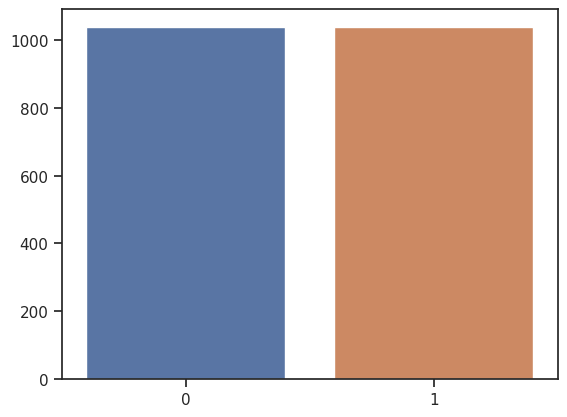

In [1038]:
sns.barplot(x=df_selected_DecitionTree_clean_resampled['Retained.in.2012.'].value_counts().index, y=df_selected_DecitionTree_clean_resampled['Retained.in.2012.'].value_counts().values)
plt.show()

In [1039]:
XcleanDT = df_selected_DecitionTree_clean_resampled.drop('Retained.in.2012.', axis=1)
ycleanDT = df_selected_DecitionTree_clean_resampled['Retained.in.2012.']

In [1040]:
XcleanDT_train, XcleanDT_test, ycleanDT_train, ycleanDT_test = train_test_split(XcleanDT,ycleanDT, test_size=0.3,random_state=0)

In [1041]:
LRcleanDT = LogisticRegression(random_state=0)
LRcleanDT.fit(XcleanDT_train, ycleanDT_train)

LogisticRegression(random_state=0)

In [1042]:
y_predRLcleanDT = LRcleanDT.predict(XcleanDT_test)
print('Precisión en el set de Entrenamiento: {:.4f}'
     .format(LRcleanDT.score(XcleanDT_train, ycleanDT_train)))
print('Precisión en el set de Test: {:.4f}'
     .format(LRcleanDT.score(XcleanDT_test, ycleanDT_test)))

Precisión en el set de Entrenamiento: 0.7315
Precisión en el set de Test: 0.7212


In [1043]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(ycleanDT_test, y_predRLcleanDT, average='micro')))
print('Precision Score : ',(precision_score(ycleanDT_test, y_predRLcleanDT, average='micro')))
print('Recall Score : ',(recall_score(ycleanDT_test, y_predRLcleanDT, average='micro')))
print('Jaccard Score : ',(jaccard_score(ycleanDT_test, y_predRLcleanDT, average='micro')))

F-1 Score :  0.7211538461538461
Precision Score :  0.7211538461538461
Recall Score :  0.7211538461538461
Jaccard Score :  0.5639097744360902


Una vez realizado el arduo trabajo de limpiar la base de datos de Decision Tree de sus outliers y volver a correr el método Regresión Logística, logramos incrementar su precisión de entrenamiento a 73% así como su precisión en el set para testeo a 72%, lo cual nos confirma fuertemente la importancia para éste algoritmo de realizar la limpieza de outliers para normalizar las variables ya que sin la limpieza estabamos en un 66% de precisión. Sin embargo ún no es suficiente para considerar éste algoritmo, pues hay otro mejor, también consideramos no realizar la limpieza de los outliers para la base de datos de las variables principales que arrojó el Random Forest pues es imposible que exista una mejora sustancial.



---



# Curvas Roc

La curva ROC (Receiver Operating Characteristic) se utiliza para evaluar el rendimiento de los algoritmos de clasificación binaria.
La curva ROC se genera calculando y trazando la tasa de verdaderos positivos (TPR) contra la tasa de falsos positivos (FPR) para un solo clasificador en una variedad de umbrales.


#Regresión Logística ROC

In [1044]:
# sacar las probabilidades
y_pred_prob = LR.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

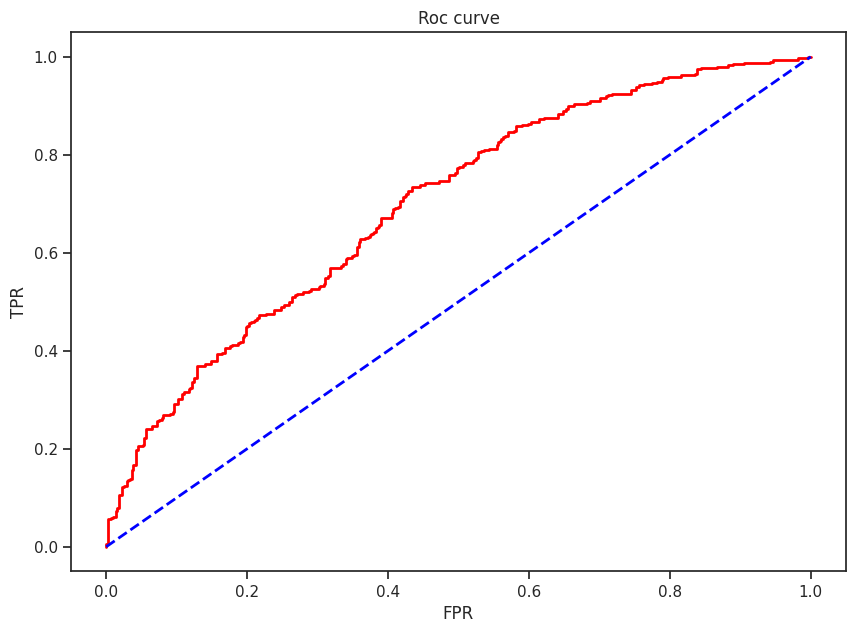

In [1045]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#NB ROC

In [1046]:
# sacar las probabilidades
y_pred_prob = gnb.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

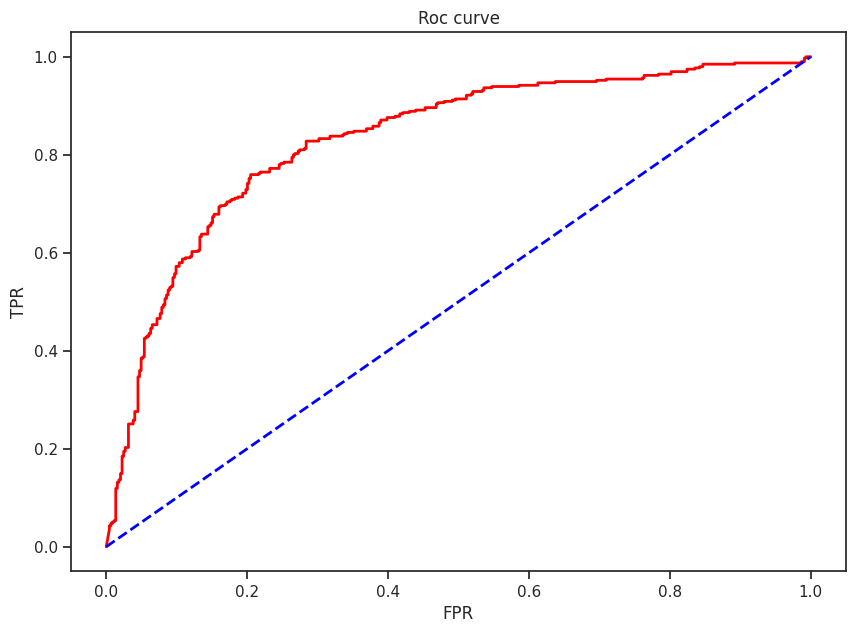

In [1047]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#KNN ROC

In [1048]:
# sacar las probabilidades
y_pred_prob = knn3.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

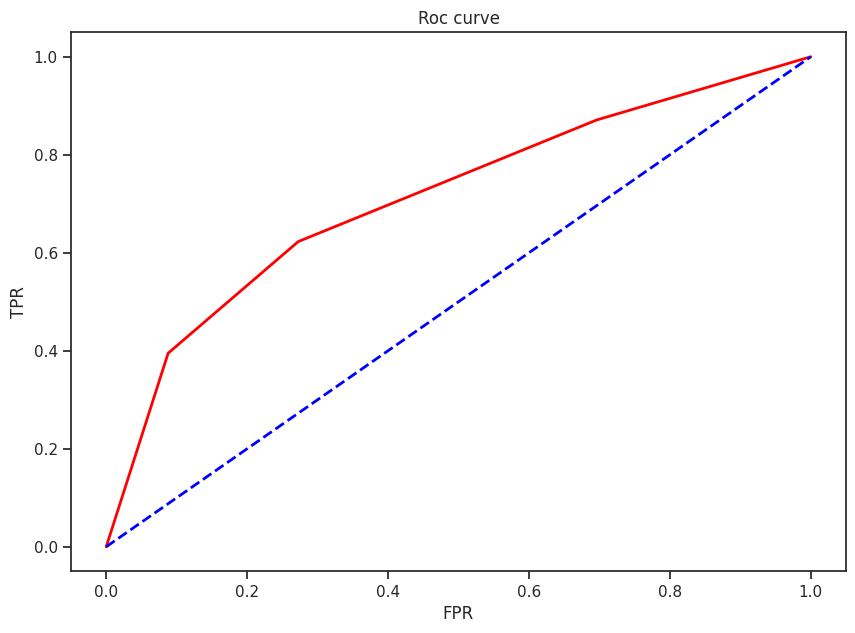

In [1049]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#Support Vector Machine ROC

In [1050]:
# sacar las probabilidades
y_pred_prob = svc.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

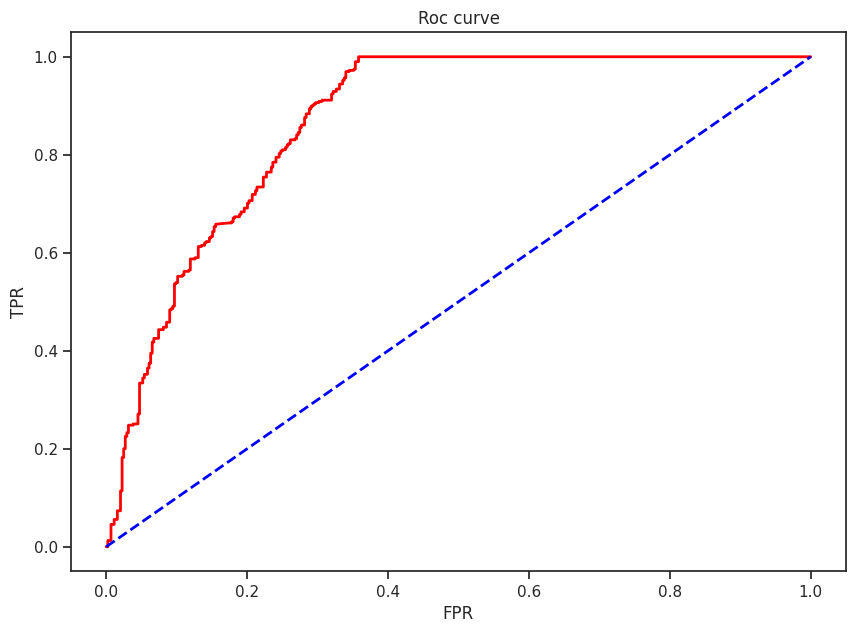

In [1051]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#Random Forest ROC

In [1052]:
# sacar las probabilidades
y_pred_prob = rfc.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

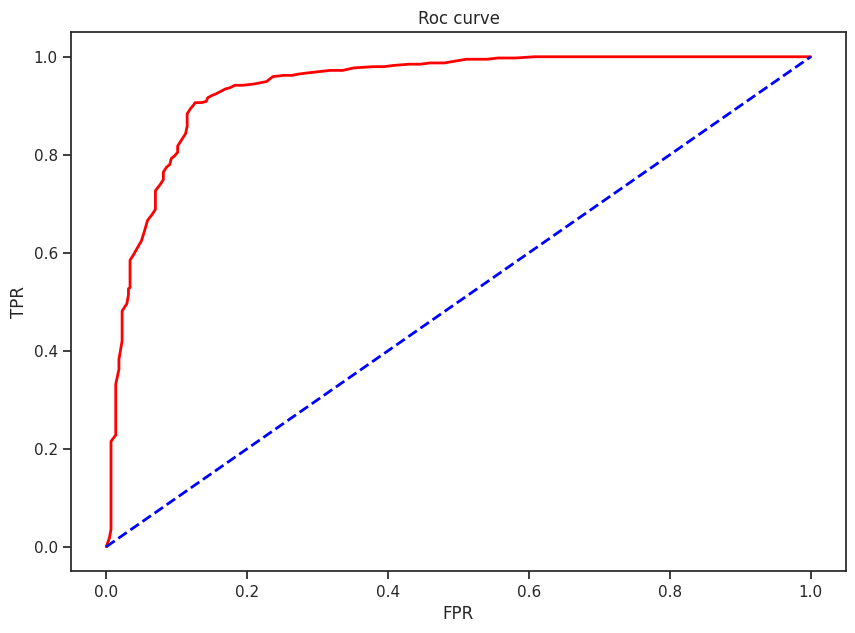

In [1053]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#Decision Tree ROC

In [1054]:
# sacar las probabilidades
y_pred_prob = clf_gini.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

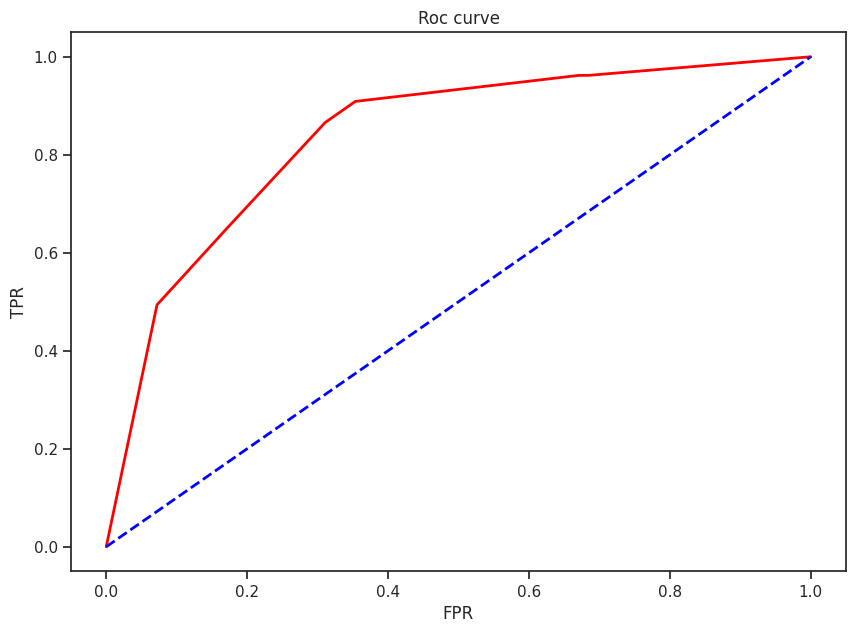

In [1055]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [1056]:
# sacar las probabilidades
y_pred_prob = clf_en.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

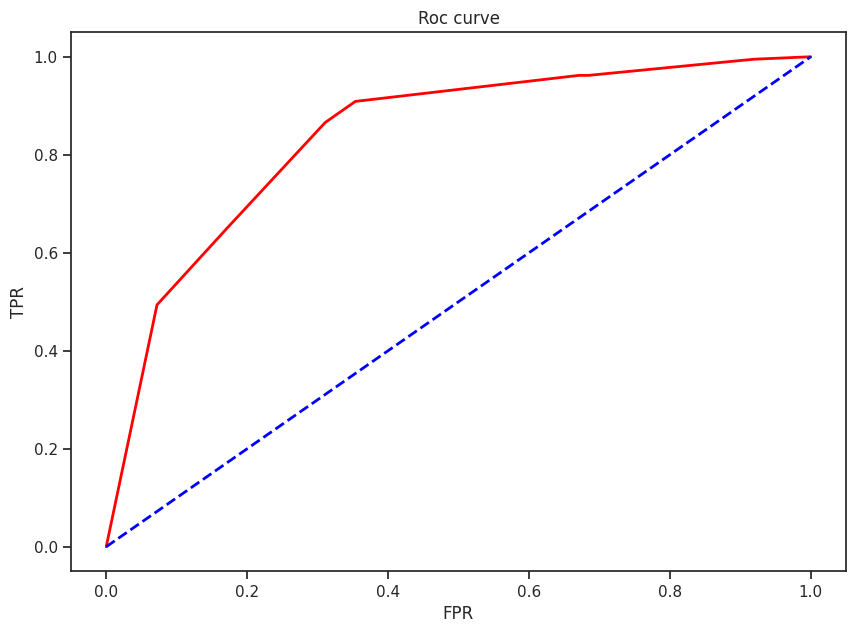

In [1057]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#(Boosting) XGBoost** ROC

In [1058]:
# sacar las probabilidades
y_pred_prob = xgb.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

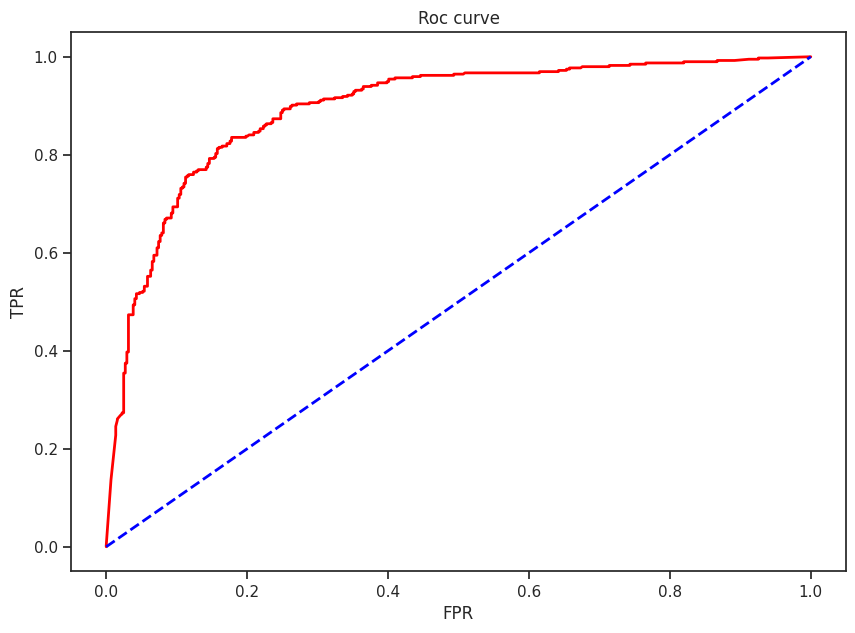

In [1059]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()



---



# **CONCLUSIÓN**

# 1. XGBoost (Boosting)


1.   Precisión en el set de Entrenamiento: 88.2%
2.   Precisión en el set de Test: 81.6%

# 2. Gaussian Naive B


1.  Precisión en el set de Entrenamiento: 78.39%
2.  Precisión en el set de Test: 77.47%



# 3. DECISION TREE CLASSIFIER (GINI)


1.   Precisión en el set de Entrenamiento: 78.95%
2.   Precisión en el set de Test: 77.23%

# 4. REGRESIÓN LOGISTICA

1.   Precisión en el set de Entrenamiento: 73.15%
2.   Precisión en el set de Test: 72.12%

# 5. KNeighborsClassifier (KNN)


1.   Precisión en el set de Entrenamiento: 85.59%
2.   Precisión en el set de Test: 71.75%

# **OVERFITTING**

# SUPPORT VECTOR CLASSIFIER (SVC)

1.   Precisión en el set de Entrenamiento: 100.00%
2.   Precisión en el set de Test: 81.05%

# RANDOM FOREST


1.   Precisión en el set de Entrenamiento: 100%
2.   Precisión en el set de Test: 86.77%